## Import Libraries

In [165]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## Data Importing

In [166]:
df = pd.read_csv("C:/Machine Learning/Predictive Maintenence/train/train.csv")
df_test = pd.read_csv("C:/Machine Learning/Predictive Maintenence/test/test.csv")

## Exploratory Data Analysis(EDA)

In [167]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [168]:
df_test.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF
0,136429,L50896,L,302.3,311.5,1499,38.0,60,0,0,0,0,0
1,136430,L53866,L,301.7,311.0,1713,28.8,17,0,0,0,0,0
2,136431,L50498,L,301.3,310.4,1525,37.7,96,0,0,0,0,0
3,136432,M21232,M,300.1,309.6,1479,47.6,5,0,0,0,0,0
4,136433,M19751,M,303.4,312.3,1515,41.3,114,0,0,0,0,0


Checking for null values

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136429 non-null  int64  
dtypes: f

In [170]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90954 entries, 0 to 90953
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       90954 non-null  int64  
 1   Product ID               90954 non-null  object 
 2   Type                     90954 non-null  object 
 3   Air temperature [K]      90954 non-null  float64
 4   Process temperature [K]  90954 non-null  float64
 5   Rotational speed [rpm]   90954 non-null  int64  
 6   Torque [Nm]              90954 non-null  float64
 7   Tool wear [min]          90954 non-null  int64  
 8   TWF                      90954 non-null  int64  
 9   HDF                      90954 non-null  int64  
 10  PWF                      90954 non-null  int64  
 11  OSF                      90954 non-null  int64  
 12  RNF                      90954 non-null  int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 9.0+ MB


In [171]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,136429.0,NaN,NaN,NaN,68214.0,39383.804275,0.0,34107.0,68214.0,102321.0,136428.0
Product ID,136429,9976,L53257,139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,136429,3,L,95354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature [K],136429.0,NaN,NaN,NaN,299.862776,1.862247,295.3,298.3,300.0,301.2,304.4
Process temperature [K],136429.0,NaN,NaN,NaN,309.94107,1.385173,305.8,308.7,310.0,310.9,313.8
Rotational speed [rpm],136429.0,NaN,NaN,NaN,1520.33111,138.736632,1181.0,1432.0,1493.0,1580.0,2886.0
Torque [Nm],136429.0,NaN,NaN,NaN,40.348643,8.502229,3.8,34.6,40.4,46.1,76.6
Tool wear [min],136429.0,NaN,NaN,NaN,104.408901,63.96504,0.0,48.0,106.0,159.0,253.0
Machine failure,136429.0,NaN,NaN,NaN,0.015744,0.124486,0.0,0.0,0.0,0.0,1.0
TWF,136429.0,NaN,NaN,NaN,0.001554,0.039389,0.0,0.0,0.0,0.0,1.0


In [172]:
display(df.columns.tolist())

['id',
 'Product ID',
 'Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [173]:
pd.DataFrame(data= {'Number': df['Machine failure'].value_counts(), 
                    'Percent': df['Machine failure'].value_counts(normalize=True)})

,Number,Percent
0,134281,0.984256
1,2148,0.015744


In [174]:
display(df.nunique())

id                         136429
Product ID                   9976
Type                            3
Air temperature [K]            95
Process temperature [K]        81
Rotational speed [rpm]        952
Torque [Nm]                   611
Tool wear [min]               246
Machine failure                 2
TWF                             2
HDF                             2
PWF                             2
OSF                             2
RNF                             2
dtype: int64

Drop the indices as these have no predictive power

In [175]:
train = df.copy()

In [176]:
train.pop("Machine failure")

0         0
1         0
2         0
3         0
4         0
         ..
136424    0
136425    0
136426    0
136427    0
136428    0
Name: Machine failure, Length: 136429, dtype: int64

In [177]:
train.pop('id')

0              0
1              1
2              2
3              3
4              4
           ...  
136424    136424
136425    136425
136426    136426
136427    136427
136428    136428
Name: id, Length: 136429, dtype: int64

In [178]:
features = train.columns.tolist()

# Categorical features
cat_features = ['Product ID', 'Type']

# Binary features
bin_features = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Numerical features
num_features = [f for f in features if f not in (cat_features + bin_features)]

print('Number of Categorical_features:', len(cat_features)) 
print('Number of Binary_features:', len(bin_features))  
print('Number of Numerical_features:', len(num_features))
print(num_features)
print("")
print('The total number of features:', len(features))
print(features)

Number of Categorical_features: 2
Number of Binary_features: 5
Number of Numerical_features: 5
['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

The total number of features: 12
['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF']


Checking the percentages of values in columns 

In [179]:
for f in cat_features:
    print('\t' , f)
    n_f = train[f].value_counts()
    p_f = train[f].value_counts(normalize=True)
    display(pd.DataFrame(data= {'Number': n_f, 'Percent': p_f}))

	 Product ID


,Number,Percent
L53257,139,0.001019
L49056,131,0.000960
L53271,131,0.000960
L54275,120,0.000880
L48892,120,0.000880
...,...,...
M24614,1,0.000007
H39399,1,0.000007
M15853,1,0.000007
H32637,1,0.000007


	 Type


,Number,Percent
L,95354,0.698928
M,32152,0.235668
H,8923,0.065404


In [180]:
dfv = pd.DataFrame(data= {'Value': ['Number 0', 'Percent 0', '', 'Number 1', 'Percent 1']})

for f in bin_features: 
    n_f = train[f].value_counts()
    p_f = train[f].value_counts(normalize=True)
    dfv[f] = [n_f[0], p_f[0], '', n_f[1], p_f[1]]
    
dfv.set_index('Value')

,TWF,HDF,PWF,OSF,RNF
Value,,,,,
Number 0,136217,135725,136102,135889,136121
Percent 0,0.998446,0.99484,0.997603,0.996042,0.997742
,,,,,
Number 1,212,704,327,540,308
Percent 1,0.001554,0.00516,0.002397,0.003958,0.002258


<function matplotlib.pyplot.show(close=None, block=None)>

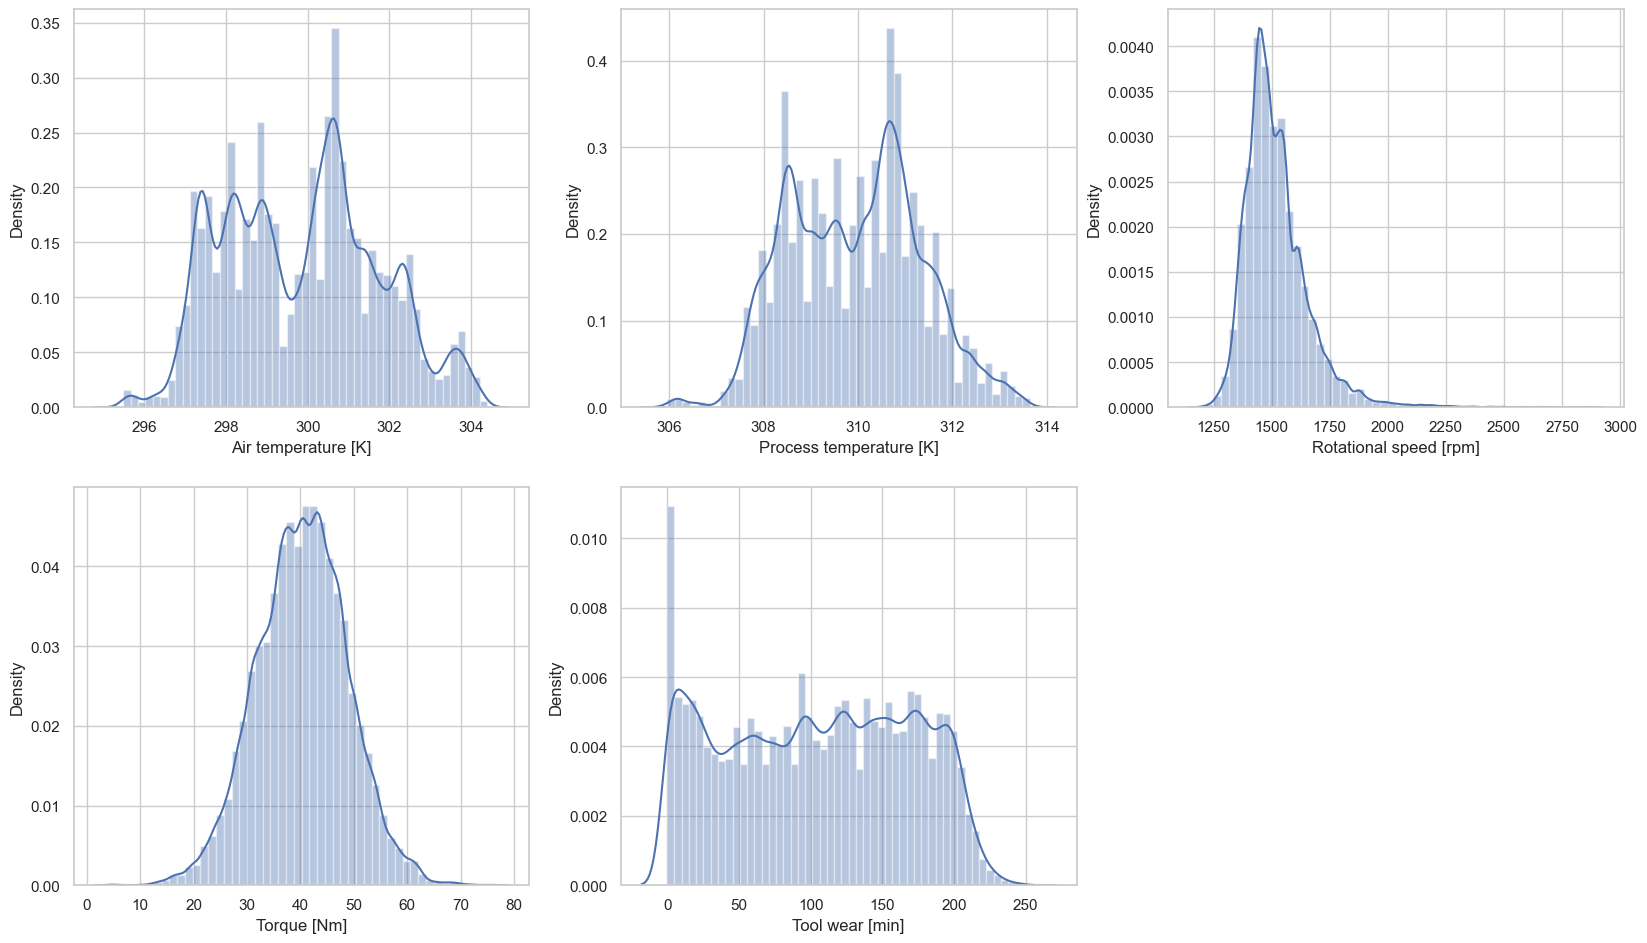

In [181]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(20,30))
plotnumber = 1

for column in num_features:
    if plotnumber<=(len(num_features)): 
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=12)
    plotnumber +=1
plt.show

#### Some columns in the dataset are normally distributed("Rotational speed [rpm]", "Torque[Nm]")

In [182]:
#function to visualize the binary machine failures
def plot_binary_machine_failures(dataframe, column):
    # Plot the machine failures
    plt.figure(figsize=(8, 5))

    # Countplot for Machine failure
    ax = plt.subplot(1, 2, 1)
    ax = sns.countplot(x=column, data=dataframe)
    ax.bar_label(ax.containers[0])
    plt.title(column + " Failure", fontsize=20)

    # Pie chart for Outcome
    ax = plt.subplot(1, 2, 2)
    outcome_counts = dataframe[column].value_counts()
    ax = outcome_counts.plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
    ax.set_title("Outcome", fontsize=12, color='Red', font='Lucida Calligraphy')

    # Display the plot
    plt.tight_layout()
    plt.show()

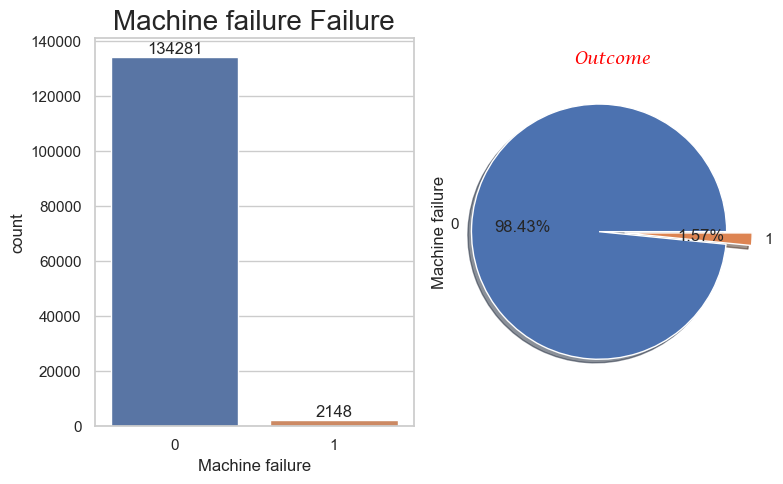

In [183]:
# Visualize the machine failure
plot_binary_machine_failures(df, 'Machine failure')

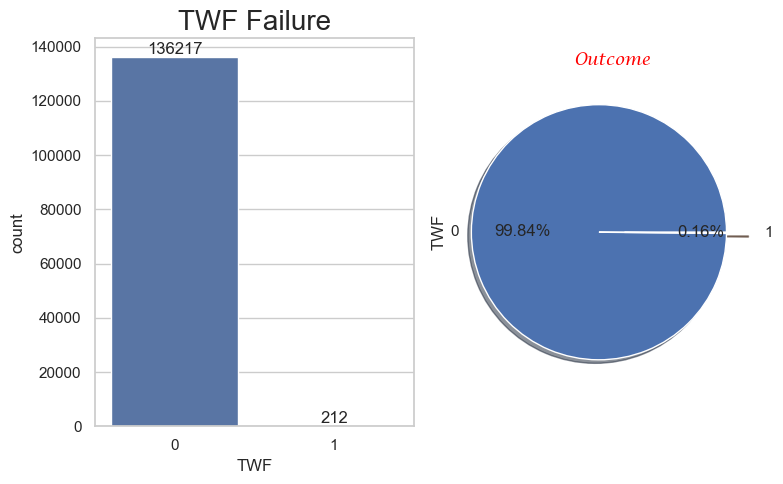

In [184]:
plot_binary_machine_failures(df, 'TWF')

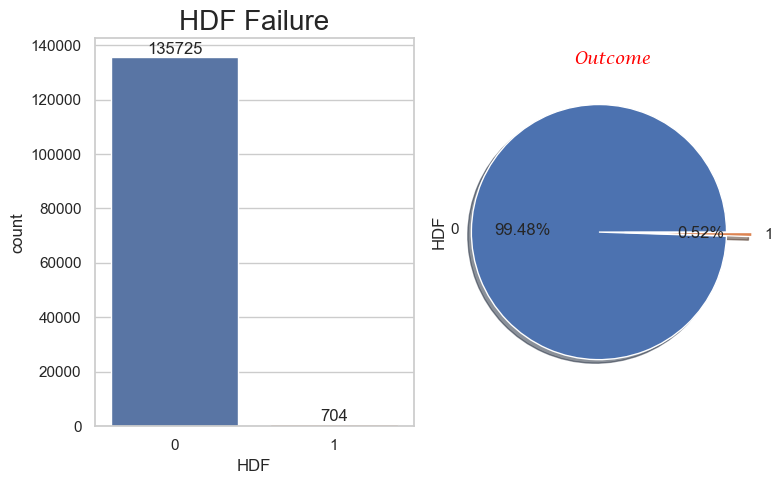

In [185]:
plot_binary_machine_failures(df, 'HDF')

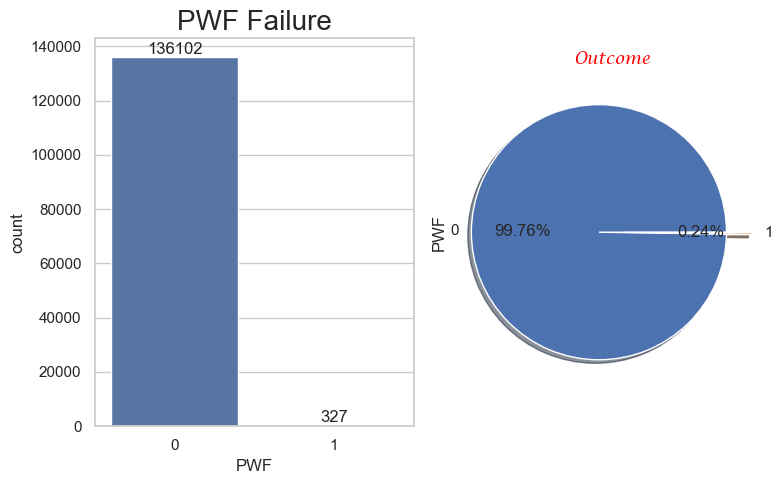

In [186]:
plot_binary_machine_failures(df, 'PWF')

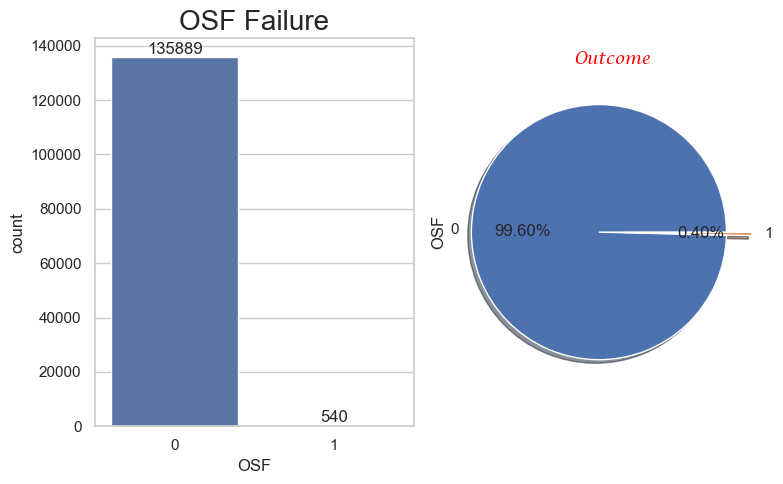

In [187]:
plot_binary_machine_failures(train, 'OSF')

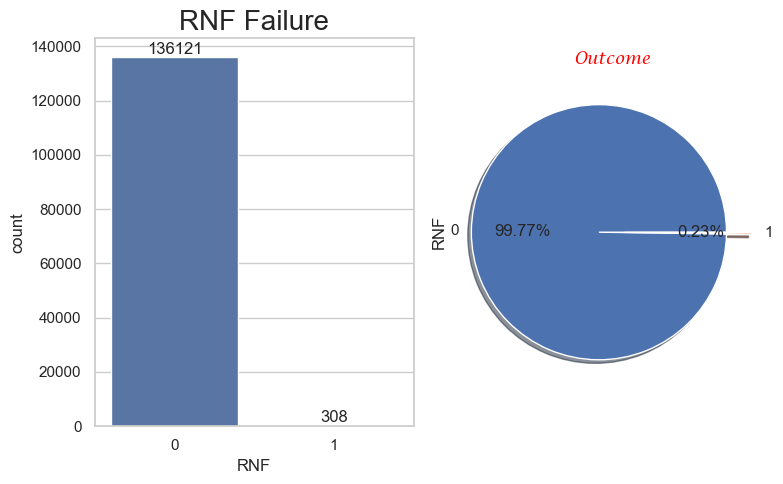

In [188]:
plot_binary_machine_failures(train, 'RNF')

#### From the above analysis, it can be seen that the dataset is highly imbalanced.

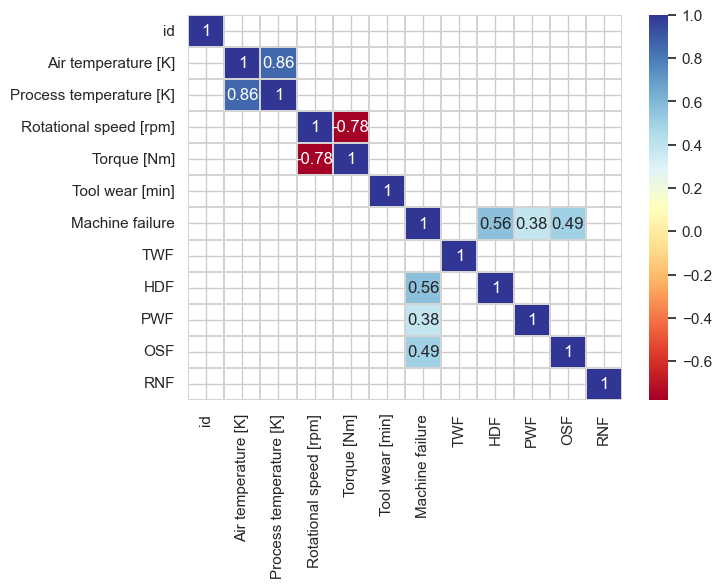

In [189]:
plt.figure(figsize=(7,5))
threshold = 0.35
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
df_cluster = df.corr()
mask = df_cluster.where((abs(df_cluster) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(df_cluster,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

From the graph, we can see there are strongly correlated features namely "Process temperature and Air temperature" and  "Torque and rotational speed".

## Feature Engineering

In [190]:
### normalizing the data

from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()

df[num_features] = scaler.fit_transform(df[num_features])
df_test[num_features] = scaler.fit_transform(df_test[num_features])

#### Encoding

In [191]:
df_1 = df.drop(['Product ID'] , axis=1)
feature = ['Type']
df_1 = pd.get_dummies(df_1, columns=feature)
df_1.head()

,id,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,0,0.395880,-0.246230,0.545416,-0.499711,0.556417,0,0,0,0,0,0,0,1,0
1,1,1.469856,1.558605,1.720308,-1.323028,1.494433,0,0,0,0,0,0,0,0,1
2,2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,0,0,0,0,0,0,0,1,0
3,3,0.610675,0.692284,0.026445,0.464745,1.447532,0,0,0,0,0,0,0,1,0
4,4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,0,0,0,0,0,0,0,0,1


In [192]:
df_test1 = df_test.drop(['Product ID','id'] , axis=1)
feature = ['Type']
df_test1 = pd.get_dummies(df_test1, columns=feature)
df_test1.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,Type_H,Type_L,Type_M
0,1.313830,1.126570,-0.153806,-0.274579,-0.693494,0,0,0,0,0,0,1,0
1,0.990824,0.765635,1.375097,-1.356341,-1.366729,0,0,0,0,0,0,1,0
2,0.775487,0.332512,0.031949,-0.309854,-0.129855,0,0,0,0,0,0,1,0
3,0.129475,-0.244985,-0.296694,0.854217,-1.554608,0,0,0,0,0,0,0,1
4,1.906008,1.704068,-0.039496,0.113445,0.151964,0,0,0,0,0,0,0,1


## Modelling and  Evaluation

In [193]:
X = df_1.drop(columns= ['Machine failure'],axis = 1)
Y = df_1['Machine failure']

In [194]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train,y_test = train_test_split(X,Y,test_size = 0.20,random_state = 70)

x_train = x_train1.drop('id', axis=1)
x_test = x_test1.drop('id', axis=1)
x_train.shape, y_test.shape

((109143, 13), (27286,))

### Model Building

In [195]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

In [196]:
model1 = RandomForestClassifier()
model2 = DecisionTreeClassifier()
model3 = SVC(kernel='linear', probability=True, random_state=42)
model4 = CatBoostClassifier(learning_rate=0.1, iterations=500, random_seed=42)

In [197]:
##RandomForestClassifier
# training the model 
model1.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds1 = model1.predict(x_test)
# Evaluatung the model
accuracy_score(y_test, preds1)

0.9964817122333798

In [198]:
##DecisionTreeClassifier
model2.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds2 = model2.predict(x_test)
# Evaluatung the model
accuracy_score(y_test, preds2)

0.9928534779740527

In [199]:
##Support Vector Machines
model3.fit(x_train, y_train)

# Preprocessing of validation data, get predictions
preds3 = model3.predict(x_test)
# Evaluatung the model
print(accuracy_score(y_test, preds3))
print("Train AUC :", roc_auc_score(y_test, model3.predict_proba(x_test)[:,1]))

0.9966649563878912
Train AUC : 0.939998931920475


In [200]:
## CatBoost
model4.fit(x_train, y_train,
          eval_set=(x_test, y_test),
          verbose=False)

In [202]:
# Making predictions on the test set
preds4 = model4.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_test, preds4)
print(f'Accuracy: {accuracy}')
print("Train AUC :", roc_auc_score(y_test, model4.predict_proba(x_test)[:,1]))

Accuracy: 0.996518361064282
Train AUC : 0.9737166123102629


### Visualising the best classifier by comparing accuracy and AUC i.e, CatBoost

Creating a confusion matrix to visualize the performance of  catboost. A confusion matrix is a performance evaluation tool in machine learning, representing the accuracy of a classification model. It displays the number of true positives, true negatives, false positives, and false negatives.

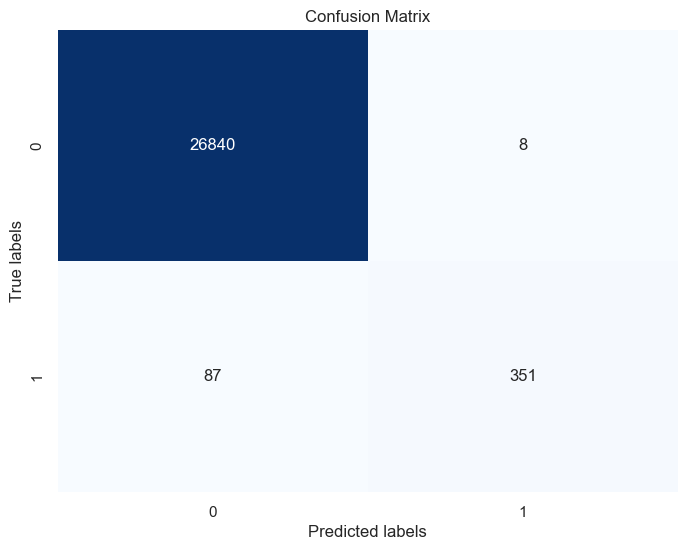

In [203]:
# Calculating confusion matrix
cm = confusion_matrix(y_test, preds4)

# Plotting confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

For binary classification, where you have two classes (e.g., positive and negative), a common and effective way to visualize the performance of your model is by using a Receiver Operating Characteristic (ROC) curve and an Area Under the Curve (AUC) plot. These plots provide insights into the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) at different classification thresholds.

In [204]:
from sklearn.metrics import roc_curve, roc_auc_score

In [205]:
# Getting predicted probabilities for the positive class
y_prob = model4.predict_proba(x_test)[:, 1]
y_prob

array([0.00163315, 0.00086128, 0.00026571, ..., 0.00440823, 0.00061054,
       0.02412283])

In [206]:
# Calculating false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating AUC score
auc_score = roc_auc_score(y_test, y_prob)

In [207]:
auc_score

0.9737166123102629

Plotting the ROC curve to visualize the trade-off between true positive rate and false positive rate at different classification thresholds.

This code will generate an ROC curve plot with the AUC score displayed in the legend. The diagonal dashed line represents random guessing, and a higher AUC score indicates better model performance.

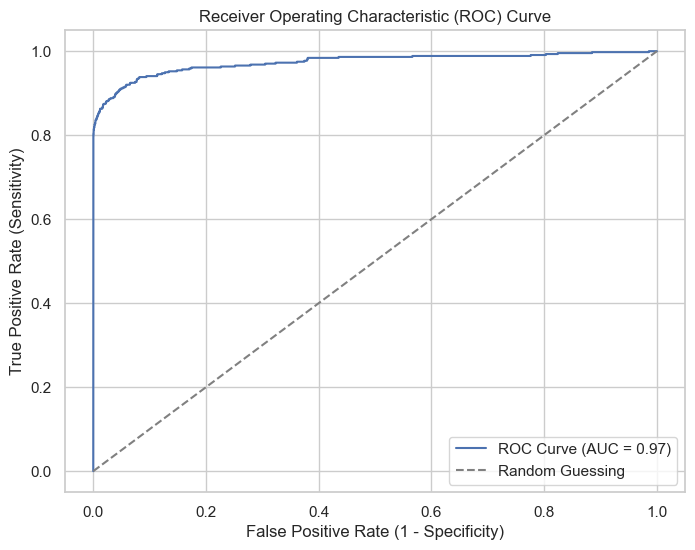

In [208]:
# Plotting ROC curve
sns.set_theme(style = 'whitegrid')
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [209]:
## Predicting on the Original test set
predictions = model4.predict_proba(df_test1)[:, 1]

columns = ['id', 'Machine Failure']
values = [df_test['id'], predictions]
submission_df=pd.DataFrame(dict(zip(columns, values)))
submission_df.to_csv( 'submission_base.csv' ,index=False,header=True)
print(submission_df.shape)

(90954, 2)


## Hyperparameter Tuning

In [210]:
from sklearn.model_selection import RandomizedSearchCV

model = CatBoostClassifier()
# Defining the hyperparameter grid for RandomizedSearchCV
param_grid = {
    'iterations': [500,600],
    'learning_rate': [0.05, 0.1],
    'depth': [4, 6, 8,10],
    'loss_function': ['Logloss']
}

# Initializing RandomizedSearchCV with AUC as the scoring metric
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=5, verbose=0, random_state=42)

# Performing the hyperparameter search
random_search.fit(x_train, y_train)

# The best hyperparameters and best AUC score
best_params = random_search.best_params_
best_auc = random_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best AUC Score:", best_auc)

# Evaluating the best model on the test set
best_model = random_search.best_estimator_
y_pred_proba = best_model.predict_proba(x_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC Score:", test_auc)

0:	learn: 0.5789178	total: 15.6ms	remaining: 7.76s
1:	learn: 0.4844484	total: 31.9ms	remaining: 7.95s
2:	learn: 0.4019265	total: 46.4ms	remaining: 7.69s
3:	learn: 0.3386332	total: 62ms	remaining: 7.69s
4:	learn: 0.2793043	total: 73.6ms	remaining: 7.28s
5:	learn: 0.2351362	total: 85.4ms	remaining: 7.03s
6:	learn: 0.1981353	total: 98.6ms	remaining: 6.94s
7:	learn: 0.1669706	total: 110ms	remaining: 6.75s
8:	learn: 0.1419613	total: 120ms	remaining: 6.53s
9:	learn: 0.1252484	total: 131ms	remaining: 6.41s
10:	learn: 0.1083252	total: 142ms	remaining: 6.29s
11:	learn: 0.0946013	total: 152ms	remaining: 6.2s
12:	learn: 0.0834156	total: 164ms	remaining: 6.16s
13:	learn: 0.0742623	total: 176ms	remaining: 6.11s
14:	learn: 0.0673339	total: 186ms	remaining: 6.03s
15:	learn: 0.0618310	total: 197ms	remaining: 5.97s
16:	learn: 0.0564311	total: 208ms	remaining: 5.9s
17:	learn: 0.0518019	total: 220ms	remaining: 5.89s
18:	learn: 0.0480325	total: 234ms	remaining: 5.93s
19:	learn: 0.0450654	total: 247ms	rema

168:	learn: 0.0210772	total: 2.07s	remaining: 4.05s
169:	learn: 0.0210729	total: 2.08s	remaining: 4.04s
170:	learn: 0.0210647	total: 2.09s	remaining: 4.03s
171:	learn: 0.0210585	total: 2.1s	remaining: 4.01s
172:	learn: 0.0210509	total: 2.12s	remaining: 4s
173:	learn: 0.0210382	total: 2.13s	remaining: 3.99s
174:	learn: 0.0210315	total: 2.14s	remaining: 3.98s
175:	learn: 0.0210221	total: 2.16s	remaining: 3.97s
176:	learn: 0.0210054	total: 2.17s	remaining: 3.96s
177:	learn: 0.0209914	total: 2.18s	remaining: 3.95s
178:	learn: 0.0209810	total: 2.19s	remaining: 3.93s
179:	learn: 0.0209709	total: 2.21s	remaining: 3.92s
180:	learn: 0.0209657	total: 2.22s	remaining: 3.91s
181:	learn: 0.0209513	total: 2.23s	remaining: 3.9s
182:	learn: 0.0209385	total: 2.24s	remaining: 3.88s
183:	learn: 0.0209336	total: 2.25s	remaining: 3.87s
184:	learn: 0.0209262	total: 2.27s	remaining: 3.86s
185:	learn: 0.0209149	total: 2.28s	remaining: 3.85s
186:	learn: 0.0209121	total: 2.29s	remaining: 3.84s
187:	learn: 0.020

327:	learn: 0.0201509	total: 3.92s	remaining: 2.06s
328:	learn: 0.0201413	total: 3.93s	remaining: 2.04s
329:	learn: 0.0201339	total: 3.94s	remaining: 2.03s
330:	learn: 0.0201308	total: 3.96s	remaining: 2.02s
331:	learn: 0.0201266	total: 3.97s	remaining: 2.01s
332:	learn: 0.0201199	total: 3.98s	remaining: 2s
333:	learn: 0.0201146	total: 3.99s	remaining: 1.98s
334:	learn: 0.0201118	total: 4s	remaining: 1.97s
335:	learn: 0.0201033	total: 4.01s	remaining: 1.96s
336:	learn: 0.0200947	total: 4.03s	remaining: 1.95s
337:	learn: 0.0200924	total: 4.04s	remaining: 1.94s
338:	learn: 0.0200915	total: 4.05s	remaining: 1.92s
339:	learn: 0.0200856	total: 4.06s	remaining: 1.91s
340:	learn: 0.0200849	total: 4.07s	remaining: 1.9s
341:	learn: 0.0200747	total: 4.08s	remaining: 1.89s
342:	learn: 0.0200693	total: 4.09s	remaining: 1.87s
343:	learn: 0.0200652	total: 4.1s	remaining: 1.86s
344:	learn: 0.0200603	total: 4.12s	remaining: 1.85s
345:	learn: 0.0200532	total: 4.13s	remaining: 1.84s
346:	learn: 0.020051

499:	learn: 0.0193731	total: 6.01s	remaining: 0us
0:	learn: 0.5789540	total: 24ms	remaining: 12s
1:	learn: 0.4850929	total: 44.8ms	remaining: 11.1s
2:	learn: 0.4027954	total: 64.3ms	remaining: 10.6s
3:	learn: 0.3390807	total: 83.2ms	remaining: 10.3s
4:	learn: 0.2797042	total: 103ms	remaining: 10.2s
5:	learn: 0.2357167	total: 119ms	remaining: 9.82s
6:	learn: 0.1988538	total: 132ms	remaining: 9.29s
7:	learn: 0.1675639	total: 143ms	remaining: 8.81s
8:	learn: 0.1424549	total: 154ms	remaining: 8.4s
9:	learn: 0.1232437	total: 164ms	remaining: 8.05s
10:	learn: 0.1070544	total: 175ms	remaining: 7.77s
11:	learn: 0.0935564	total: 185ms	remaining: 7.52s
12:	learn: 0.0843976	total: 196ms	remaining: 7.35s
13:	learn: 0.0750547	total: 206ms	remaining: 7.15s
14:	learn: 0.0679165	total: 216ms	remaining: 6.99s
15:	learn: 0.0614654	total: 226ms	remaining: 6.85s
16:	learn: 0.0561127	total: 238ms	remaining: 6.76s
17:	learn: 0.0519689	total: 248ms	remaining: 6.64s
18:	learn: 0.0481745	total: 258ms	remaining

164:	learn: 0.0210084	total: 2.2s	remaining: 4.47s
165:	learn: 0.0210047	total: 2.22s	remaining: 4.46s
166:	learn: 0.0209934	total: 2.23s	remaining: 4.45s
167:	learn: 0.0209827	total: 2.25s	remaining: 4.44s
168:	learn: 0.0209699	total: 2.26s	remaining: 4.43s
169:	learn: 0.0209584	total: 2.27s	remaining: 4.41s
170:	learn: 0.0209524	total: 2.28s	remaining: 4.39s
171:	learn: 0.0209467	total: 2.29s	remaining: 4.37s
172:	learn: 0.0209412	total: 2.3s	remaining: 4.36s
173:	learn: 0.0209386	total: 2.31s	remaining: 4.34s
174:	learn: 0.0209325	total: 2.33s	remaining: 4.32s
175:	learn: 0.0209260	total: 2.34s	remaining: 4.3s
176:	learn: 0.0209160	total: 2.35s	remaining: 4.29s
177:	learn: 0.0208994	total: 2.36s	remaining: 4.27s
178:	learn: 0.0208908	total: 2.37s	remaining: 4.26s
179:	learn: 0.0208754	total: 2.39s	remaining: 4.24s
180:	learn: 0.0208693	total: 2.41s	remaining: 4.24s
181:	learn: 0.0208640	total: 2.42s	remaining: 4.23s
182:	learn: 0.0208500	total: 2.44s	remaining: 4.22s
183:	learn: 0.0

340:	learn: 0.0199637	total: 4.48s	remaining: 2.09s
341:	learn: 0.0199606	total: 4.49s	remaining: 2.08s
342:	learn: 0.0199556	total: 4.51s	remaining: 2.06s
343:	learn: 0.0199523	total: 4.52s	remaining: 2.05s
344:	learn: 0.0199517	total: 4.53s	remaining: 2.04s
345:	learn: 0.0199494	total: 4.54s	remaining: 2.02s
346:	learn: 0.0199488	total: 4.55s	remaining: 2.01s
347:	learn: 0.0199466	total: 4.57s	remaining: 2s
348:	learn: 0.0199339	total: 4.58s	remaining: 1.98s
349:	learn: 0.0199232	total: 4.6s	remaining: 1.97s
350:	learn: 0.0199224	total: 4.61s	remaining: 1.96s
351:	learn: 0.0199127	total: 4.62s	remaining: 1.94s
352:	learn: 0.0199073	total: 4.64s	remaining: 1.93s
353:	learn: 0.0199019	total: 4.65s	remaining: 1.92s
354:	learn: 0.0198955	total: 4.66s	remaining: 1.9s
355:	learn: 0.0198877	total: 4.67s	remaining: 1.89s
356:	learn: 0.0198833	total: 4.69s	remaining: 1.88s
357:	learn: 0.0198777	total: 4.7s	remaining: 1.86s
358:	learn: 0.0198759	total: 4.72s	remaining: 1.85s
359:	learn: 0.0198

2:	learn: 0.4012184	total: 55.7ms	remaining: 9.22s
3:	learn: 0.3376725	total: 70.7ms	remaining: 8.76s
4:	learn: 0.2783614	total: 84.6ms	remaining: 8.37s
5:	learn: 0.2342463	total: 97.6ms	remaining: 8.04s
6:	learn: 0.1973518	total: 111ms	remaining: 7.85s
7:	learn: 0.1662133	total: 125ms	remaining: 7.7s
8:	learn: 0.1412415	total: 138ms	remaining: 7.55s
9:	learn: 0.1245277	total: 153ms	remaining: 7.5s
10:	learn: 0.1076492	total: 169ms	remaining: 7.51s
11:	learn: 0.0939651	total: 183ms	remaining: 7.46s
12:	learn: 0.0847134	total: 199ms	remaining: 7.47s
13:	learn: 0.0752546	total: 215ms	remaining: 7.46s
14:	learn: 0.0681869	total: 231ms	remaining: 7.47s
15:	learn: 0.0616462	total: 247ms	remaining: 7.46s
16:	learn: 0.0562261	total: 263ms	remaining: 7.46s
17:	learn: 0.0521725	total: 280ms	remaining: 7.5s
18:	learn: 0.0483092	total: 296ms	remaining: 7.48s
19:	learn: 0.0451809	total: 309ms	remaining: 7.42s
20:	learn: 0.0427073	total: 322ms	remaining: 7.35s
21:	learn: 0.0403031	total: 336ms	rema

174:	learn: 0.0208288	total: 2.16s	remaining: 4.01s
175:	learn: 0.0208202	total: 2.17s	remaining: 4s
176:	learn: 0.0208083	total: 2.18s	remaining: 3.99s
177:	learn: 0.0207993	total: 2.2s	remaining: 3.97s
178:	learn: 0.0207783	total: 2.21s	remaining: 3.96s
179:	learn: 0.0207653	total: 2.22s	remaining: 3.95s
180:	learn: 0.0207604	total: 2.23s	remaining: 3.93s
181:	learn: 0.0207512	total: 2.24s	remaining: 3.92s
182:	learn: 0.0207349	total: 2.26s	remaining: 3.91s
183:	learn: 0.0207260	total: 2.27s	remaining: 3.9s
184:	learn: 0.0207183	total: 2.28s	remaining: 3.88s
185:	learn: 0.0207139	total: 2.29s	remaining: 3.87s
186:	learn: 0.0207091	total: 2.31s	remaining: 3.86s
187:	learn: 0.0207042	total: 2.32s	remaining: 3.84s
188:	learn: 0.0206971	total: 2.33s	remaining: 3.83s
189:	learn: 0.0206892	total: 2.34s	remaining: 3.82s
190:	learn: 0.0206850	total: 2.36s	remaining: 3.82s
191:	learn: 0.0206772	total: 2.38s	remaining: 3.81s
192:	learn: 0.0206691	total: 2.39s	remaining: 3.8s
193:	learn: 0.0206

340:	learn: 0.0198168	total: 5.23s	remaining: 2.44s
341:	learn: 0.0198096	total: 5.26s	remaining: 2.43s
342:	learn: 0.0198038	total: 5.28s	remaining: 2.42s
343:	learn: 0.0197974	total: 5.3s	remaining: 2.4s
344:	learn: 0.0197864	total: 5.32s	remaining: 2.39s
345:	learn: 0.0197856	total: 5.35s	remaining: 2.38s
346:	learn: 0.0197796	total: 5.37s	remaining: 2.37s
347:	learn: 0.0197693	total: 5.39s	remaining: 2.36s
348:	learn: 0.0197675	total: 5.42s	remaining: 2.34s
349:	learn: 0.0197569	total: 5.44s	remaining: 2.33s
350:	learn: 0.0197561	total: 5.47s	remaining: 2.32s
351:	learn: 0.0197522	total: 5.49s	remaining: 2.31s
352:	learn: 0.0197405	total: 5.51s	remaining: 2.3s
353:	learn: 0.0197327	total: 5.54s	remaining: 2.28s
354:	learn: 0.0197292	total: 5.56s	remaining: 2.27s
355:	learn: 0.0197197	total: 5.58s	remaining: 2.26s
356:	learn: 0.0197168	total: 5.61s	remaining: 2.25s
357:	learn: 0.0197111	total: 5.63s	remaining: 2.23s
358:	learn: 0.0196994	total: 5.65s	remaining: 2.22s
359:	learn: 0.0

0:	learn: 0.5789271	total: 30.8ms	remaining: 15.4s
1:	learn: 0.4844413	total: 54.7ms	remaining: 13.6s
2:	learn: 0.4020125	total: 80.7ms	remaining: 13.4s
3:	learn: 0.3384111	total: 103ms	remaining: 12.8s
4:	learn: 0.2788617	total: 132ms	remaining: 13.1s
5:	learn: 0.2347721	total: 155ms	remaining: 12.7s
6:	learn: 0.1978142	total: 178ms	remaining: 12.5s
7:	learn: 0.1665316	total: 200ms	remaining: 12.3s
8:	learn: 0.1414456	total: 225ms	remaining: 12.3s
9:	learn: 0.1222946	total: 253ms	remaining: 12.4s
10:	learn: 0.1059584	total: 277ms	remaining: 12.3s
11:	learn: 0.0925333	total: 301ms	remaining: 12.2s
12:	learn: 0.0834225	total: 324ms	remaining: 12.1s
13:	learn: 0.0741407	total: 350ms	remaining: 12.2s
14:	learn: 0.0671419	total: 376ms	remaining: 12.1s
15:	learn: 0.0607278	total: 396ms	remaining: 12s
16:	learn: 0.0554111	total: 418ms	remaining: 11.9s
17:	learn: 0.0509278	total: 441ms	remaining: 11.8s
18:	learn: 0.0472057	total: 470ms	remaining: 11.9s
19:	learn: 0.0444105	total: 497ms	remain

165:	learn: 0.0205309	total: 4.58s	remaining: 9.21s
166:	learn: 0.0205141	total: 4.6s	remaining: 9.17s
167:	learn: 0.0204971	total: 4.62s	remaining: 9.13s
168:	learn: 0.0204854	total: 4.64s	remaining: 9.1s
169:	learn: 0.0204770	total: 4.67s	remaining: 9.06s
170:	learn: 0.0204694	total: 4.68s	remaining: 9.01s
171:	learn: 0.0204646	total: 4.71s	remaining: 8.98s
172:	learn: 0.0204548	total: 4.73s	remaining: 8.94s
173:	learn: 0.0204327	total: 4.75s	remaining: 8.9s
174:	learn: 0.0204276	total: 4.77s	remaining: 8.86s
175:	learn: 0.0204109	total: 4.79s	remaining: 8.82s
176:	learn: 0.0204030	total: 4.82s	remaining: 8.79s
177:	learn: 0.0203862	total: 4.83s	remaining: 8.74s
178:	learn: 0.0203747	total: 4.86s	remaining: 8.71s
179:	learn: 0.0203711	total: 4.88s	remaining: 8.68s
180:	learn: 0.0203636	total: 4.91s	remaining: 8.64s
181:	learn: 0.0203531	total: 4.93s	remaining: 8.61s
182:	learn: 0.0203476	total: 4.95s	remaining: 8.57s
183:	learn: 0.0203329	total: 4.98s	remaining: 8.55s
184:	learn: 0.0

329:	learn: 0.0193159	total: 8.41s	remaining: 4.33s
330:	learn: 0.0193078	total: 8.44s	remaining: 4.31s
331:	learn: 0.0193061	total: 8.46s	remaining: 4.28s
332:	learn: 0.0193001	total: 8.48s	remaining: 4.25s
333:	learn: 0.0192962	total: 8.51s	remaining: 4.23s
334:	learn: 0.0192917	total: 8.53s	remaining: 4.2s
335:	learn: 0.0192866	total: 8.56s	remaining: 4.18s
336:	learn: 0.0192806	total: 8.58s	remaining: 4.15s
337:	learn: 0.0192751	total: 8.6s	remaining: 4.12s
338:	learn: 0.0192711	total: 8.61s	remaining: 4.09s
339:	learn: 0.0192696	total: 8.64s	remaining: 4.06s
340:	learn: 0.0192639	total: 8.66s	remaining: 4.04s
341:	learn: 0.0192539	total: 8.68s	remaining: 4.01s
342:	learn: 0.0192467	total: 8.7s	remaining: 3.98s
343:	learn: 0.0192429	total: 8.73s	remaining: 3.96s
344:	learn: 0.0192353	total: 8.75s	remaining: 3.93s
345:	learn: 0.0192336	total: 8.77s	remaining: 3.9s
346:	learn: 0.0192274	total: 8.8s	remaining: 3.88s
347:	learn: 0.0192236	total: 8.83s	remaining: 3.85s
348:	learn: 0.019

497:	learn: 0.0184885	total: 12.3s	remaining: 49.2ms
498:	learn: 0.0184831	total: 12.3s	remaining: 24.6ms
499:	learn: 0.0184799	total: 12.3s	remaining: 0us
0:	learn: 0.5785143	total: 24.8ms	remaining: 12.4s
1:	learn: 0.4843889	total: 48ms	remaining: 11.9s
2:	learn: 0.4020216	total: 70.5ms	remaining: 11.7s
3:	learn: 0.3378740	total: 92.3ms	remaining: 11.4s
4:	learn: 0.2782098	total: 113ms	remaining: 11.2s
5:	learn: 0.2340953	total: 133ms	remaining: 10.9s
6:	learn: 0.2008584	total: 154ms	remaining: 10.8s
7:	learn: 0.1687883	total: 173ms	remaining: 10.6s
8:	learn: 0.1431052	total: 192ms	remaining: 10.5s
9:	learn: 0.1259716	total: 216ms	remaining: 10.6s
10:	learn: 0.1086432	total: 237ms	remaining: 10.5s
11:	learn: 0.0946154	total: 256ms	remaining: 10.4s
12:	learn: 0.0849923	total: 279ms	remaining: 10.5s
13:	learn: 0.0753406	total: 301ms	remaining: 10.5s
14:	learn: 0.0674205	total: 324ms	remaining: 10.5s
15:	learn: 0.0608893	total: 351ms	remaining: 10.6s
16:	learn: 0.0554817	total: 373ms	re

167:	learn: 0.0199937	total: 3.81s	remaining: 7.54s
168:	learn: 0.0199767	total: 3.84s	remaining: 7.51s
169:	learn: 0.0199629	total: 3.86s	remaining: 7.49s
170:	learn: 0.0199527	total: 3.88s	remaining: 7.46s
171:	learn: 0.0199428	total: 3.9s	remaining: 7.43s
172:	learn: 0.0199310	total: 3.92s	remaining: 7.4s
173:	learn: 0.0199217	total: 3.93s	remaining: 7.37s
174:	learn: 0.0199080	total: 3.95s	remaining: 7.34s
175:	learn: 0.0198941	total: 3.97s	remaining: 7.31s
176:	learn: 0.0198911	total: 3.99s	remaining: 7.28s
177:	learn: 0.0198842	total: 4.02s	remaining: 7.27s
178:	learn: 0.0198690	total: 4.05s	remaining: 7.27s
179:	learn: 0.0198636	total: 4.07s	remaining: 7.24s
180:	learn: 0.0198583	total: 4.09s	remaining: 7.21s
181:	learn: 0.0198502	total: 4.11s	remaining: 7.18s
182:	learn: 0.0198411	total: 4.12s	remaining: 7.14s
183:	learn: 0.0198356	total: 4.14s	remaining: 7.12s
184:	learn: 0.0198246	total: 4.17s	remaining: 7.1s
185:	learn: 0.0198193	total: 4.19s	remaining: 7.07s
186:	learn: 0.0

333:	learn: 0.0190218	total: 7.37s	remaining: 3.66s
334:	learn: 0.0190152	total: 7.41s	remaining: 3.65s
335:	learn: 0.0190095	total: 7.43s	remaining: 3.63s
336:	learn: 0.0189993	total: 7.45s	remaining: 3.6s
337:	learn: 0.0189955	total: 7.46s	remaining: 3.58s
338:	learn: 0.0189899	total: 7.49s	remaining: 3.56s
339:	learn: 0.0189890	total: 7.5s	remaining: 3.53s
340:	learn: 0.0189858	total: 7.52s	remaining: 3.51s
341:	learn: 0.0189769	total: 7.54s	remaining: 3.48s
342:	learn: 0.0189669	total: 7.57s	remaining: 3.46s
343:	learn: 0.0189664	total: 7.61s	remaining: 3.45s
344:	learn: 0.0189622	total: 7.63s	remaining: 3.43s
345:	learn: 0.0189569	total: 7.66s	remaining: 3.41s
346:	learn: 0.0189530	total: 7.68s	remaining: 3.38s
347:	learn: 0.0189403	total: 7.69s	remaining: 3.36s
348:	learn: 0.0189285	total: 7.71s	remaining: 3.33s
349:	learn: 0.0189181	total: 7.73s	remaining: 3.31s
350:	learn: 0.0189139	total: 7.75s	remaining: 3.29s
351:	learn: 0.0189072	total: 7.76s	remaining: 3.26s
352:	learn: 0.

0:	learn: 0.4798483	total: 24.3ms	remaining: 12.1s
1:	learn: 0.3368628	total: 47.1ms	remaining: 11.7s
2:	learn: 0.2286299	total: 70.9ms	remaining: 11.7s
3:	learn: 0.1684234	total: 92.4ms	remaining: 11.5s
4:	learn: 0.1218811	total: 115ms	remaining: 11.4s
5:	learn: 0.0918391	total: 135ms	remaining: 11.1s
6:	learn: 0.0726982	total: 156ms	remaining: 11s
7:	learn: 0.0591749	total: 172ms	remaining: 10.6s
8:	learn: 0.0499295	total: 187ms	remaining: 10.2s
9:	learn: 0.0442327	total: 201ms	remaining: 9.86s
10:	learn: 0.0396155	total: 217ms	remaining: 9.67s
11:	learn: 0.0359361	total: 234ms	remaining: 9.52s
12:	learn: 0.0332869	total: 249ms	remaining: 9.34s
13:	learn: 0.0311697	total: 264ms	remaining: 9.18s
14:	learn: 0.0297166	total: 279ms	remaining: 9.03s
15:	learn: 0.0283997	total: 295ms	remaining: 8.92s
16:	learn: 0.0274457	total: 310ms	remaining: 8.81s
17:	learn: 0.0266198	total: 327ms	remaining: 8.74s
18:	learn: 0.0259808	total: 341ms	remaining: 8.63s
19:	learn: 0.0252676	total: 356ms	remai

168:	learn: 0.0199886	total: 3.1s	remaining: 6.07s
169:	learn: 0.0199873	total: 3.13s	remaining: 6.07s
170:	learn: 0.0199818	total: 3.16s	remaining: 6.07s
171:	learn: 0.0199665	total: 3.18s	remaining: 6.07s
172:	learn: 0.0199546	total: 3.21s	remaining: 6.07s
173:	learn: 0.0199411	total: 3.23s	remaining: 6.06s
174:	learn: 0.0199331	total: 3.26s	remaining: 6.05s
175:	learn: 0.0199287	total: 3.28s	remaining: 6.04s
176:	learn: 0.0199204	total: 3.31s	remaining: 6.04s
177:	learn: 0.0199077	total: 3.33s	remaining: 6.03s
178:	learn: 0.0198950	total: 3.36s	remaining: 6.02s
179:	learn: 0.0198910	total: 3.38s	remaining: 6s
180:	learn: 0.0198874	total: 3.4s	remaining: 6s
181:	learn: 0.0198745	total: 3.42s	remaining: 5.98s
182:	learn: 0.0198732	total: 3.44s	remaining: 5.95s
183:	learn: 0.0198676	total: 3.46s	remaining: 5.93s
184:	learn: 0.0198554	total: 3.47s	remaining: 5.91s
185:	learn: 0.0198334	total: 3.49s	remaining: 5.89s
186:	learn: 0.0198323	total: 3.5s	remaining: 5.87s
187:	learn: 0.0198289

339:	learn: 0.0185925	total: 6.41s	remaining: 3.02s
340:	learn: 0.0185920	total: 6.43s	remaining: 3s
341:	learn: 0.0185856	total: 6.45s	remaining: 2.98s
342:	learn: 0.0185792	total: 6.47s	remaining: 2.96s
343:	learn: 0.0185646	total: 6.49s	remaining: 2.94s
344:	learn: 0.0185548	total: 6.5s	remaining: 2.92s
345:	learn: 0.0185449	total: 6.52s	remaining: 2.9s
346:	learn: 0.0185403	total: 6.54s	remaining: 2.88s
347:	learn: 0.0185325	total: 6.55s	remaining: 2.86s
348:	learn: 0.0185256	total: 6.57s	remaining: 2.84s
349:	learn: 0.0185211	total: 6.59s	remaining: 2.82s
350:	learn: 0.0185202	total: 6.61s	remaining: 2.81s
351:	learn: 0.0185065	total: 6.63s	remaining: 2.79s
352:	learn: 0.0185001	total: 6.65s	remaining: 2.77s
353:	learn: 0.0184934	total: 6.68s	remaining: 2.75s
354:	learn: 0.0184853	total: 6.7s	remaining: 2.73s
355:	learn: 0.0184807	total: 6.72s	remaining: 2.72s
356:	learn: 0.0184722	total: 6.74s	remaining: 2.7s
357:	learn: 0.0184679	total: 6.77s	remaining: 2.68s
358:	learn: 0.01845

0:	learn: 0.4799243	total: 31.9ms	remaining: 15.9s
1:	learn: 0.3378741	total: 58.7ms	remaining: 14.6s
2:	learn: 0.2292963	total: 86.3ms	remaining: 14.3s
3:	learn: 0.1687763	total: 108ms	remaining: 13.4s
4:	learn: 0.1221374	total: 124ms	remaining: 12.2s
5:	learn: 0.0920189	total: 146ms	remaining: 12s
6:	learn: 0.0747631	total: 176ms	remaining: 12.4s
7:	learn: 0.0605836	total: 209ms	remaining: 12.9s
8:	learn: 0.0509109	total: 237ms	remaining: 13s
9:	learn: 0.0450685	total: 256ms	remaining: 12.5s
10:	learn: 0.0406593	total: 273ms	remaining: 12.1s
11:	learn: 0.0366979	total: 293ms	remaining: 11.9s
12:	learn: 0.0340379	total: 309ms	remaining: 11.6s
13:	learn: 0.0318364	total: 330ms	remaining: 11.4s
14:	learn: 0.0303813	total: 346ms	remaining: 11.2s
15:	learn: 0.0288372	total: 363ms	remaining: 11s
16:	learn: 0.0277496	total: 379ms	remaining: 10.8s
17:	learn: 0.0268263	total: 398ms	remaining: 10.7s
18:	learn: 0.0261492	total: 431ms	remaining: 10.9s
19:	learn: 0.0253795	total: 459ms	remaining:

171:	learn: 0.0199449	total: 3.33s	remaining: 6.35s
172:	learn: 0.0199392	total: 3.35s	remaining: 6.33s
173:	learn: 0.0199375	total: 3.36s	remaining: 6.3s
174:	learn: 0.0199226	total: 3.38s	remaining: 6.27s
175:	learn: 0.0199091	total: 3.39s	remaining: 6.25s
176:	learn: 0.0198918	total: 3.41s	remaining: 6.22s
177:	learn: 0.0198838	total: 3.42s	remaining: 6.19s
178:	learn: 0.0198789	total: 3.44s	remaining: 6.17s
179:	learn: 0.0198650	total: 3.46s	remaining: 6.14s
180:	learn: 0.0198607	total: 3.47s	remaining: 6.12s
181:	learn: 0.0198570	total: 3.49s	remaining: 6.1s
182:	learn: 0.0198375	total: 3.51s	remaining: 6.08s
183:	learn: 0.0198256	total: 3.53s	remaining: 6.06s
184:	learn: 0.0198223	total: 3.55s	remaining: 6.04s
185:	learn: 0.0198126	total: 3.57s	remaining: 6.03s
186:	learn: 0.0198077	total: 3.59s	remaining: 6.01s
187:	learn: 0.0198045	total: 3.61s	remaining: 5.99s
188:	learn: 0.0197828	total: 3.62s	remaining: 5.96s
189:	learn: 0.0197784	total: 3.64s	remaining: 5.94s
190:	learn: 0.

339:	learn: 0.0183937	total: 6.94s	remaining: 3.27s
340:	learn: 0.0183888	total: 6.97s	remaining: 3.25s
341:	learn: 0.0183850	total: 6.99s	remaining: 3.23s
342:	learn: 0.0183780	total: 7.01s	remaining: 3.21s
343:	learn: 0.0183739	total: 7.04s	remaining: 3.19s
344:	learn: 0.0183622	total: 7.05s	remaining: 3.17s
345:	learn: 0.0183615	total: 7.07s	remaining: 3.15s
346:	learn: 0.0183580	total: 7.09s	remaining: 3.13s
347:	learn: 0.0183506	total: 7.11s	remaining: 3.1s
348:	learn: 0.0183464	total: 7.13s	remaining: 3.08s
349:	learn: 0.0183355	total: 7.15s	remaining: 3.06s
350:	learn: 0.0183245	total: 7.17s	remaining: 3.04s
351:	learn: 0.0183084	total: 7.18s	remaining: 3.02s
352:	learn: 0.0182872	total: 7.2s	remaining: 3s
353:	learn: 0.0182741	total: 7.22s	remaining: 2.98s
354:	learn: 0.0182644	total: 7.24s	remaining: 2.96s
355:	learn: 0.0182585	total: 7.25s	remaining: 2.93s
356:	learn: 0.0182534	total: 7.27s	remaining: 2.91s
357:	learn: 0.0182436	total: 7.29s	remaining: 2.89s
358:	learn: 0.018

0:	learn: 0.4782387	total: 18.7ms	remaining: 9.33s
1:	learn: 0.3356158	total: 38.1ms	remaining: 9.48s
2:	learn: 0.2275052	total: 60.5ms	remaining: 10s
3:	learn: 0.1673578	total: 82ms	remaining: 10.2s
4:	learn: 0.1209882	total: 103ms	remaining: 10.2s
5:	learn: 0.0910751	total: 122ms	remaining: 10s
6:	learn: 0.0720736	total: 139ms	remaining: 9.76s
7:	learn: 0.0586139	total: 158ms	remaining: 9.73s
8:	learn: 0.0494147	total: 174ms	remaining: 9.51s
9:	learn: 0.0438231	total: 191ms	remaining: 9.36s
10:	learn: 0.0392713	total: 206ms	remaining: 9.18s
11:	learn: 0.0356505	total: 223ms	remaining: 9.06s
12:	learn: 0.0332610	total: 239ms	remaining: 8.95s
13:	learn: 0.0311901	total: 255ms	remaining: 8.84s
14:	learn: 0.0298563	total: 270ms	remaining: 8.74s
15:	learn: 0.0285236	total: 286ms	remaining: 8.64s
16:	learn: 0.0275228	total: 316ms	remaining: 8.98s
17:	learn: 0.0265698	total: 334ms	remaining: 8.94s
18:	learn: 0.0259577	total: 350ms	remaining: 8.85s
19:	learn: 0.0252535	total: 366ms	remaining

161:	learn: 0.0198829	total: 3.34s	remaining: 6.96s
162:	learn: 0.0198715	total: 3.36s	remaining: 6.95s
163:	learn: 0.0198558	total: 3.4s	remaining: 6.97s
164:	learn: 0.0198541	total: 3.44s	remaining: 6.98s
165:	learn: 0.0198471	total: 3.46s	remaining: 6.97s
166:	learn: 0.0198247	total: 3.49s	remaining: 6.96s
167:	learn: 0.0198107	total: 3.52s	remaining: 6.95s
168:	learn: 0.0198032	total: 3.55s	remaining: 6.95s
169:	learn: 0.0197864	total: 3.58s	remaining: 6.96s
170:	learn: 0.0197816	total: 3.62s	remaining: 6.96s
171:	learn: 0.0197564	total: 3.65s	remaining: 6.96s
172:	learn: 0.0197492	total: 3.7s	remaining: 6.99s
173:	learn: 0.0197361	total: 3.74s	remaining: 7s
174:	learn: 0.0197348	total: 3.78s	remaining: 7.01s
175:	learn: 0.0197284	total: 3.81s	remaining: 7.01s
176:	learn: 0.0197198	total: 3.84s	remaining: 7s
177:	learn: 0.0197044	total: 3.87s	remaining: 7s
178:	learn: 0.0196827	total: 3.9s	remaining: 7s
179:	learn: 0.0196794	total: 3.94s	remaining: 7s
180:	learn: 0.0196621	total: 3

327:	learn: 0.0182970	total: 7.9s	remaining: 4.14s
328:	learn: 0.0182850	total: 7.92s	remaining: 4.12s
329:	learn: 0.0182681	total: 7.94s	remaining: 4.09s
330:	learn: 0.0182586	total: 7.96s	remaining: 4.07s
331:	learn: 0.0182550	total: 7.99s	remaining: 4.04s
332:	learn: 0.0182499	total: 8.02s	remaining: 4.02s
333:	learn: 0.0182409	total: 8.04s	remaining: 4s
334:	learn: 0.0182218	total: 8.06s	remaining: 3.97s
335:	learn: 0.0182176	total: 8.09s	remaining: 3.95s
336:	learn: 0.0181941	total: 8.11s	remaining: 3.92s
337:	learn: 0.0181864	total: 8.14s	remaining: 3.9s
338:	learn: 0.0181825	total: 8.16s	remaining: 3.87s
339:	learn: 0.0181799	total: 8.18s	remaining: 3.85s
340:	learn: 0.0181665	total: 8.2s	remaining: 3.82s
341:	learn: 0.0181607	total: 8.22s	remaining: 3.8s
342:	learn: 0.0181582	total: 8.25s	remaining: 3.78s
343:	learn: 0.0181493	total: 8.28s	remaining: 3.75s
344:	learn: 0.0181362	total: 8.3s	remaining: 3.73s
345:	learn: 0.0181325	total: 8.33s	remaining: 3.71s
346:	learn: 0.018121

486:	learn: 0.0172389	total: 12.2s	remaining: 326ms
487:	learn: 0.0172310	total: 12.2s	remaining: 301ms
488:	learn: 0.0172199	total: 12.3s	remaining: 276ms
489:	learn: 0.0172140	total: 12.3s	remaining: 251ms
490:	learn: 0.0172124	total: 12.3s	remaining: 226ms
491:	learn: 0.0172023	total: 12.4s	remaining: 201ms
492:	learn: 0.0171933	total: 12.4s	remaining: 176ms
493:	learn: 0.0171916	total: 12.4s	remaining: 151ms
494:	learn: 0.0171860	total: 12.4s	remaining: 126ms
495:	learn: 0.0171795	total: 12.5s	remaining: 101ms
496:	learn: 0.0171683	total: 12.5s	remaining: 75.5ms
497:	learn: 0.0171610	total: 12.5s	remaining: 50.4ms
498:	learn: 0.0171604	total: 12.6s	remaining: 25.2ms
499:	learn: 0.0171507	total: 12.6s	remaining: 0us
0:	learn: 0.4798384	total: 31.6ms	remaining: 15.8s
1:	learn: 0.3368422	total: 63ms	remaining: 15.7s
2:	learn: 0.2281537	total: 91.7ms	remaining: 15.2s
3:	learn: 0.1679633	total: 121ms	remaining: 15s
4:	learn: 0.1213093	total: 148ms	remaining: 14.6s
5:	learn: 0.0912379	to

147:	learn: 0.0194144	total: 3.37s	remaining: 8.02s
148:	learn: 0.0194059	total: 3.4s	remaining: 8s
149:	learn: 0.0193987	total: 3.41s	remaining: 7.97s
150:	learn: 0.0193842	total: 3.43s	remaining: 7.93s
151:	learn: 0.0193722	total: 3.45s	remaining: 7.9s
152:	learn: 0.0193668	total: 3.47s	remaining: 7.86s
153:	learn: 0.0193543	total: 3.48s	remaining: 7.83s
154:	learn: 0.0193481	total: 3.5s	remaining: 7.79s
155:	learn: 0.0193399	total: 3.52s	remaining: 7.76s
156:	learn: 0.0193264	total: 3.54s	remaining: 7.72s
157:	learn: 0.0193082	total: 3.55s	remaining: 7.69s
158:	learn: 0.0192990	total: 3.57s	remaining: 7.66s
159:	learn: 0.0192774	total: 3.6s	remaining: 7.64s
160:	learn: 0.0192696	total: 3.61s	remaining: 7.61s
161:	learn: 0.0192591	total: 3.65s	remaining: 7.61s
162:	learn: 0.0192553	total: 3.7s	remaining: 7.65s
163:	learn: 0.0192309	total: 3.72s	remaining: 7.62s
164:	learn: 0.0192149	total: 3.74s	remaining: 7.6s
165:	learn: 0.0192066	total: 3.76s	remaining: 7.57s
166:	learn: 0.0191932

310:	learn: 0.0178327	total: 6.97s	remaining: 4.24s
311:	learn: 0.0178202	total: 7s	remaining: 4.22s
312:	learn: 0.0178107	total: 7.02s	remaining: 4.19s
313:	learn: 0.0177997	total: 7.04s	remaining: 4.17s
314:	learn: 0.0177943	total: 7.06s	remaining: 4.15s
315:	learn: 0.0177883	total: 7.08s	remaining: 4.13s
316:	learn: 0.0177751	total: 7.11s	remaining: 4.11s
317:	learn: 0.0177712	total: 7.13s	remaining: 4.08s
318:	learn: 0.0177515	total: 7.15s	remaining: 4.06s
319:	learn: 0.0177442	total: 7.18s	remaining: 4.04s
320:	learn: 0.0177389	total: 7.21s	remaining: 4.02s
321:	learn: 0.0177249	total: 7.23s	remaining: 4s
322:	learn: 0.0177200	total: 7.26s	remaining: 3.98s
323:	learn: 0.0176814	total: 7.28s	remaining: 3.95s
324:	learn: 0.0176776	total: 7.3s	remaining: 3.93s
325:	learn: 0.0176583	total: 7.33s	remaining: 3.91s
326:	learn: 0.0176386	total: 7.35s	remaining: 3.89s
327:	learn: 0.0176323	total: 7.38s	remaining: 3.87s
328:	learn: 0.0176282	total: 7.42s	remaining: 3.86s
329:	learn: 0.01761

477:	learn: 0.0164208	total: 10.6s	remaining: 487ms
478:	learn: 0.0164160	total: 10.6s	remaining: 465ms
479:	learn: 0.0164090	total: 10.6s	remaining: 443ms
480:	learn: 0.0164066	total: 10.6s	remaining: 420ms
481:	learn: 0.0163997	total: 10.7s	remaining: 398ms
482:	learn: 0.0163908	total: 10.7s	remaining: 376ms
483:	learn: 0.0163868	total: 10.7s	remaining: 354ms
484:	learn: 0.0163822	total: 10.7s	remaining: 332ms
485:	learn: 0.0163765	total: 10.7s	remaining: 309ms
486:	learn: 0.0163704	total: 10.8s	remaining: 287ms
487:	learn: 0.0163490	total: 10.8s	remaining: 265ms
488:	learn: 0.0163429	total: 10.8s	remaining: 243ms
489:	learn: 0.0163404	total: 10.8s	remaining: 220ms
490:	learn: 0.0163305	total: 10.8s	remaining: 198ms
491:	learn: 0.0163132	total: 10.8s	remaining: 176ms
492:	learn: 0.0163056	total: 10.8s	remaining: 154ms
493:	learn: 0.0163022	total: 10.9s	remaining: 132ms
494:	learn: 0.0162931	total: 10.9s	remaining: 110ms
495:	learn: 0.0162846	total: 10.9s	remaining: 87.9ms
496:	learn:

148:	learn: 0.0191910	total: 2.73s	remaining: 6.44s
149:	learn: 0.0191752	total: 2.75s	remaining: 6.42s
150:	learn: 0.0191635	total: 2.77s	remaining: 6.4s
151:	learn: 0.0191619	total: 2.79s	remaining: 6.38s
152:	learn: 0.0191453	total: 2.81s	remaining: 6.36s
153:	learn: 0.0191215	total: 2.82s	remaining: 6.34s
154:	learn: 0.0191052	total: 2.84s	remaining: 6.32s
155:	learn: 0.0191038	total: 2.86s	remaining: 6.3s
156:	learn: 0.0190905	total: 2.88s	remaining: 6.28s
157:	learn: 0.0190803	total: 2.9s	remaining: 6.27s
158:	learn: 0.0190680	total: 2.91s	remaining: 6.25s
159:	learn: 0.0190453	total: 2.93s	remaining: 6.23s
160:	learn: 0.0190380	total: 2.96s	remaining: 6.23s
161:	learn: 0.0190367	total: 2.97s	remaining: 6.21s
162:	learn: 0.0190238	total: 2.99s	remaining: 6.18s
163:	learn: 0.0190120	total: 3.01s	remaining: 6.16s
164:	learn: 0.0190028	total: 3.02s	remaining: 6.14s
165:	learn: 0.0189920	total: 3.04s	remaining: 6.13s
166:	learn: 0.0189908	total: 3.06s	remaining: 6.1s
167:	learn: 0.01

311:	learn: 0.0177530	total: 6.1s	remaining: 3.67s
312:	learn: 0.0177423	total: 6.13s	remaining: 3.66s
313:	learn: 0.0177415	total: 6.15s	remaining: 3.64s
314:	learn: 0.0177298	total: 6.17s	remaining: 3.62s
315:	learn: 0.0177141	total: 6.19s	remaining: 3.6s
316:	learn: 0.0177082	total: 6.21s	remaining: 3.59s
317:	learn: 0.0176992	total: 6.25s	remaining: 3.58s
318:	learn: 0.0176910	total: 6.28s	remaining: 3.56s
319:	learn: 0.0176856	total: 6.31s	remaining: 3.55s
320:	learn: 0.0176801	total: 6.33s	remaining: 3.53s
321:	learn: 0.0176763	total: 6.36s	remaining: 3.52s
322:	learn: 0.0176689	total: 6.38s	remaining: 3.5s
323:	learn: 0.0176656	total: 6.41s	remaining: 3.48s
324:	learn: 0.0176582	total: 6.43s	remaining: 3.46s
325:	learn: 0.0176490	total: 6.45s	remaining: 3.44s
326:	learn: 0.0176436	total: 6.47s	remaining: 3.42s
327:	learn: 0.0176303	total: 6.49s	remaining: 3.4s
328:	learn: 0.0176280	total: 6.5s	remaining: 3.38s
329:	learn: 0.0176239	total: 6.53s	remaining: 3.36s
330:	learn: 0.017

471:	learn: 0.0166020	total: 9.49s	remaining: 563ms
472:	learn: 0.0165946	total: 9.52s	remaining: 544ms
473:	learn: 0.0165930	total: 9.54s	remaining: 523ms
474:	learn: 0.0165895	total: 9.57s	remaining: 504ms
475:	learn: 0.0165823	total: 9.59s	remaining: 483ms
476:	learn: 0.0165749	total: 9.61s	remaining: 463ms
477:	learn: 0.0165688	total: 9.64s	remaining: 444ms
478:	learn: 0.0165589	total: 9.67s	remaining: 424ms
479:	learn: 0.0165543	total: 9.69s	remaining: 404ms
480:	learn: 0.0165477	total: 9.72s	remaining: 384ms
481:	learn: 0.0165443	total: 9.74s	remaining: 364ms
482:	learn: 0.0165415	total: 9.76s	remaining: 343ms
483:	learn: 0.0165382	total: 9.78s	remaining: 323ms
484:	learn: 0.0165372	total: 9.79s	remaining: 303ms
485:	learn: 0.0165249	total: 9.81s	remaining: 283ms
486:	learn: 0.0165157	total: 9.82s	remaining: 262ms
487:	learn: 0.0165083	total: 9.84s	remaining: 242ms
488:	learn: 0.0165043	total: 9.86s	remaining: 222ms
489:	learn: 0.0164933	total: 9.88s	remaining: 202ms
490:	learn: 

141:	learn: 0.0190246	total: 3.17s	remaining: 7.99s
142:	learn: 0.0190155	total: 3.19s	remaining: 7.96s
143:	learn: 0.0189912	total: 3.21s	remaining: 7.93s
144:	learn: 0.0189773	total: 3.23s	remaining: 7.9s
145:	learn: 0.0189662	total: 3.25s	remaining: 7.88s
146:	learn: 0.0189649	total: 3.27s	remaining: 7.85s
147:	learn: 0.0189525	total: 3.29s	remaining: 7.82s
148:	learn: 0.0189268	total: 3.31s	remaining: 7.8s
149:	learn: 0.0189046	total: 3.33s	remaining: 7.77s
150:	learn: 0.0188935	total: 3.35s	remaining: 7.74s
151:	learn: 0.0188580	total: 3.37s	remaining: 7.72s
152:	learn: 0.0188319	total: 3.39s	remaining: 7.69s
153:	learn: 0.0188102	total: 3.41s	remaining: 7.67s
154:	learn: 0.0187895	total: 3.43s	remaining: 7.64s
155:	learn: 0.0187884	total: 3.45s	remaining: 7.6s
156:	learn: 0.0187679	total: 3.47s	remaining: 7.58s
157:	learn: 0.0187396	total: 3.49s	remaining: 7.55s
158:	learn: 0.0187182	total: 3.5s	remaining: 7.51s
159:	learn: 0.0186810	total: 3.52s	remaining: 7.49s
160:	learn: 0.01

305:	learn: 0.0164296	total: 6.73s	remaining: 4.26s
306:	learn: 0.0164210	total: 6.75s	remaining: 4.24s
307:	learn: 0.0164152	total: 6.77s	remaining: 4.22s
308:	learn: 0.0163932	total: 6.79s	remaining: 4.2s
309:	learn: 0.0163901	total: 6.81s	remaining: 4.17s
310:	learn: 0.0163873	total: 6.84s	remaining: 4.16s
311:	learn: 0.0163837	total: 6.87s	remaining: 4.14s
312:	learn: 0.0163697	total: 6.91s	remaining: 4.13s
313:	learn: 0.0163619	total: 6.94s	remaining: 4.11s
314:	learn: 0.0163448	total: 6.98s	remaining: 4.1s
315:	learn: 0.0163408	total: 7.01s	remaining: 4.08s
316:	learn: 0.0163309	total: 7.04s	remaining: 4.07s
317:	learn: 0.0163085	total: 7.07s	remaining: 4.05s
318:	learn: 0.0162933	total: 7.09s	remaining: 4.02s
319:	learn: 0.0162695	total: 7.11s	remaining: 4s
320:	learn: 0.0162587	total: 7.13s	remaining: 3.98s
321:	learn: 0.0162559	total: 7.15s	remaining: 3.95s
322:	learn: 0.0162432	total: 7.17s	remaining: 3.93s
323:	learn: 0.0162228	total: 7.19s	remaining: 3.91s
324:	learn: 0.016

470:	learn: 0.0145215	total: 10.5s	remaining: 647ms
471:	learn: 0.0145199	total: 10.5s	remaining: 625ms
472:	learn: 0.0145047	total: 10.6s	remaining: 603ms
473:	learn: 0.0144861	total: 10.6s	remaining: 581ms
474:	learn: 0.0144768	total: 10.6s	remaining: 559ms
475:	learn: 0.0144717	total: 10.6s	remaining: 537ms
476:	learn: 0.0144653	total: 10.7s	remaining: 514ms
477:	learn: 0.0144577	total: 10.7s	remaining: 492ms
478:	learn: 0.0144489	total: 10.7s	remaining: 469ms
479:	learn: 0.0144372	total: 10.7s	remaining: 447ms
480:	learn: 0.0144350	total: 10.8s	remaining: 425ms
481:	learn: 0.0144255	total: 10.8s	remaining: 402ms
482:	learn: 0.0144188	total: 10.8s	remaining: 380ms
483:	learn: 0.0144072	total: 10.8s	remaining: 358ms
484:	learn: 0.0143965	total: 10.8s	remaining: 335ms
485:	learn: 0.0143545	total: 10.9s	remaining: 313ms
486:	learn: 0.0143492	total: 10.9s	remaining: 291ms
487:	learn: 0.0143434	total: 10.9s	remaining: 268ms
488:	learn: 0.0143278	total: 10.9s	remaining: 246ms
489:	learn: 

133:	learn: 0.0189834	total: 3.7s	remaining: 10.1s
134:	learn: 0.0189811	total: 3.72s	remaining: 10.1s
135:	learn: 0.0189674	total: 3.74s	remaining: 10s
136:	learn: 0.0189656	total: 3.76s	remaining: 9.97s
137:	learn: 0.0189419	total: 3.78s	remaining: 9.92s
138:	learn: 0.0189228	total: 3.81s	remaining: 9.88s
139:	learn: 0.0189001	total: 3.83s	remaining: 9.85s
140:	learn: 0.0188814	total: 3.85s	remaining: 9.81s
141:	learn: 0.0188666	total: 3.88s	remaining: 9.77s
142:	learn: 0.0188499	total: 3.9s	remaining: 9.75s
143:	learn: 0.0188065	total: 3.93s	remaining: 9.71s
144:	learn: 0.0187728	total: 3.95s	remaining: 9.67s
145:	learn: 0.0187485	total: 3.97s	remaining: 9.63s
146:	learn: 0.0187361	total: 3.99s	remaining: 9.59s
147:	learn: 0.0187070	total: 4.01s	remaining: 9.55s
148:	learn: 0.0186962	total: 4.04s	remaining: 9.51s
149:	learn: 0.0186849	total: 4.06s	remaining: 9.47s
150:	learn: 0.0186833	total: 4.08s	remaining: 9.43s
151:	learn: 0.0186818	total: 4.1s	remaining: 9.38s
152:	learn: 0.018

298:	learn: 0.0165950	total: 8.33s	remaining: 5.6s
299:	learn: 0.0165766	total: 8.35s	remaining: 5.57s
300:	learn: 0.0165703	total: 8.38s	remaining: 5.54s
301:	learn: 0.0165666	total: 8.41s	remaining: 5.51s
302:	learn: 0.0165465	total: 8.43s	remaining: 5.48s
303:	learn: 0.0165373	total: 8.45s	remaining: 5.45s
304:	learn: 0.0165262	total: 8.48s	remaining: 5.42s
305:	learn: 0.0165223	total: 8.5s	remaining: 5.39s
306:	learn: 0.0165074	total: 8.52s	remaining: 5.36s
307:	learn: 0.0164897	total: 8.55s	remaining: 5.33s
308:	learn: 0.0164825	total: 8.57s	remaining: 5.3s
309:	learn: 0.0164549	total: 8.59s	remaining: 5.26s
310:	learn: 0.0164323	total: 8.61s	remaining: 5.24s
311:	learn: 0.0164272	total: 8.63s	remaining: 5.2s
312:	learn: 0.0164139	total: 8.66s	remaining: 5.17s
313:	learn: 0.0163895	total: 8.68s	remaining: 5.14s
314:	learn: 0.0163800	total: 8.71s	remaining: 5.11s
315:	learn: 0.0163719	total: 8.73s	remaining: 5.08s
316:	learn: 0.0163611	total: 8.76s	remaining: 5.06s
317:	learn: 0.01

466:	learn: 0.0145006	total: 13.1s	remaining: 924ms
467:	learn: 0.0144944	total: 13.1s	remaining: 895ms
468:	learn: 0.0144889	total: 13.1s	remaining: 867ms
469:	learn: 0.0144757	total: 13.1s	remaining: 839ms
470:	learn: 0.0144611	total: 13.2s	remaining: 810ms
471:	learn: 0.0144366	total: 13.2s	remaining: 782ms
472:	learn: 0.0144290	total: 13.2s	remaining: 754ms
473:	learn: 0.0144081	total: 13.2s	remaining: 725ms
474:	learn: 0.0144008	total: 13.2s	remaining: 697ms
475:	learn: 0.0143887	total: 13.3s	remaining: 669ms
476:	learn: 0.0143784	total: 13.3s	remaining: 641ms
477:	learn: 0.0143747	total: 13.3s	remaining: 613ms
478:	learn: 0.0143693	total: 13.3s	remaining: 585ms
479:	learn: 0.0143571	total: 13.4s	remaining: 557ms
480:	learn: 0.0143440	total: 13.4s	remaining: 529ms
481:	learn: 0.0143199	total: 13.4s	remaining: 501ms
482:	learn: 0.0143172	total: 13.4s	remaining: 473ms
483:	learn: 0.0143120	total: 13.4s	remaining: 444ms
484:	learn: 0.0143099	total: 13.5s	remaining: 416ms
485:	learn: 

133:	learn: 0.0188327	total: 2.98s	remaining: 8.15s
134:	learn: 0.0188306	total: 3.01s	remaining: 8.13s
135:	learn: 0.0188152	total: 3.03s	remaining: 8.11s
136:	learn: 0.0188045	total: 3.06s	remaining: 8.1s
137:	learn: 0.0188026	total: 3.08s	remaining: 8.07s
138:	learn: 0.0187836	total: 3.1s	remaining: 8.05s
139:	learn: 0.0187734	total: 3.12s	remaining: 8.03s
140:	learn: 0.0187670	total: 3.15s	remaining: 8.01s
141:	learn: 0.0187333	total: 3.17s	remaining: 7.98s
142:	learn: 0.0187315	total: 3.19s	remaining: 7.96s
143:	learn: 0.0187299	total: 3.21s	remaining: 7.94s
144:	learn: 0.0187170	total: 3.23s	remaining: 7.92s
145:	learn: 0.0187094	total: 3.26s	remaining: 7.9s
146:	learn: 0.0186719	total: 3.28s	remaining: 7.87s
147:	learn: 0.0186487	total: 3.3s	remaining: 7.84s
148:	learn: 0.0186281	total: 3.32s	remaining: 7.83s
149:	learn: 0.0186187	total: 3.34s	remaining: 7.8s
150:	learn: 0.0186068	total: 3.36s	remaining: 7.77s
151:	learn: 0.0186053	total: 3.38s	remaining: 7.74s
152:	learn: 0.018

292:	learn: 0.0164199	total: 6.52s	remaining: 4.6s
293:	learn: 0.0164174	total: 6.54s	remaining: 4.59s
294:	learn: 0.0164040	total: 6.57s	remaining: 4.57s
295:	learn: 0.0163836	total: 6.61s	remaining: 4.55s
296:	learn: 0.0163755	total: 6.63s	remaining: 4.54s
297:	learn: 0.0163628	total: 6.66s	remaining: 4.51s
298:	learn: 0.0163547	total: 6.69s	remaining: 4.5s
299:	learn: 0.0163480	total: 6.72s	remaining: 4.48s
300:	learn: 0.0163457	total: 6.75s	remaining: 4.46s
301:	learn: 0.0163375	total: 6.78s	remaining: 4.44s
302:	learn: 0.0163151	total: 6.8s	remaining: 4.42s
303:	learn: 0.0163120	total: 6.83s	remaining: 4.4s
304:	learn: 0.0163052	total: 6.85s	remaining: 4.38s
305:	learn: 0.0162788	total: 6.88s	remaining: 4.36s
306:	learn: 0.0162658	total: 6.91s	remaining: 4.34s
307:	learn: 0.0162560	total: 6.94s	remaining: 4.33s
308:	learn: 0.0162431	total: 6.97s	remaining: 4.31s
309:	learn: 0.0162321	total: 7s	remaining: 4.29s
310:	learn: 0.0162291	total: 7.03s	remaining: 4.27s
311:	learn: 0.01622

453:	learn: 0.0145053	total: 10.2s	remaining: 1.03s
454:	learn: 0.0144984	total: 10.2s	remaining: 1.01s
455:	learn: 0.0144910	total: 10.2s	remaining: 986ms
456:	learn: 0.0144853	total: 10.2s	remaining: 964ms
457:	learn: 0.0144667	total: 10.3s	remaining: 942ms
458:	learn: 0.0144576	total: 10.3s	remaining: 919ms
459:	learn: 0.0144392	total: 10.3s	remaining: 897ms
460:	learn: 0.0144240	total: 10.3s	remaining: 875ms
461:	learn: 0.0144228	total: 10.4s	remaining: 853ms
462:	learn: 0.0144171	total: 10.4s	remaining: 831ms
463:	learn: 0.0144023	total: 10.4s	remaining: 809ms
464:	learn: 0.0143995	total: 10.4s	remaining: 786ms
465:	learn: 0.0143864	total: 10.5s	remaining: 764ms
466:	learn: 0.0143756	total: 10.5s	remaining: 741ms
467:	learn: 0.0143571	total: 10.5s	remaining: 719ms
468:	learn: 0.0143521	total: 10.5s	remaining: 697ms
469:	learn: 0.0143466	total: 10.6s	remaining: 674ms
470:	learn: 0.0143352	total: 10.6s	remaining: 652ms
471:	learn: 0.0143223	total: 10.6s	remaining: 630ms
472:	learn: 

121:	learn: 0.0184332	total: 2.72s	remaining: 8.43s
122:	learn: 0.0184153	total: 2.74s	remaining: 8.41s
123:	learn: 0.0183984	total: 2.77s	remaining: 8.4s
124:	learn: 0.0183899	total: 2.79s	remaining: 8.38s
125:	learn: 0.0183803	total: 2.81s	remaining: 8.35s
126:	learn: 0.0183523	total: 2.83s	remaining: 8.33s
127:	learn: 0.0183207	total: 2.85s	remaining: 8.3s
128:	learn: 0.0183178	total: 2.88s	remaining: 8.27s
129:	learn: 0.0182935	total: 2.9s	remaining: 8.24s
130:	learn: 0.0182765	total: 2.92s	remaining: 8.21s
131:	learn: 0.0182461	total: 2.94s	remaining: 8.2s
132:	learn: 0.0182300	total: 2.96s	remaining: 8.18s
133:	learn: 0.0182140	total: 2.98s	remaining: 8.15s
134:	learn: 0.0181955	total: 3s	remaining: 8.12s
135:	learn: 0.0181551	total: 3.02s	remaining: 8.1s
136:	learn: 0.0181388	total: 3.04s	remaining: 8.07s
137:	learn: 0.0181227	total: 3.06s	remaining: 8.04s
138:	learn: 0.0181088	total: 3.08s	remaining: 8.01s
139:	learn: 0.0180977	total: 3.1s	remaining: 7.98s
140:	learn: 0.0180863

281:	learn: 0.0157724	total: 6.28s	remaining: 4.85s
282:	learn: 0.0157427	total: 6.3s	remaining: 4.83s
283:	learn: 0.0157169	total: 6.33s	remaining: 4.81s
284:	learn: 0.0157019	total: 6.35s	remaining: 4.79s
285:	learn: 0.0156776	total: 6.36s	remaining: 4.76s
286:	learn: 0.0156560	total: 6.38s	remaining: 4.74s
287:	learn: 0.0156505	total: 6.41s	remaining: 4.71s
288:	learn: 0.0156330	total: 6.42s	remaining: 4.69s
289:	learn: 0.0156271	total: 6.44s	remaining: 4.67s
290:	learn: 0.0156187	total: 6.46s	remaining: 4.64s
291:	learn: 0.0156125	total: 6.49s	remaining: 4.62s
292:	learn: 0.0155958	total: 6.51s	remaining: 4.6s
293:	learn: 0.0155743	total: 6.53s	remaining: 4.58s
294:	learn: 0.0155658	total: 6.55s	remaining: 4.55s
295:	learn: 0.0155402	total: 6.57s	remaining: 4.53s
296:	learn: 0.0155309	total: 6.59s	remaining: 4.51s
297:	learn: 0.0154918	total: 6.61s	remaining: 4.48s
298:	learn: 0.0154800	total: 6.64s	remaining: 4.46s
299:	learn: 0.0154473	total: 6.66s	remaining: 4.44s
300:	learn: 0.

440:	learn: 0.0136174	total: 9.86s	remaining: 1.32s
441:	learn: 0.0136082	total: 9.89s	remaining: 1.3s
442:	learn: 0.0136038	total: 9.91s	remaining: 1.27s
443:	learn: 0.0135916	total: 9.95s	remaining: 1.25s
444:	learn: 0.0135825	total: 9.97s	remaining: 1.23s
445:	learn: 0.0135791	total: 9.99s	remaining: 1.21s
446:	learn: 0.0135748	total: 10s	remaining: 1.19s
447:	learn: 0.0135707	total: 10s	remaining: 1.17s
448:	learn: 0.0135674	total: 10.1s	remaining: 1.14s
449:	learn: 0.0135643	total: 10.1s	remaining: 1.12s
450:	learn: 0.0135499	total: 10.1s	remaining: 1.1s
451:	learn: 0.0135326	total: 10.1s	remaining: 1.07s
452:	learn: 0.0135276	total: 10.1s	remaining: 1.05s
453:	learn: 0.0135246	total: 10.2s	remaining: 1.03s
454:	learn: 0.0135106	total: 10.2s	remaining: 1.01s
455:	learn: 0.0135039	total: 10.2s	remaining: 985ms
456:	learn: 0.0134980	total: 10.2s	remaining: 962ms
457:	learn: 0.0134894	total: 10.3s	remaining: 940ms
458:	learn: 0.0134866	total: 10.3s	remaining: 918ms
459:	learn: 0.0134

102:	learn: 0.0185872	total: 2.12s	remaining: 8.16s
103:	learn: 0.0185491	total: 2.15s	remaining: 8.17s
104:	learn: 0.0185401	total: 2.17s	remaining: 8.16s
105:	learn: 0.0185251	total: 2.2s	remaining: 8.16s
106:	learn: 0.0185104	total: 2.22s	remaining: 8.16s
107:	learn: 0.0184950	total: 2.25s	remaining: 8.15s
108:	learn: 0.0184618	total: 2.27s	remaining: 8.15s
109:	learn: 0.0184538	total: 2.3s	remaining: 8.14s
110:	learn: 0.0184335	total: 2.32s	remaining: 8.13s
111:	learn: 0.0184148	total: 2.34s	remaining: 8.11s
112:	learn: 0.0183971	total: 2.36s	remaining: 8.09s
113:	learn: 0.0183863	total: 2.38s	remaining: 8.07s
114:	learn: 0.0183592	total: 2.4s	remaining: 8.05s
115:	learn: 0.0183413	total: 2.42s	remaining: 8.02s
116:	learn: 0.0183250	total: 2.44s	remaining: 8s
117:	learn: 0.0183211	total: 2.46s	remaining: 7.98s
118:	learn: 0.0183141	total: 2.48s	remaining: 7.95s
119:	learn: 0.0183043	total: 2.5s	remaining: 7.93s
120:	learn: 0.0182979	total: 2.53s	remaining: 7.91s
121:	learn: 0.01827

262:	learn: 0.0162240	total: 5.64s	remaining: 5.08s
263:	learn: 0.0162146	total: 5.66s	remaining: 5.06s
264:	learn: 0.0161994	total: 5.68s	remaining: 5.04s
265:	learn: 0.0161855	total: 5.7s	remaining: 5.01s
266:	learn: 0.0161696	total: 5.72s	remaining: 4.99s
267:	learn: 0.0161458	total: 5.75s	remaining: 4.98s
268:	learn: 0.0161338	total: 5.78s	remaining: 4.97s
269:	learn: 0.0161257	total: 5.81s	remaining: 4.95s
270:	learn: 0.0161056	total: 5.83s	remaining: 4.93s
271:	learn: 0.0160875	total: 5.86s	remaining: 4.91s
272:	learn: 0.0160568	total: 5.89s	remaining: 4.89s
273:	learn: 0.0160322	total: 5.91s	remaining: 4.88s
274:	learn: 0.0160143	total: 5.94s	remaining: 4.86s
275:	learn: 0.0159842	total: 5.96s	remaining: 4.84s
276:	learn: 0.0159752	total: 5.99s	remaining: 4.82s
277:	learn: 0.0159696	total: 6.02s	remaining: 4.8s
278:	learn: 0.0159602	total: 6.04s	remaining: 4.79s
279:	learn: 0.0159471	total: 6.07s	remaining: 4.77s
280:	learn: 0.0159266	total: 6.1s	remaining: 4.75s
281:	learn: 0.0

421:	learn: 0.0141465	total: 9.47s	remaining: 1.75s
422:	learn: 0.0141255	total: 9.5s	remaining: 1.73s
423:	learn: 0.0141211	total: 9.52s	remaining: 1.71s
424:	learn: 0.0141066	total: 9.54s	remaining: 1.68s
425:	learn: 0.0140968	total: 9.56s	remaining: 1.66s
426:	learn: 0.0140965	total: 9.58s	remaining: 1.64s
427:	learn: 0.0140901	total: 9.61s	remaining: 1.61s
428:	learn: 0.0140667	total: 9.63s	remaining: 1.59s
429:	learn: 0.0140572	total: 9.65s	remaining: 1.57s
430:	learn: 0.0140439	total: 9.68s	remaining: 1.55s
431:	learn: 0.0140339	total: 9.7s	remaining: 1.53s
432:	learn: 0.0140158	total: 9.72s	remaining: 1.5s
433:	learn: 0.0140133	total: 9.74s	remaining: 1.48s
434:	learn: 0.0140029	total: 9.76s	remaining: 1.46s
435:	learn: 0.0139971	total: 9.78s	remaining: 1.44s
436:	learn: 0.0139901	total: 9.8s	remaining: 1.41s
437:	learn: 0.0139762	total: 9.82s	remaining: 1.39s
438:	learn: 0.0139640	total: 9.84s	remaining: 1.37s
439:	learn: 0.0139578	total: 9.86s	remaining: 1.34s
440:	learn: 0.01

84:	learn: 0.0197984	total: 5.09s	remaining: 30.8s
85:	learn: 0.0197635	total: 5.15s	remaining: 30.8s
86:	learn: 0.0197250	total: 5.21s	remaining: 30.7s
87:	learn: 0.0197001	total: 5.27s	remaining: 30.7s
88:	learn: 0.0196760	total: 5.34s	remaining: 30.6s
89:	learn: 0.0196591	total: 5.39s	remaining: 30.6s
90:	learn: 0.0196247	total: 5.45s	remaining: 30.5s
91:	learn: 0.0195849	total: 5.51s	remaining: 30.5s
92:	learn: 0.0195641	total: 5.58s	remaining: 30.4s
93:	learn: 0.0195366	total: 5.64s	remaining: 30.4s
94:	learn: 0.0195144	total: 5.7s	remaining: 30.3s
95:	learn: 0.0194724	total: 5.75s	remaining: 30.2s
96:	learn: 0.0194632	total: 5.78s	remaining: 30s
97:	learn: 0.0194476	total: 5.83s	remaining: 29.8s
98:	learn: 0.0194055	total: 5.88s	remaining: 29.8s
99:	learn: 0.0193850	total: 5.94s	remaining: 29.7s
100:	learn: 0.0193637	total: 6s	remaining: 29.6s
101:	learn: 0.0193360	total: 6.05s	remaining: 29.5s
102:	learn: 0.0193106	total: 6.1s	remaining: 29.4s
103:	learn: 0.0192910	total: 6.16s	

245:	learn: 0.0160245	total: 20s	remaining: 28.8s
246:	learn: 0.0160046	total: 20.1s	remaining: 28.7s
247:	learn: 0.0159910	total: 20.2s	remaining: 28.6s
248:	learn: 0.0159835	total: 20.3s	remaining: 28.6s
249:	learn: 0.0159566	total: 20.4s	remaining: 28.5s
250:	learn: 0.0159466	total: 20.5s	remaining: 28.5s
251:	learn: 0.0159193	total: 20.6s	remaining: 28.4s
252:	learn: 0.0159043	total: 20.6s	remaining: 28.3s
253:	learn: 0.0158759	total: 20.8s	remaining: 28.3s
254:	learn: 0.0158574	total: 20.9s	remaining: 28.3s
255:	learn: 0.0158386	total: 21s	remaining: 28.3s
256:	learn: 0.0158379	total: 21.1s	remaining: 28.2s
257:	learn: 0.0158372	total: 21.1s	remaining: 28s
258:	learn: 0.0158363	total: 21.2s	remaining: 27.9s
259:	learn: 0.0158252	total: 21.3s	remaining: 27.8s
260:	learn: 0.0157932	total: 21.4s	remaining: 27.7s
261:	learn: 0.0157707	total: 21.5s	remaining: 27.7s
262:	learn: 0.0157611	total: 21.6s	remaining: 27.6s
263:	learn: 0.0157516	total: 21.7s	remaining: 27.6s
264:	learn: 0.0157

404:	learn: 0.0137304	total: 32.5s	remaining: 15.7s
405:	learn: 0.0137057	total: 32.6s	remaining: 15.6s
406:	learn: 0.0137002	total: 32.7s	remaining: 15.5s
407:	learn: 0.0136958	total: 32.8s	remaining: 15.4s
408:	learn: 0.0136711	total: 32.8s	remaining: 15.3s
409:	learn: 0.0136709	total: 32.9s	remaining: 15.2s
410:	learn: 0.0136660	total: 33s	remaining: 15.2s
411:	learn: 0.0136443	total: 33s	remaining: 15.1s
412:	learn: 0.0136367	total: 33.1s	remaining: 15s
413:	learn: 0.0136284	total: 33.2s	remaining: 14.9s
414:	learn: 0.0136159	total: 33.3s	remaining: 14.9s
415:	learn: 0.0136022	total: 33.4s	remaining: 14.8s
416:	learn: 0.0135825	total: 33.5s	remaining: 14.7s
417:	learn: 0.0135751	total: 33.7s	remaining: 14.7s
418:	learn: 0.0135583	total: 33.8s	remaining: 14.6s
419:	learn: 0.0135396	total: 33.9s	remaining: 14.5s
420:	learn: 0.0135227	total: 34s	remaining: 14.5s
421:	learn: 0.0135059	total: 34.1s	remaining: 14.4s
422:	learn: 0.0134927	total: 34.2s	remaining: 14.3s
423:	learn: 0.013471

565:	learn: 0.0118718	total: 44.1s	remaining: 2.65s
566:	learn: 0.0118687	total: 44.2s	remaining: 2.57s
567:	learn: 0.0118606	total: 44.2s	remaining: 2.49s
568:	learn: 0.0118457	total: 44.3s	remaining: 2.41s
569:	learn: 0.0118197	total: 44.4s	remaining: 2.33s
570:	learn: 0.0118152	total: 44.4s	remaining: 2.26s
571:	learn: 0.0118076	total: 44.5s	remaining: 2.18s
572:	learn: 0.0118029	total: 44.5s	remaining: 2.1s
573:	learn: 0.0117787	total: 44.6s	remaining: 2.02s
574:	learn: 0.0117642	total: 44.7s	remaining: 1.94s
575:	learn: 0.0117538	total: 44.8s	remaining: 1.86s
576:	learn: 0.0117387	total: 44.8s	remaining: 1.79s
577:	learn: 0.0117025	total: 44.9s	remaining: 1.71s
578:	learn: 0.0116886	total: 45s	remaining: 1.63s
579:	learn: 0.0116756	total: 45s	remaining: 1.55s
580:	learn: 0.0116706	total: 45.1s	remaining: 1.47s
581:	learn: 0.0116646	total: 45.2s	remaining: 1.4s
582:	learn: 0.0116527	total: 45.2s	remaining: 1.32s
583:	learn: 0.0116486	total: 45.3s	remaining: 1.24s
584:	learn: 0.0116

126:	learn: 0.0181376	total: 7.59s	remaining: 28.3s
127:	learn: 0.0181085	total: 7.64s	remaining: 28.2s
128:	learn: 0.0180869	total: 7.7s	remaining: 28.1s
129:	learn: 0.0180592	total: 7.75s	remaining: 28s
130:	learn: 0.0180105	total: 7.81s	remaining: 28s
131:	learn: 0.0179681	total: 7.86s	remaining: 27.9s
132:	learn: 0.0179492	total: 7.92s	remaining: 27.8s
133:	learn: 0.0179285	total: 7.97s	remaining: 27.7s
134:	learn: 0.0178953	total: 8.03s	remaining: 27.7s
135:	learn: 0.0178782	total: 8.09s	remaining: 27.6s
136:	learn: 0.0178544	total: 8.15s	remaining: 27.6s
137:	learn: 0.0178269	total: 8.21s	remaining: 27.5s
138:	learn: 0.0177915	total: 8.28s	remaining: 27.4s
139:	learn: 0.0177517	total: 8.33s	remaining: 27.4s
140:	learn: 0.0177288	total: 8.39s	remaining: 27.3s
141:	learn: 0.0177108	total: 8.46s	remaining: 27.3s
142:	learn: 0.0176818	total: 8.52s	remaining: 27.2s
143:	learn: 0.0176629	total: 8.57s	remaining: 27.1s
144:	learn: 0.0176478	total: 8.63s	remaining: 27.1s
145:	learn: 0.017

288:	learn: 0.0149978	total: 17.8s	remaining: 19.1s
289:	learn: 0.0149868	total: 17.8s	remaining: 19s
290:	learn: 0.0149619	total: 17.9s	remaining: 19s
291:	learn: 0.0149426	total: 17.9s	remaining: 18.9s
292:	learn: 0.0149120	total: 18s	remaining: 18.9s
293:	learn: 0.0148925	total: 18.1s	remaining: 18.8s
294:	learn: 0.0148829	total: 18.1s	remaining: 18.7s
295:	learn: 0.0148741	total: 18.2s	remaining: 18.7s
296:	learn: 0.0148628	total: 18.2s	remaining: 18.6s
297:	learn: 0.0148561	total: 18.3s	remaining: 18.5s
298:	learn: 0.0148309	total: 18.4s	remaining: 18.5s
299:	learn: 0.0148023	total: 18.4s	remaining: 18.4s
300:	learn: 0.0147896	total: 18.5s	remaining: 18.4s
301:	learn: 0.0147831	total: 18.6s	remaining: 18.3s
302:	learn: 0.0147773	total: 18.6s	remaining: 18.3s
303:	learn: 0.0147635	total: 18.7s	remaining: 18.2s
304:	learn: 0.0147523	total: 18.7s	remaining: 18.1s
305:	learn: 0.0147451	total: 18.8s	remaining: 18.1s
306:	learn: 0.0147285	total: 18.9s	remaining: 18s
307:	learn: 0.014711

448:	learn: 0.0128116	total: 27.4s	remaining: 9.22s
449:	learn: 0.0127981	total: 27.5s	remaining: 9.15s
450:	learn: 0.0127849	total: 27.5s	remaining: 9.09s
451:	learn: 0.0127674	total: 27.6s	remaining: 9.03s
452:	learn: 0.0127508	total: 27.6s	remaining: 8.97s
453:	learn: 0.0127399	total: 27.7s	remaining: 8.91s
454:	learn: 0.0127326	total: 27.8s	remaining: 8.84s
455:	learn: 0.0127226	total: 27.8s	remaining: 8.78s
456:	learn: 0.0127167	total: 27.9s	remaining: 8.72s
457:	learn: 0.0127099	total: 27.9s	remaining: 8.66s
458:	learn: 0.0126988	total: 28s	remaining: 8.59s
459:	learn: 0.0126878	total: 28s	remaining: 8.53s
460:	learn: 0.0126843	total: 28.1s	remaining: 8.47s
461:	learn: 0.0126686	total: 28.1s	remaining: 8.41s
462:	learn: 0.0126566	total: 28.2s	remaining: 8.34s
463:	learn: 0.0126426	total: 28.3s	remaining: 8.29s
464:	learn: 0.0126362	total: 28.3s	remaining: 8.22s
465:	learn: 0.0126190	total: 28.4s	remaining: 8.16s
466:	learn: 0.0126111	total: 28.5s	remaining: 8.11s
467:	learn: 0.01

9:	learn: 0.1052777	total: 487ms	remaining: 28.8s
10:	learn: 0.0912108	total: 555ms	remaining: 29.7s
11:	learn: 0.0799743	total: 580ms	remaining: 28.4s
12:	learn: 0.0708615	total: 602ms	remaining: 27.2s
13:	learn: 0.0633381	total: 651ms	remaining: 27.3s
14:	learn: 0.0568121	total: 697ms	remaining: 27.2s
15:	learn: 0.0515843	total: 751ms	remaining: 27.4s
16:	learn: 0.0471995	total: 808ms	remaining: 27.7s
17:	learn: 0.0436647	total: 868ms	remaining: 28.1s
18:	learn: 0.0405627	total: 932ms	remaining: 28.5s
19:	learn: 0.0382239	total: 992ms	remaining: 28.8s
20:	learn: 0.0360944	total: 1.06s	remaining: 29.1s
21:	learn: 0.0343085	total: 1.12s	remaining: 29.5s
22:	learn: 0.0327825	total: 1.18s	remaining: 29.5s
23:	learn: 0.0315237	total: 1.24s	remaining: 29.7s
24:	learn: 0.0303945	total: 1.29s	remaining: 29.8s
25:	learn: 0.0293237	total: 1.35s	remaining: 29.9s
26:	learn: 0.0285257	total: 1.39s	remaining: 29.5s
27:	learn: 0.0277880	total: 1.46s	remaining: 29.7s
28:	learn: 0.0271459	total: 1.51

171:	learn: 0.0169296	total: 11.5s	remaining: 28.6s
172:	learn: 0.0169151	total: 11.6s	remaining: 28.6s
173:	learn: 0.0169100	total: 11.7s	remaining: 28.6s
174:	learn: 0.0168794	total: 11.8s	remaining: 28.6s
175:	learn: 0.0168509	total: 11.9s	remaining: 28.6s
176:	learn: 0.0168260	total: 12s	remaining: 28.6s
177:	learn: 0.0168051	total: 12.1s	remaining: 28.6s
178:	learn: 0.0167901	total: 12.2s	remaining: 28.6s
179:	learn: 0.0167680	total: 12.3s	remaining: 28.6s
180:	learn: 0.0167439	total: 12.4s	remaining: 28.7s
181:	learn: 0.0167321	total: 12.5s	remaining: 28.7s
182:	learn: 0.0167093	total: 12.6s	remaining: 28.8s
183:	learn: 0.0166893	total: 12.8s	remaining: 28.9s
184:	learn: 0.0166810	total: 12.9s	remaining: 29s
185:	learn: 0.0166775	total: 13s	remaining: 28.9s
186:	learn: 0.0166637	total: 13.1s	remaining: 29s
187:	learn: 0.0166343	total: 13.3s	remaining: 29.1s
188:	learn: 0.0166197	total: 13.4s	remaining: 29s
189:	learn: 0.0165975	total: 13.5s	remaining: 29.1s
190:	learn: 0.0165655	

335:	learn: 0.0143462	total: 23.2s	remaining: 18.2s
336:	learn: 0.0143456	total: 23.2s	remaining: 18.1s
337:	learn: 0.0143299	total: 23.3s	remaining: 18s
338:	learn: 0.0143255	total: 23.3s	remaining: 18s
339:	learn: 0.0143135	total: 23.4s	remaining: 17.9s
340:	learn: 0.0143130	total: 23.4s	remaining: 17.8s
341:	learn: 0.0143076	total: 23.5s	remaining: 17.7s
342:	learn: 0.0142805	total: 23.6s	remaining: 17.6s
343:	learn: 0.0142682	total: 23.6s	remaining: 17.6s
344:	learn: 0.0142623	total: 23.7s	remaining: 17.5s
345:	learn: 0.0142404	total: 23.7s	remaining: 17.4s
346:	learn: 0.0142263	total: 23.8s	remaining: 17.4s
347:	learn: 0.0142170	total: 23.9s	remaining: 17.3s
348:	learn: 0.0142069	total: 23.9s	remaining: 17.2s
349:	learn: 0.0141927	total: 24s	remaining: 17.1s
350:	learn: 0.0141753	total: 24s	remaining: 17s
351:	learn: 0.0141530	total: 24.1s	remaining: 17s
352:	learn: 0.0141246	total: 24.1s	remaining: 16.9s
353:	learn: 0.0141241	total: 24.2s	remaining: 16.8s
354:	learn: 0.0141104	to

495:	learn: 0.0124328	total: 39.2s	remaining: 8.22s
496:	learn: 0.0124055	total: 39.4s	remaining: 8.16s
497:	learn: 0.0123947	total: 39.6s	remaining: 8.1s
498:	learn: 0.0123911	total: 39.7s	remaining: 8.03s
499:	learn: 0.0123816	total: 39.8s	remaining: 7.96s
500:	learn: 0.0123682	total: 39.9s	remaining: 7.89s
501:	learn: 0.0123582	total: 40.1s	remaining: 7.82s
502:	learn: 0.0123391	total: 40.2s	remaining: 7.75s
503:	learn: 0.0123352	total: 40.3s	remaining: 7.68s
504:	learn: 0.0123278	total: 40.5s	remaining: 7.61s
505:	learn: 0.0123178	total: 40.6s	remaining: 7.54s
506:	learn: 0.0123046	total: 40.7s	remaining: 7.46s
507:	learn: 0.0122920	total: 40.8s	remaining: 7.39s
508:	learn: 0.0122821	total: 40.9s	remaining: 7.31s
509:	learn: 0.0122723	total: 41s	remaining: 7.24s
510:	learn: 0.0122499	total: 41.1s	remaining: 7.16s
511:	learn: 0.0122232	total: 41.2s	remaining: 7.08s
512:	learn: 0.0122032	total: 41.3s	remaining: 7.01s
513:	learn: 0.0121949	total: 41.4s	remaining: 6.93s
514:	learn: 0.0

57:	learn: 0.0204176	total: 4.33s	remaining: 40.5s
58:	learn: 0.0203455	total: 4.41s	remaining: 40.4s
59:	learn: 0.0202924	total: 4.48s	remaining: 40.3s
60:	learn: 0.0202381	total: 4.55s	remaining: 40.2s
61:	learn: 0.0201661	total: 4.63s	remaining: 40.2s
62:	learn: 0.0200928	total: 4.7s	remaining: 40.1s
63:	learn: 0.0200129	total: 4.76s	remaining: 39.9s
64:	learn: 0.0199570	total: 4.82s	remaining: 39.7s
65:	learn: 0.0199038	total: 4.89s	remaining: 39.6s
66:	learn: 0.0198420	total: 4.96s	remaining: 39.5s
67:	learn: 0.0197750	total: 5.04s	remaining: 39.4s
68:	learn: 0.0197139	total: 5.11s	remaining: 39.3s
69:	learn: 0.0196424	total: 5.18s	remaining: 39.2s
70:	learn: 0.0195742	total: 5.25s	remaining: 39.1s
71:	learn: 0.0195335	total: 5.32s	remaining: 39s
72:	learn: 0.0194917	total: 5.38s	remaining: 38.9s
73:	learn: 0.0194443	total: 5.45s	remaining: 38.7s
74:	learn: 0.0193905	total: 5.52s	remaining: 38.6s
75:	learn: 0.0193553	total: 5.59s	remaining: 38.6s
76:	learn: 0.0193151	total: 5.66s	

218:	learn: 0.0154574	total: 15.3s	remaining: 26.7s
219:	learn: 0.0154342	total: 15.4s	remaining: 26.6s
220:	learn: 0.0154145	total: 15.5s	remaining: 26.5s
221:	learn: 0.0153895	total: 15.5s	remaining: 26.4s
222:	learn: 0.0153651	total: 15.6s	remaining: 26.4s
223:	learn: 0.0153491	total: 15.7s	remaining: 26.3s
224:	learn: 0.0153299	total: 15.7s	remaining: 26.2s
225:	learn: 0.0153184	total: 15.8s	remaining: 26.1s
226:	learn: 0.0152968	total: 15.9s	remaining: 26.1s
227:	learn: 0.0152703	total: 15.9s	remaining: 26s
228:	learn: 0.0152550	total: 16s	remaining: 25.9s
229:	learn: 0.0152348	total: 16.1s	remaining: 25.8s
230:	learn: 0.0152267	total: 16.1s	remaining: 25.7s
231:	learn: 0.0152232	total: 16.2s	remaining: 25.6s
232:	learn: 0.0151909	total: 16.2s	remaining: 25.6s
233:	learn: 0.0151707	total: 16.3s	remaining: 25.5s
234:	learn: 0.0151519	total: 16.4s	remaining: 25.4s
235:	learn: 0.0151419	total: 16.4s	remaining: 25.3s
236:	learn: 0.0151281	total: 16.5s	remaining: 25.2s
237:	learn: 0.01

380:	learn: 0.0131647	total: 25s	remaining: 14.4s
381:	learn: 0.0131440	total: 25s	remaining: 14.3s
382:	learn: 0.0131148	total: 25.1s	remaining: 14.2s
383:	learn: 0.0131107	total: 25.1s	remaining: 14.1s
384:	learn: 0.0130912	total: 25.2s	remaining: 14.1s
385:	learn: 0.0130769	total: 25.3s	remaining: 14s
386:	learn: 0.0130713	total: 25.3s	remaining: 13.9s
387:	learn: 0.0130457	total: 25.4s	remaining: 13.9s
388:	learn: 0.0130411	total: 25.4s	remaining: 13.8s
389:	learn: 0.0130229	total: 25.5s	remaining: 13.7s
390:	learn: 0.0130162	total: 25.5s	remaining: 13.7s
391:	learn: 0.0130082	total: 25.6s	remaining: 13.6s
392:	learn: 0.0130004	total: 25.7s	remaining: 13.5s
393:	learn: 0.0129874	total: 25.7s	remaining: 13.5s
394:	learn: 0.0129816	total: 25.8s	remaining: 13.4s
395:	learn: 0.0129758	total: 25.8s	remaining: 13.3s
396:	learn: 0.0129592	total: 25.9s	remaining: 13.2s
397:	learn: 0.0129513	total: 26s	remaining: 13.2s
398:	learn: 0.0129394	total: 26s	remaining: 13.1s
399:	learn: 0.0129325	

542:	learn: 0.0113587	total: 34.9s	remaining: 3.66s
543:	learn: 0.0113477	total: 34.9s	remaining: 3.59s
544:	learn: 0.0113405	total: 35s	remaining: 3.53s
545:	learn: 0.0113351	total: 35s	remaining: 3.46s
546:	learn: 0.0113236	total: 35.1s	remaining: 3.4s
547:	learn: 0.0113187	total: 35.2s	remaining: 3.33s
548:	learn: 0.0113049	total: 35.2s	remaining: 3.27s
549:	learn: 0.0112888	total: 35.3s	remaining: 3.21s
550:	learn: 0.0112770	total: 35.3s	remaining: 3.14s
551:	learn: 0.0112526	total: 35.4s	remaining: 3.08s
552:	learn: 0.0112458	total: 35.5s	remaining: 3.02s
553:	learn: 0.0112249	total: 35.6s	remaining: 2.95s
554:	learn: 0.0112164	total: 35.6s	remaining: 2.89s
555:	learn: 0.0112098	total: 35.7s	remaining: 2.83s
556:	learn: 0.0111989	total: 35.8s	remaining: 2.76s
557:	learn: 0.0111900	total: 35.8s	remaining: 2.7s
558:	learn: 0.0111776	total: 35.9s	remaining: 2.63s
559:	learn: 0.0111648	total: 36s	remaining: 2.57s
560:	learn: 0.0111560	total: 36s	remaining: 2.5s
561:	learn: 0.0111449	t

105:	learn: 0.0178758	total: 6.11s	remaining: 28.5s
106:	learn: 0.0178533	total: 6.17s	remaining: 28.4s
107:	learn: 0.0178302	total: 6.23s	remaining: 28.4s
108:	learn: 0.0177971	total: 6.29s	remaining: 28.3s
109:	learn: 0.0177472	total: 6.35s	remaining: 28.3s
110:	learn: 0.0177240	total: 6.41s	remaining: 28.2s
111:	learn: 0.0176802	total: 6.47s	remaining: 28.2s
112:	learn: 0.0176539	total: 6.53s	remaining: 28.1s
113:	learn: 0.0176293	total: 6.59s	remaining: 28.1s
114:	learn: 0.0175788	total: 6.65s	remaining: 28.1s
115:	learn: 0.0175551	total: 6.71s	remaining: 28s
116:	learn: 0.0175398	total: 6.77s	remaining: 27.9s
117:	learn: 0.0175220	total: 6.83s	remaining: 27.9s
118:	learn: 0.0175060	total: 6.88s	remaining: 27.8s
119:	learn: 0.0174756	total: 6.94s	remaining: 27.8s
120:	learn: 0.0174098	total: 7.01s	remaining: 27.7s
121:	learn: 0.0173892	total: 7.07s	remaining: 27.7s
122:	learn: 0.0173658	total: 7.13s	remaining: 27.6s
123:	learn: 0.0173347	total: 7.19s	remaining: 27.6s
124:	learn: 0.

264:	learn: 0.0146337	total: 14.5s	remaining: 18.3s
265:	learn: 0.0146167	total: 14.5s	remaining: 18.2s
266:	learn: 0.0146066	total: 14.6s	remaining: 18.2s
267:	learn: 0.0145831	total: 14.6s	remaining: 18.1s
268:	learn: 0.0145670	total: 14.7s	remaining: 18.1s
269:	learn: 0.0145524	total: 14.7s	remaining: 18s
270:	learn: 0.0145402	total: 14.8s	remaining: 18s
271:	learn: 0.0145191	total: 14.9s	remaining: 17.9s
272:	learn: 0.0145116	total: 14.9s	remaining: 17.9s
273:	learn: 0.0144901	total: 15s	remaining: 17.8s
274:	learn: 0.0144782	total: 15s	remaining: 17.8s
275:	learn: 0.0144689	total: 15.1s	remaining: 17.7s
276:	learn: 0.0144340	total: 15.2s	remaining: 17.7s
277:	learn: 0.0144243	total: 15.2s	remaining: 17.6s
278:	learn: 0.0144110	total: 15.3s	remaining: 17.6s
279:	learn: 0.0143976	total: 15.3s	remaining: 17.5s
280:	learn: 0.0143697	total: 15.4s	remaining: 17.5s
281:	learn: 0.0143515	total: 15.5s	remaining: 17.4s
282:	learn: 0.0143460	total: 15.5s	remaining: 17.4s
283:	learn: 0.014326

426:	learn: 0.0125575	total: 24.3s	remaining: 9.83s
427:	learn: 0.0125241	total: 24.3s	remaining: 9.77s
428:	learn: 0.0124994	total: 24.4s	remaining: 9.72s
429:	learn: 0.0124935	total: 24.4s	remaining: 9.66s
430:	learn: 0.0124862	total: 24.5s	remaining: 9.6s
431:	learn: 0.0124815	total: 24.5s	remaining: 9.54s
432:	learn: 0.0124493	total: 24.6s	remaining: 9.48s
433:	learn: 0.0124216	total: 24.6s	remaining: 9.42s
434:	learn: 0.0123979	total: 24.7s	remaining: 9.36s
435:	learn: 0.0123836	total: 24.7s	remaining: 9.3s
436:	learn: 0.0123768	total: 24.8s	remaining: 9.25s
437:	learn: 0.0123473	total: 24.8s	remaining: 9.19s
438:	learn: 0.0123253	total: 24.9s	remaining: 9.13s
439:	learn: 0.0123074	total: 25s	remaining: 9.07s
440:	learn: 0.0122900	total: 25s	remaining: 9.02s
441:	learn: 0.0122869	total: 25.1s	remaining: 8.96s
442:	learn: 0.0122839	total: 25.1s	remaining: 8.9s
443:	learn: 0.0122772	total: 25.2s	remaining: 8.85s
444:	learn: 0.0122555	total: 25.2s	remaining: 8.79s
445:	learn: 0.01223

587:	learn: 0.0106806	total: 33.7s	remaining: 688ms
588:	learn: 0.0106744	total: 33.8s	remaining: 631ms
589:	learn: 0.0106657	total: 33.8s	remaining: 573ms
590:	learn: 0.0106623	total: 33.9s	remaining: 516ms
591:	learn: 0.0106562	total: 33.9s	remaining: 458ms
592:	learn: 0.0106437	total: 34s	remaining: 401ms
593:	learn: 0.0106246	total: 34s	remaining: 344ms
594:	learn: 0.0106086	total: 34.1s	remaining: 286ms
595:	learn: 0.0105973	total: 34.1s	remaining: 229ms
596:	learn: 0.0105920	total: 34.2s	remaining: 172ms
597:	learn: 0.0105881	total: 34.3s	remaining: 115ms
598:	learn: 0.0105766	total: 34.3s	remaining: 57.3ms
599:	learn: 0.0105715	total: 34.4s	remaining: 0us
0:	learn: 0.4594335	total: 66ms	remaining: 32.9s
1:	learn: 0.3005417	total: 160ms	remaining: 39.7s
2:	learn: 0.2046019	total: 251ms	remaining: 41.6s
3:	learn: 0.1421966	total: 351ms	remaining: 43.5s
4:	learn: 0.1046763	total: 423ms	remaining: 41.8s
5:	learn: 0.0781270	total: 484ms	remaining: 39.9s
6:	learn: 0.0616340	total: 559

149:	learn: 0.0154136	total: 10.4s	remaining: 24.2s
150:	learn: 0.0153822	total: 10.4s	remaining: 24.1s
151:	learn: 0.0153687	total: 10.5s	remaining: 24s
152:	learn: 0.0153249	total: 10.5s	remaining: 23.9s
153:	learn: 0.0152900	total: 10.6s	remaining: 23.8s
154:	learn: 0.0152459	total: 10.7s	remaining: 23.8s
155:	learn: 0.0152243	total: 10.7s	remaining: 23.7s
156:	learn: 0.0152048	total: 10.8s	remaining: 23.6s
157:	learn: 0.0151852	total: 10.9s	remaining: 23.5s
158:	learn: 0.0151561	total: 10.9s	remaining: 23.4s
159:	learn: 0.0151287	total: 11s	remaining: 23.4s
160:	learn: 0.0150867	total: 11.1s	remaining: 23.3s
161:	learn: 0.0150749	total: 11.1s	remaining: 23.2s
162:	learn: 0.0150445	total: 11.2s	remaining: 23.1s
163:	learn: 0.0150107	total: 11.2s	remaining: 23s
164:	learn: 0.0149881	total: 11.3s	remaining: 23s
165:	learn: 0.0149391	total: 11.4s	remaining: 22.9s
166:	learn: 0.0148798	total: 11.4s	remaining: 22.8s
167:	learn: 0.0148680	total: 11.5s	remaining: 22.7s
168:	learn: 0.014848

311:	learn: 0.0113620	total: 19.6s	remaining: 11.8s
312:	learn: 0.0113574	total: 19.7s	remaining: 11.8s
313:	learn: 0.0113500	total: 19.7s	remaining: 11.7s
314:	learn: 0.0113304	total: 19.8s	remaining: 11.6s
315:	learn: 0.0112787	total: 19.8s	remaining: 11.6s
316:	learn: 0.0112575	total: 19.9s	remaining: 11.5s
317:	learn: 0.0112481	total: 20s	remaining: 11.4s
318:	learn: 0.0112229	total: 20s	remaining: 11.4s
319:	learn: 0.0112179	total: 20.1s	remaining: 11.3s
320:	learn: 0.0111995	total: 20.1s	remaining: 11.2s
321:	learn: 0.0111843	total: 20.2s	remaining: 11.2s
322:	learn: 0.0111726	total: 20.3s	remaining: 11.1s
323:	learn: 0.0111354	total: 20.3s	remaining: 11s
324:	learn: 0.0110982	total: 20.4s	remaining: 11s
325:	learn: 0.0110537	total: 20.4s	remaining: 10.9s
326:	learn: 0.0110193	total: 20.5s	remaining: 10.8s
327:	learn: 0.0110168	total: 20.5s	remaining: 10.8s
328:	learn: 0.0110150	total: 20.6s	remaining: 10.7s
329:	learn: 0.0109688	total: 20.6s	remaining: 10.6s
330:	learn: 0.010927

470:	learn: 0.0087272	total: 29.3s	remaining: 1.8s
471:	learn: 0.0086996	total: 29.4s	remaining: 1.74s
472:	learn: 0.0086918	total: 29.4s	remaining: 1.68s
473:	learn: 0.0086753	total: 29.5s	remaining: 1.62s
474:	learn: 0.0086586	total: 29.5s	remaining: 1.55s
475:	learn: 0.0086413	total: 29.6s	remaining: 1.49s
476:	learn: 0.0085975	total: 29.7s	remaining: 1.43s
477:	learn: 0.0085887	total: 29.7s	remaining: 1.37s
478:	learn: 0.0085701	total: 29.8s	remaining: 1.31s
479:	learn: 0.0085543	total: 29.8s	remaining: 1.24s
480:	learn: 0.0085263	total: 29.9s	remaining: 1.18s
481:	learn: 0.0085141	total: 30s	remaining: 1.12s
482:	learn: 0.0085055	total: 30s	remaining: 1.06s
483:	learn: 0.0084977	total: 30.1s	remaining: 995ms
484:	learn: 0.0084755	total: 30.1s	remaining: 932ms
485:	learn: 0.0084544	total: 30.2s	remaining: 870ms
486:	learn: 0.0084482	total: 30.3s	remaining: 808ms
487:	learn: 0.0084413	total: 30.3s	remaining: 746ms
488:	learn: 0.0084218	total: 30.4s	remaining: 684ms
489:	learn: 0.008

132:	learn: 0.0152436	total: 10s	remaining: 27.7s
133:	learn: 0.0151784	total: 10.1s	remaining: 27.6s
134:	learn: 0.0151587	total: 10.2s	remaining: 27.6s
135:	learn: 0.0151163	total: 10.3s	remaining: 27.5s
136:	learn: 0.0150587	total: 10.3s	remaining: 27.4s
137:	learn: 0.0150066	total: 10.4s	remaining: 27.3s
138:	learn: 0.0149597	total: 10.5s	remaining: 27.2s
139:	learn: 0.0148925	total: 10.5s	remaining: 27.1s
140:	learn: 0.0148520	total: 10.6s	remaining: 27s
141:	learn: 0.0148233	total: 10.7s	remaining: 26.9s
142:	learn: 0.0148027	total: 10.8s	remaining: 26.9s
143:	learn: 0.0147661	total: 10.8s	remaining: 26.8s
144:	learn: 0.0147389	total: 10.9s	remaining: 26.8s
145:	learn: 0.0147379	total: 10.9s	remaining: 26.6s
146:	learn: 0.0147099	total: 11s	remaining: 26.5s
147:	learn: 0.0146841	total: 11.1s	remaining: 26.4s
148:	learn: 0.0146214	total: 11.2s	remaining: 26.5s
149:	learn: 0.0146010	total: 11.4s	remaining: 26.6s
150:	learn: 0.0145867	total: 11.5s	remaining: 26.6s
151:	learn: 0.0145

292:	learn: 0.0113836	total: 26.1s	remaining: 18.4s
293:	learn: 0.0113725	total: 26.2s	remaining: 18.4s
294:	learn: 0.0113447	total: 26.4s	remaining: 18.3s
295:	learn: 0.0113259	total: 26.5s	remaining: 18.2s
296:	learn: 0.0113160	total: 26.6s	remaining: 18.2s
297:	learn: 0.0113037	total: 26.7s	remaining: 18.1s
298:	learn: 0.0112755	total: 26.9s	remaining: 18.1s
299:	learn: 0.0112577	total: 27.1s	remaining: 18s
300:	learn: 0.0112476	total: 27.2s	remaining: 18s
301:	learn: 0.0112370	total: 27.4s	remaining: 17.9s
302:	learn: 0.0112156	total: 27.5s	remaining: 17.9s
303:	learn: 0.0111956	total: 27.6s	remaining: 17.8s
304:	learn: 0.0111797	total: 27.6s	remaining: 17.7s
305:	learn: 0.0111688	total: 27.7s	remaining: 17.6s
306:	learn: 0.0111446	total: 27.8s	remaining: 17.5s
307:	learn: 0.0111209	total: 27.9s	remaining: 17.4s
308:	learn: 0.0111171	total: 28s	remaining: 17.3s
309:	learn: 0.0110969	total: 28.1s	remaining: 17.2s
310:	learn: 0.0110927	total: 28.1s	remaining: 17.1s
311:	learn: 0.0110

452:	learn: 0.0086767	total: 43s	remaining: 4.46s
453:	learn: 0.0086639	total: 43s	remaining: 4.36s
454:	learn: 0.0086545	total: 43.1s	remaining: 4.26s
455:	learn: 0.0086273	total: 43.2s	remaining: 4.17s
456:	learn: 0.0086116	total: 43.3s	remaining: 4.07s
457:	learn: 0.0085951	total: 43.4s	remaining: 3.98s
458:	learn: 0.0085797	total: 43.4s	remaining: 3.88s
459:	learn: 0.0085493	total: 43.5s	remaining: 3.78s
460:	learn: 0.0085395	total: 43.6s	remaining: 3.69s
461:	learn: 0.0085148	total: 43.7s	remaining: 3.59s
462:	learn: 0.0085128	total: 43.7s	remaining: 3.49s
463:	learn: 0.0085115	total: 43.8s	remaining: 3.4s
464:	learn: 0.0084906	total: 43.8s	remaining: 3.3s
465:	learn: 0.0084799	total: 43.9s	remaining: 3.2s
466:	learn: 0.0084708	total: 44s	remaining: 3.11s
467:	learn: 0.0084530	total: 44s	remaining: 3.01s
468:	learn: 0.0084462	total: 44.1s	remaining: 2.92s
469:	learn: 0.0084100	total: 44.2s	remaining: 2.82s
470:	learn: 0.0083943	total: 44.3s	remaining: 2.73s
471:	learn: 0.0083787	t

115:	learn: 0.0161834	total: 7.38s	remaining: 24.4s
116:	learn: 0.0161546	total: 7.47s	remaining: 24.5s
117:	learn: 0.0160908	total: 7.61s	remaining: 24.6s
118:	learn: 0.0160810	total: 7.68s	remaining: 24.6s
119:	learn: 0.0160662	total: 7.74s	remaining: 24.5s
120:	learn: 0.0160450	total: 7.8s	remaining: 24.4s
121:	learn: 0.0160110	total: 7.87s	remaining: 24.4s
122:	learn: 0.0159933	total: 7.93s	remaining: 24.3s
123:	learn: 0.0159771	total: 8.01s	remaining: 24.3s
124:	learn: 0.0159503	total: 8.07s	remaining: 24.2s
125:	learn: 0.0159276	total: 8.14s	remaining: 24.2s
126:	learn: 0.0159149	total: 8.2s	remaining: 24.1s
127:	learn: 0.0158419	total: 8.27s	remaining: 24s
128:	learn: 0.0158170	total: 8.34s	remaining: 24s
129:	learn: 0.0157849	total: 8.4s	remaining: 23.9s
130:	learn: 0.0157747	total: 8.47s	remaining: 23.9s
131:	learn: 0.0156966	total: 8.55s	remaining: 23.8s
132:	learn: 0.0156620	total: 8.63s	remaining: 23.8s
133:	learn: 0.0156280	total: 8.69s	remaining: 23.7s
134:	learn: 0.01557

277:	learn: 0.0119862	total: 17.8s	remaining: 14.2s
278:	learn: 0.0119744	total: 17.9s	remaining: 14.2s
279:	learn: 0.0119471	total: 18s	remaining: 14.1s
280:	learn: 0.0119213	total: 18s	remaining: 14s
281:	learn: 0.0118858	total: 18.1s	remaining: 14s
282:	learn: 0.0118438	total: 18.1s	remaining: 13.9s
283:	learn: 0.0117949	total: 18.2s	remaining: 13.8s
284:	learn: 0.0117768	total: 18.3s	remaining: 13.8s
285:	learn: 0.0117485	total: 18.3s	remaining: 13.7s
286:	learn: 0.0117342	total: 18.4s	remaining: 13.6s
287:	learn: 0.0117003	total: 18.4s	remaining: 13.6s
288:	learn: 0.0116765	total: 18.5s	remaining: 13.5s
289:	learn: 0.0116455	total: 18.6s	remaining: 13.4s
290:	learn: 0.0116235	total: 18.6s	remaining: 13.4s
291:	learn: 0.0116139	total: 18.7s	remaining: 13.3s
292:	learn: 0.0115966	total: 18.7s	remaining: 13.2s
293:	learn: 0.0115885	total: 18.8s	remaining: 13.2s
294:	learn: 0.0115676	total: 18.8s	remaining: 13.1s
295:	learn: 0.0115555	total: 18.9s	remaining: 13s
296:	learn: 0.0115376	

436:	learn: 0.0088245	total: 27.5s	remaining: 3.96s
437:	learn: 0.0088201	total: 27.5s	remaining: 3.9s
438:	learn: 0.0087999	total: 27.6s	remaining: 3.83s
439:	learn: 0.0087948	total: 27.7s	remaining: 3.77s
440:	learn: 0.0087846	total: 27.7s	remaining: 3.71s
441:	learn: 0.0087772	total: 27.8s	remaining: 3.65s
442:	learn: 0.0087660	total: 27.9s	remaining: 3.58s
443:	learn: 0.0087405	total: 27.9s	remaining: 3.52s
444:	learn: 0.0087109	total: 28s	remaining: 3.46s
445:	learn: 0.0086965	total: 28.1s	remaining: 3.4s
446:	learn: 0.0086919	total: 28.1s	remaining: 3.33s
447:	learn: 0.0086745	total: 28.2s	remaining: 3.27s
448:	learn: 0.0086732	total: 28.3s	remaining: 3.21s
449:	learn: 0.0086719	total: 28.3s	remaining: 3.15s
450:	learn: 0.0086632	total: 28.4s	remaining: 3.08s
451:	learn: 0.0086422	total: 28.5s	remaining: 3.02s
452:	learn: 0.0086387	total: 28.5s	remaining: 2.96s
453:	learn: 0.0086071	total: 28.6s	remaining: 2.9s
454:	learn: 0.0085968	total: 28.7s	remaining: 2.83s
455:	learn: 0.008

99:	learn: 0.0159937	total: 5.86s	remaining: 23.4s
100:	learn: 0.0159618	total: 5.91s	remaining: 23.3s
101:	learn: 0.0159098	total: 5.96s	remaining: 23.3s
102:	learn: 0.0158765	total: 6.03s	remaining: 23.3s
103:	learn: 0.0158441	total: 6.09s	remaining: 23.2s
104:	learn: 0.0157973	total: 6.15s	remaining: 23.1s
105:	learn: 0.0157728	total: 6.22s	remaining: 23.1s
106:	learn: 0.0157069	total: 6.27s	remaining: 23s
107:	learn: 0.0156904	total: 6.34s	remaining: 23s
108:	learn: 0.0156199	total: 6.4s	remaining: 22.9s
109:	learn: 0.0155727	total: 6.46s	remaining: 22.9s
110:	learn: 0.0155275	total: 6.53s	remaining: 22.9s
111:	learn: 0.0155125	total: 6.59s	remaining: 22.8s
112:	learn: 0.0154741	total: 6.66s	remaining: 22.8s
113:	learn: 0.0154376	total: 6.73s	remaining: 22.8s
114:	learn: 0.0154225	total: 6.78s	remaining: 22.7s
115:	learn: 0.0153963	total: 6.84s	remaining: 22.7s
116:	learn: 0.0153597	total: 6.91s	remaining: 22.6s
117:	learn: 0.0153258	total: 6.97s	remaining: 22.6s
118:	learn: 0.0152

260:	learn: 0.0113832	total: 17s	remaining: 15.5s
261:	learn: 0.0113576	total: 17s	remaining: 15.5s
262:	learn: 0.0113497	total: 17.1s	remaining: 15.4s
263:	learn: 0.0113286	total: 17.2s	remaining: 15.3s
264:	learn: 0.0113084	total: 17.2s	remaining: 15.3s
265:	learn: 0.0113050	total: 17.3s	remaining: 15.2s
266:	learn: 0.0113021	total: 17.4s	remaining: 15.2s
267:	learn: 0.0112908	total: 17.4s	remaining: 15.1s
268:	learn: 0.0112813	total: 17.5s	remaining: 15s
269:	learn: 0.0112701	total: 17.6s	remaining: 15s
270:	learn: 0.0112543	total: 17.6s	remaining: 14.9s
271:	learn: 0.0112445	total: 17.7s	remaining: 14.9s
272:	learn: 0.0112364	total: 17.8s	remaining: 14.8s
273:	learn: 0.0112025	total: 17.9s	remaining: 14.7s
274:	learn: 0.0111585	total: 17.9s	remaining: 14.7s
275:	learn: 0.0111457	total: 18s	remaining: 14.6s
276:	learn: 0.0111247	total: 18.1s	remaining: 14.5s
277:	learn: 0.0111046	total: 18.1s	remaining: 14.5s
278:	learn: 0.0110869	total: 18.2s	remaining: 14.4s
279:	learn: 0.0110582	

419:	learn: 0.0086059	total: 26.8s	remaining: 5.1s
420:	learn: 0.0085968	total: 26.8s	remaining: 5.04s
421:	learn: 0.0085856	total: 26.9s	remaining: 4.97s
422:	learn: 0.0085628	total: 27s	remaining: 4.91s
423:	learn: 0.0085511	total: 27s	remaining: 4.84s
424:	learn: 0.0085394	total: 27.1s	remaining: 4.78s
425:	learn: 0.0085267	total: 27.1s	remaining: 4.71s
426:	learn: 0.0085171	total: 27.2s	remaining: 4.64s
427:	learn: 0.0085030	total: 27.2s	remaining: 4.58s
428:	learn: 0.0084987	total: 27.3s	remaining: 4.51s
429:	learn: 0.0084926	total: 27.3s	remaining: 4.44s
430:	learn: 0.0084731	total: 27.3s	remaining: 4.38s
431:	learn: 0.0084679	total: 27.4s	remaining: 4.31s
432:	learn: 0.0084501	total: 27.4s	remaining: 4.25s
433:	learn: 0.0084404	total: 27.5s	remaining: 4.18s
434:	learn: 0.0084283	total: 27.6s	remaining: 4.12s
435:	learn: 0.0084172	total: 27.6s	remaining: 4.05s
436:	learn: 0.0084096	total: 27.7s	remaining: 3.99s
437:	learn: 0.0084036	total: 27.7s	remaining: 3.92s
438:	learn: 0.008

81:	learn: 0.0164177	total: 4.88s	remaining: 24.9s
82:	learn: 0.0163721	total: 4.95s	remaining: 24.9s
83:	learn: 0.0163456	total: 5.01s	remaining: 24.8s
84:	learn: 0.0162899	total: 5.07s	remaining: 24.8s
85:	learn: 0.0162560	total: 5.15s	remaining: 24.8s
86:	learn: 0.0161885	total: 5.21s	remaining: 24.7s
87:	learn: 0.0161496	total: 5.27s	remaining: 24.7s
88:	learn: 0.0161098	total: 5.33s	remaining: 24.6s
89:	learn: 0.0160363	total: 5.4s	remaining: 24.6s
90:	learn: 0.0159842	total: 5.46s	remaining: 24.5s
91:	learn: 0.0159546	total: 5.53s	remaining: 24.5s
92:	learn: 0.0159333	total: 5.59s	remaining: 24.5s
93:	learn: 0.0158982	total: 5.65s	remaining: 24.4s
94:	learn: 0.0158809	total: 5.71s	remaining: 24.4s
95:	learn: 0.0158483	total: 5.76s	remaining: 24.3s
96:	learn: 0.0158150	total: 5.82s	remaining: 24.2s
97:	learn: 0.0157722	total: 5.88s	remaining: 24.1s
98:	learn: 0.0156950	total: 5.93s	remaining: 24s
99:	learn: 0.0156884	total: 5.96s	remaining: 23.8s
100:	learn: 0.0156751	total: 6.01s

240:	learn: 0.0116265	total: 14.4s	remaining: 15.5s
241:	learn: 0.0116052	total: 14.4s	remaining: 15.4s
242:	learn: 0.0115825	total: 14.5s	remaining: 15.4s
243:	learn: 0.0115445	total: 14.6s	remaining: 15.3s
244:	learn: 0.0115257	total: 14.7s	remaining: 15.2s
245:	learn: 0.0115129	total: 14.7s	remaining: 15.2s
246:	learn: 0.0114917	total: 14.8s	remaining: 15.1s
247:	learn: 0.0114824	total: 14.8s	remaining: 15.1s
248:	learn: 0.0114441	total: 14.9s	remaining: 15s
249:	learn: 0.0114240	total: 15s	remaining: 15s
250:	learn: 0.0114164	total: 15s	remaining: 14.9s
251:	learn: 0.0113905	total: 15.1s	remaining: 14.9s
252:	learn: 0.0113440	total: 15.2s	remaining: 14.8s
253:	learn: 0.0113107	total: 15.2s	remaining: 14.8s
254:	learn: 0.0112873	total: 15.3s	remaining: 14.7s
255:	learn: 0.0112546	total: 15.4s	remaining: 14.7s
256:	learn: 0.0112496	total: 15.4s	remaining: 14.6s
257:	learn: 0.0112233	total: 15.5s	remaining: 14.5s
258:	learn: 0.0111991	total: 15.6s	remaining: 14.5s
259:	learn: 0.011194

401:	learn: 0.0086280	total: 24.3s	remaining: 5.93s
402:	learn: 0.0086064	total: 24.4s	remaining: 5.87s
403:	learn: 0.0085854	total: 24.5s	remaining: 5.81s
404:	learn: 0.0085659	total: 24.5s	remaining: 5.75s
405:	learn: 0.0085601	total: 24.6s	remaining: 5.69s
406:	learn: 0.0085489	total: 24.6s	remaining: 5.63s
407:	learn: 0.0085340	total: 24.7s	remaining: 5.57s
408:	learn: 0.0085283	total: 24.8s	remaining: 5.51s
409:	learn: 0.0085187	total: 24.8s	remaining: 5.45s
410:	learn: 0.0085151	total: 24.9s	remaining: 5.39s
411:	learn: 0.0084846	total: 25s	remaining: 5.33s
412:	learn: 0.0084658	total: 25s	remaining: 5.28s
413:	learn: 0.0084290	total: 25.1s	remaining: 5.21s
414:	learn: 0.0084181	total: 25.2s	remaining: 5.15s
415:	learn: 0.0084116	total: 25.2s	remaining: 5.09s
416:	learn: 0.0083971	total: 25.3s	remaining: 5.03s
417:	learn: 0.0083835	total: 25.4s	remaining: 4.97s
418:	learn: 0.0083616	total: 25.4s	remaining: 4.91s
419:	learn: 0.0083457	total: 25.5s	remaining: 4.85s
420:	learn: 0.00

65:	learn: 0.0195987	total: 1.89s	remaining: 15.3s
66:	learn: 0.0195704	total: 1.92s	remaining: 15.3s
67:	learn: 0.0195438	total: 1.95s	remaining: 15.2s
68:	learn: 0.0194520	total: 1.97s	remaining: 15.2s
69:	learn: 0.0193926	total: 2s	remaining: 15.2s
70:	learn: 0.0193301	total: 2.04s	remaining: 15.2s
71:	learn: 0.0192858	total: 2.08s	remaining: 15.3s
72:	learn: 0.0192600	total: 2.11s	remaining: 15.3s
73:	learn: 0.0192222	total: 2.15s	remaining: 15.3s
74:	learn: 0.0191880	total: 2.18s	remaining: 15.3s
75:	learn: 0.0191516	total: 2.21s	remaining: 15.3s
76:	learn: 0.0190948	total: 2.24s	remaining: 15.2s
77:	learn: 0.0190615	total: 2.27s	remaining: 15.2s
78:	learn: 0.0190108	total: 2.31s	remaining: 15.3s
79:	learn: 0.0189684	total: 2.35s	remaining: 15.2s
80:	learn: 0.0189272	total: 2.37s	remaining: 15.2s
81:	learn: 0.0188900	total: 2.4s	remaining: 15.2s
82:	learn: 0.0188444	total: 2.43s	remaining: 15.1s
83:	learn: 0.0187893	total: 2.46s	remaining: 15.1s
84:	learn: 0.0187581	total: 2.49s	r

230:	learn: 0.0152900	total: 7.87s	remaining: 12.6s
231:	learn: 0.0152758	total: 7.9s	remaining: 12.5s
232:	learn: 0.0152636	total: 7.94s	remaining: 12.5s
233:	learn: 0.0152437	total: 7.97s	remaining: 12.5s
234:	learn: 0.0152109	total: 8.01s	remaining: 12.4s
235:	learn: 0.0151905	total: 8.05s	remaining: 12.4s
236:	learn: 0.0151610	total: 8.09s	remaining: 12.4s
237:	learn: 0.0151374	total: 8.13s	remaining: 12.4s
238:	learn: 0.0151230	total: 8.17s	remaining: 12.3s
239:	learn: 0.0151063	total: 8.21s	remaining: 12.3s
240:	learn: 0.0150841	total: 8.24s	remaining: 12.3s
241:	learn: 0.0150592	total: 8.27s	remaining: 12.2s
242:	learn: 0.0150390	total: 8.3s	remaining: 12.2s
243:	learn: 0.0150111	total: 8.34s	remaining: 12.2s
244:	learn: 0.0149956	total: 8.37s	remaining: 12.1s
245:	learn: 0.0149786	total: 8.41s	remaining: 12.1s
246:	learn: 0.0149548	total: 8.44s	remaining: 12.1s
247:	learn: 0.0149542	total: 8.47s	remaining: 12s
248:	learn: 0.0149431	total: 8.51s	remaining: 12s
249:	learn: 0.0149

391:	learn: 0.0124821	total: 13.8s	remaining: 7.31s
392:	learn: 0.0124646	total: 13.8s	remaining: 7.28s
393:	learn: 0.0124588	total: 13.9s	remaining: 7.25s
394:	learn: 0.0124541	total: 13.9s	remaining: 7.22s
395:	learn: 0.0124448	total: 13.9s	remaining: 7.19s
396:	learn: 0.0124373	total: 14s	remaining: 7.15s
397:	learn: 0.0124215	total: 14s	remaining: 7.12s
398:	learn: 0.0123979	total: 14.1s	remaining: 7.08s
399:	learn: 0.0123742	total: 14.1s	remaining: 7.05s
400:	learn: 0.0123603	total: 14.1s	remaining: 7.01s
401:	learn: 0.0123355	total: 14.2s	remaining: 6.98s
402:	learn: 0.0123132	total: 14.2s	remaining: 6.94s
403:	learn: 0.0123007	total: 14.2s	remaining: 6.91s
404:	learn: 0.0122775	total: 14.3s	remaining: 6.87s
405:	learn: 0.0122633	total: 14.3s	remaining: 6.83s
406:	learn: 0.0122306	total: 14.3s	remaining: 6.79s
407:	learn: 0.0122226	total: 14.4s	remaining: 6.75s
408:	learn: 0.0122176	total: 14.4s	remaining: 6.72s
409:	learn: 0.0122091	total: 14.4s	remaining: 6.68s
410:	learn: 0.01

553:	learn: 0.0104313	total: 19.7s	remaining: 1.64s
554:	learn: 0.0104227	total: 19.7s	remaining: 1.6s
555:	learn: 0.0104099	total: 19.8s	remaining: 1.56s
556:	learn: 0.0103976	total: 19.8s	remaining: 1.53s
557:	learn: 0.0103906	total: 19.8s	remaining: 1.49s
558:	learn: 0.0103836	total: 19.9s	remaining: 1.46s
559:	learn: 0.0103731	total: 19.9s	remaining: 1.42s
560:	learn: 0.0103643	total: 19.9s	remaining: 1.39s
561:	learn: 0.0103554	total: 20s	remaining: 1.35s
562:	learn: 0.0103503	total: 20s	remaining: 1.31s
563:	learn: 0.0103283	total: 20s	remaining: 1.28s
564:	learn: 0.0103257	total: 20.1s	remaining: 1.24s
565:	learn: 0.0103137	total: 20.1s	remaining: 1.21s
566:	learn: 0.0103043	total: 20.1s	remaining: 1.17s
567:	learn: 0.0102887	total: 20.1s	remaining: 1.14s
568:	learn: 0.0102793	total: 20.2s	remaining: 1.1s
569:	learn: 0.0102714	total: 20.2s	remaining: 1.06s
570:	learn: 0.0102689	total: 20.2s	remaining: 1.03s
571:	learn: 0.0102525	total: 20.3s	remaining: 992ms
572:	learn: 0.010245

120:	learn: 0.0175461	total: 3.66s	remaining: 14.5s
121:	learn: 0.0175077	total: 3.69s	remaining: 14.5s
122:	learn: 0.0174842	total: 3.72s	remaining: 14.4s
123:	learn: 0.0174756	total: 3.75s	remaining: 14.4s
124:	learn: 0.0174715	total: 3.77s	remaining: 14.3s
125:	learn: 0.0174690	total: 3.82s	remaining: 14.4s
126:	learn: 0.0174542	total: 3.87s	remaining: 14.4s
127:	learn: 0.0174196	total: 3.92s	remaining: 14.4s
128:	learn: 0.0173814	total: 3.97s	remaining: 14.5s
129:	learn: 0.0173789	total: 4.02s	remaining: 14.5s
130:	learn: 0.0173339	total: 4.08s	remaining: 14.6s
131:	learn: 0.0173315	total: 4.13s	remaining: 14.6s
132:	learn: 0.0173298	total: 4.17s	remaining: 14.6s
133:	learn: 0.0173278	total: 4.22s	remaining: 14.7s
134:	learn: 0.0173264	total: 4.26s	remaining: 14.7s
135:	learn: 0.0173107	total: 4.31s	remaining: 14.7s
136:	learn: 0.0172942	total: 4.36s	remaining: 14.7s
137:	learn: 0.0172536	total: 4.41s	remaining: 14.8s
138:	learn: 0.0172246	total: 4.47s	remaining: 14.8s
139:	learn: 

281:	learn: 0.0141455	total: 10.2s	remaining: 11.5s
282:	learn: 0.0141047	total: 10.3s	remaining: 11.5s
283:	learn: 0.0140779	total: 10.3s	remaining: 11.4s
284:	learn: 0.0140547	total: 10.3s	remaining: 11.4s
285:	learn: 0.0140417	total: 10.3s	remaining: 11.4s
286:	learn: 0.0140247	total: 10.4s	remaining: 11.3s
287:	learn: 0.0139906	total: 10.4s	remaining: 11.3s
288:	learn: 0.0139726	total: 10.5s	remaining: 11.2s
289:	learn: 0.0139537	total: 10.5s	remaining: 11.2s
290:	learn: 0.0139289	total: 10.5s	remaining: 11.2s
291:	learn: 0.0139030	total: 10.6s	remaining: 11.1s
292:	learn: 0.0138678	total: 10.6s	remaining: 11.1s
293:	learn: 0.0138351	total: 10.6s	remaining: 11s
294:	learn: 0.0138208	total: 10.6s	remaining: 11s
295:	learn: 0.0138040	total: 10.7s	remaining: 11s
296:	learn: 0.0137925	total: 10.7s	remaining: 10.9s
297:	learn: 0.0137555	total: 10.7s	remaining: 10.9s
298:	learn: 0.0137425	total: 10.8s	remaining: 10.8s
299:	learn: 0.0137257	total: 10.8s	remaining: 10.8s
300:	learn: 0.0136

443:	learn: 0.0115409	total: 16.2s	remaining: 5.68s
444:	learn: 0.0115353	total: 16.2s	remaining: 5.65s
445:	learn: 0.0115268	total: 16.3s	remaining: 5.61s
446:	learn: 0.0115188	total: 16.3s	remaining: 5.58s
447:	learn: 0.0114954	total: 16.4s	remaining: 5.55s
448:	learn: 0.0114733	total: 16.4s	remaining: 5.52s
449:	learn: 0.0114614	total: 16.5s	remaining: 5.49s
450:	learn: 0.0114579	total: 16.5s	remaining: 5.45s
451:	learn: 0.0114443	total: 16.5s	remaining: 5.41s
452:	learn: 0.0114242	total: 16.6s	remaining: 5.38s
453:	learn: 0.0114073	total: 16.6s	remaining: 5.34s
454:	learn: 0.0113955	total: 16.6s	remaining: 5.3s
455:	learn: 0.0113813	total: 16.7s	remaining: 5.27s
456:	learn: 0.0113681	total: 16.7s	remaining: 5.23s
457:	learn: 0.0113649	total: 16.8s	remaining: 5.2s
458:	learn: 0.0113546	total: 16.8s	remaining: 5.16s
459:	learn: 0.0113444	total: 16.8s	remaining: 5.13s
460:	learn: 0.0113314	total: 16.9s	remaining: 5.09s
461:	learn: 0.0113171	total: 16.9s	remaining: 5.06s
462:	learn: 0.

6:	learn: 0.0624592	total: 267ms	remaining: 22.6s
7:	learn: 0.0524561	total: 300ms	remaining: 22.2s
8:	learn: 0.0445836	total: 341ms	remaining: 22.4s
9:	learn: 0.0393573	total: 390ms	remaining: 23s
10:	learn: 0.0352337	total: 421ms	remaining: 22.6s
11:	learn: 0.0325281	total: 454ms	remaining: 22.2s
12:	learn: 0.0304243	total: 489ms	remaining: 22.1s
13:	learn: 0.0286365	total: 519ms	remaining: 21.7s
14:	learn: 0.0270724	total: 549ms	remaining: 21.4s
15:	learn: 0.0260631	total: 581ms	remaining: 21.2s
16:	learn: 0.0252749	total: 628ms	remaining: 21.5s
17:	learn: 0.0245197	total: 672ms	remaining: 21.7s
18:	learn: 0.0241013	total: 700ms	remaining: 21.4s
19:	learn: 0.0235552	total: 737ms	remaining: 21.4s
20:	learn: 0.0232425	total: 778ms	remaining: 21.4s
21:	learn: 0.0228455	total: 819ms	remaining: 21.5s
22:	learn: 0.0225268	total: 861ms	remaining: 21.6s
23:	learn: 0.0223391	total: 905ms	remaining: 21.7s
24:	learn: 0.0221131	total: 951ms	remaining: 21.9s
25:	learn: 0.0219720	total: 994ms	rem

167:	learn: 0.0166182	total: 10.4s	remaining: 26.7s
168:	learn: 0.0166005	total: 10.5s	remaining: 26.7s
169:	learn: 0.0165531	total: 10.5s	remaining: 26.6s
170:	learn: 0.0165324	total: 10.6s	remaining: 26.6s
171:	learn: 0.0165126	total: 10.7s	remaining: 26.5s
172:	learn: 0.0164989	total: 10.7s	remaining: 26.5s
173:	learn: 0.0164705	total: 10.8s	remaining: 26.5s
174:	learn: 0.0164652	total: 10.9s	remaining: 26.4s
175:	learn: 0.0164407	total: 10.9s	remaining: 26.4s
176:	learn: 0.0164396	total: 11s	remaining: 26.3s
177:	learn: 0.0164177	total: 11.1s	remaining: 26.2s
178:	learn: 0.0164041	total: 11.1s	remaining: 26.2s
179:	learn: 0.0163958	total: 11.2s	remaining: 26.1s
180:	learn: 0.0163756	total: 11.3s	remaining: 26.1s
181:	learn: 0.0163592	total: 11.4s	remaining: 26.1s
182:	learn: 0.0163580	total: 11.4s	remaining: 26s
183:	learn: 0.0163071	total: 11.5s	remaining: 26s
184:	learn: 0.0162598	total: 11.6s	remaining: 25.9s
185:	learn: 0.0162372	total: 11.6s	remaining: 25.9s
186:	learn: 0.0162

327:	learn: 0.0134734	total: 18.5s	remaining: 15.4s
328:	learn: 0.0134657	total: 18.6s	remaining: 15.3s
329:	learn: 0.0134531	total: 18.6s	remaining: 15.2s
330:	learn: 0.0134386	total: 18.6s	remaining: 15.1s
331:	learn: 0.0134252	total: 18.7s	remaining: 15.1s
332:	learn: 0.0134156	total: 18.7s	remaining: 15s
333:	learn: 0.0133901	total: 18.7s	remaining: 14.9s
334:	learn: 0.0133809	total: 18.8s	remaining: 14.8s
335:	learn: 0.0133627	total: 18.8s	remaining: 14.8s
336:	learn: 0.0133480	total: 18.8s	remaining: 14.7s
337:	learn: 0.0133240	total: 18.9s	remaining: 14.6s
338:	learn: 0.0133004	total: 18.9s	remaining: 14.6s
339:	learn: 0.0132877	total: 18.9s	remaining: 14.5s
340:	learn: 0.0132679	total: 19s	remaining: 14.4s
341:	learn: 0.0132404	total: 19s	remaining: 14.3s
342:	learn: 0.0132151	total: 19s	remaining: 14.3s
343:	learn: 0.0132029	total: 19.1s	remaining: 14.2s
344:	learn: 0.0131828	total: 19.1s	remaining: 14.1s
345:	learn: 0.0131546	total: 19.1s	remaining: 14s
346:	learn: 0.0131369	

491:	learn: 0.0111117	total: 23.8s	remaining: 5.23s
492:	learn: 0.0110831	total: 23.9s	remaining: 5.18s
493:	learn: 0.0110707	total: 23.9s	remaining: 5.13s
494:	learn: 0.0110674	total: 23.9s	remaining: 5.08s
495:	learn: 0.0110590	total: 24s	remaining: 5.02s
496:	learn: 0.0110530	total: 24s	remaining: 4.97s
497:	learn: 0.0110502	total: 24s	remaining: 4.92s
498:	learn: 0.0110357	total: 24s	remaining: 4.87s
499:	learn: 0.0110170	total: 24.1s	remaining: 4.81s
500:	learn: 0.0110002	total: 24.1s	remaining: 4.76s
501:	learn: 0.0109914	total: 24.1s	remaining: 4.71s
502:	learn: 0.0109501	total: 24.1s	remaining: 4.66s
503:	learn: 0.0109241	total: 24.2s	remaining: 4.6s
504:	learn: 0.0109153	total: 24.2s	remaining: 4.55s
505:	learn: 0.0108893	total: 24.2s	remaining: 4.5s
506:	learn: 0.0108744	total: 24.3s	remaining: 4.45s
507:	learn: 0.0108599	total: 24.3s	remaining: 4.4s
508:	learn: 0.0108382	total: 24.3s	remaining: 4.35s
509:	learn: 0.0108081	total: 24.4s	remaining: 4.3s
510:	learn: 0.0107994	to

54:	learn: 0.0192556	total: 2s	remaining: 19.9s
55:	learn: 0.0192164	total: 2.06s	remaining: 20s
56:	learn: 0.0191666	total: 2.11s	remaining: 20.1s
57:	learn: 0.0191236	total: 2.15s	remaining: 20.1s
58:	learn: 0.0190902	total: 2.2s	remaining: 20.1s
59:	learn: 0.0190252	total: 2.25s	remaining: 20.3s
60:	learn: 0.0189902	total: 2.3s	remaining: 20.3s
61:	learn: 0.0189697	total: 2.35s	remaining: 20.4s
62:	learn: 0.0189202	total: 2.4s	remaining: 20.4s
63:	learn: 0.0188795	total: 2.44s	remaining: 20.4s
64:	learn: 0.0188443	total: 2.48s	remaining: 20.4s
65:	learn: 0.0188081	total: 2.53s	remaining: 20.5s
66:	learn: 0.0187718	total: 2.58s	remaining: 20.5s
67:	learn: 0.0187390	total: 2.62s	remaining: 20.5s
68:	learn: 0.0187178	total: 2.66s	remaining: 20.5s
69:	learn: 0.0186723	total: 2.71s	remaining: 20.5s
70:	learn: 0.0186417	total: 2.76s	remaining: 20.5s
71:	learn: 0.0185996	total: 2.8s	remaining: 20.5s
72:	learn: 0.0185767	total: 2.85s	remaining: 20.6s
73:	learn: 0.0185239	total: 2.89s	remain

219:	learn: 0.0143345	total: 8.42s	remaining: 14.5s
220:	learn: 0.0143144	total: 8.45s	remaining: 14.5s
221:	learn: 0.0143064	total: 8.49s	remaining: 14.4s
222:	learn: 0.0142770	total: 8.52s	remaining: 14.4s
223:	learn: 0.0142653	total: 8.55s	remaining: 14.4s
224:	learn: 0.0142390	total: 8.59s	remaining: 14.3s
225:	learn: 0.0142227	total: 8.62s	remaining: 14.3s
226:	learn: 0.0142023	total: 8.66s	remaining: 14.2s
227:	learn: 0.0141704	total: 8.69s	remaining: 14.2s
228:	learn: 0.0141595	total: 8.72s	remaining: 14.1s
229:	learn: 0.0141503	total: 8.75s	remaining: 14.1s
230:	learn: 0.0141348	total: 8.79s	remaining: 14s
231:	learn: 0.0141254	total: 8.83s	remaining: 14s
232:	learn: 0.0141055	total: 8.87s	remaining: 14s
233:	learn: 0.0140852	total: 8.9s	remaining: 13.9s
234:	learn: 0.0140674	total: 8.96s	remaining: 13.9s
235:	learn: 0.0140560	total: 9.01s	remaining: 13.9s
236:	learn: 0.0140273	total: 9.06s	remaining: 13.9s
237:	learn: 0.0140047	total: 9.11s	remaining: 13.9s
238:	learn: 0.01398

381:	learn: 0.0115231	total: 16.2s	remaining: 9.26s
382:	learn: 0.0115134	total: 16.3s	remaining: 9.22s
383:	learn: 0.0115004	total: 16.3s	remaining: 9.18s
384:	learn: 0.0114903	total: 16.4s	remaining: 9.15s
385:	learn: 0.0114764	total: 16.4s	remaining: 9.11s
386:	learn: 0.0114433	total: 16.5s	remaining: 9.07s
387:	learn: 0.0114384	total: 16.5s	remaining: 9.04s
388:	learn: 0.0114209	total: 16.6s	remaining: 9s
389:	learn: 0.0114094	total: 16.6s	remaining: 8.96s
390:	learn: 0.0113960	total: 16.7s	remaining: 8.93s
391:	learn: 0.0113786	total: 16.8s	remaining: 8.89s
392:	learn: 0.0113695	total: 16.8s	remaining: 8.85s
393:	learn: 0.0113513	total: 16.9s	remaining: 8.81s
394:	learn: 0.0113464	total: 16.9s	remaining: 8.78s
395:	learn: 0.0113377	total: 17s	remaining: 8.73s
396:	learn: 0.0113304	total: 17s	remaining: 8.7s
397:	learn: 0.0113233	total: 17.1s	remaining: 8.66s
398:	learn: 0.0113175	total: 17.1s	remaining: 8.62s
399:	learn: 0.0113103	total: 17.2s	remaining: 8.58s
400:	learn: 0.011303

540:	learn: 0.0096366	total: 23.8s	remaining: 2.6s
541:	learn: 0.0096322	total: 23.9s	remaining: 2.56s
542:	learn: 0.0096237	total: 23.9s	remaining: 2.51s
543:	learn: 0.0096096	total: 24s	remaining: 2.47s
544:	learn: 0.0095871	total: 24s	remaining: 2.42s
545:	learn: 0.0095766	total: 24.1s	remaining: 2.38s
546:	learn: 0.0095668	total: 24.1s	remaining: 2.34s
547:	learn: 0.0095302	total: 24.2s	remaining: 2.29s
548:	learn: 0.0095200	total: 24.2s	remaining: 2.25s
549:	learn: 0.0094934	total: 24.3s	remaining: 2.21s
550:	learn: 0.0094885	total: 24.3s	remaining: 2.16s
551:	learn: 0.0094681	total: 24.4s	remaining: 2.12s
552:	learn: 0.0094554	total: 24.4s	remaining: 2.08s
553:	learn: 0.0094474	total: 24.5s	remaining: 2.03s
554:	learn: 0.0094398	total: 24.5s	remaining: 1.99s
555:	learn: 0.0094351	total: 24.6s	remaining: 1.95s
556:	learn: 0.0094217	total: 24.6s	remaining: 1.9s
557:	learn: 0.0094162	total: 24.7s	remaining: 1.86s
558:	learn: 0.0094126	total: 24.7s	remaining: 1.81s
559:	learn: 0.0094

102:	learn: 0.0172399	total: 4.5s	remaining: 21.7s
103:	learn: 0.0172294	total: 4.55s	remaining: 21.7s
104:	learn: 0.0172164	total: 4.6s	remaining: 21.7s
105:	learn: 0.0171900	total: 4.64s	remaining: 21.6s
106:	learn: 0.0171470	total: 4.7s	remaining: 21.7s
107:	learn: 0.0171243	total: 4.75s	remaining: 21.6s
108:	learn: 0.0171040	total: 4.79s	remaining: 21.6s
109:	learn: 0.0170902	total: 4.84s	remaining: 21.5s
110:	learn: 0.0170871	total: 4.87s	remaining: 21.5s
111:	learn: 0.0170576	total: 4.91s	remaining: 21.4s
112:	learn: 0.0170463	total: 4.96s	remaining: 21.4s
113:	learn: 0.0170434	total: 4.99s	remaining: 21.3s
114:	learn: 0.0170039	total: 5.02s	remaining: 21.2s
115:	learn: 0.0169787	total: 5.06s	remaining: 21.1s
116:	learn: 0.0169553	total: 5.11s	remaining: 21.1s
117:	learn: 0.0169475	total: 5.15s	remaining: 21s
118:	learn: 0.0169373	total: 5.2s	remaining: 21s
119:	learn: 0.0169004	total: 5.24s	remaining: 21s
120:	learn: 0.0168764	total: 5.28s	remaining: 20.9s
121:	learn: 0.0168435	

262:	learn: 0.0136286	total: 12.3s	remaining: 15.7s
263:	learn: 0.0136203	total: 12.3s	remaining: 15.7s
264:	learn: 0.0136108	total: 12.4s	remaining: 15.6s
265:	learn: 0.0136059	total: 12.4s	remaining: 15.6s
266:	learn: 0.0135881	total: 12.4s	remaining: 15.5s
267:	learn: 0.0135828	total: 12.5s	remaining: 15.5s
268:	learn: 0.0135707	total: 12.5s	remaining: 15.4s
269:	learn: 0.0135605	total: 12.6s	remaining: 15.4s
270:	learn: 0.0135533	total: 12.7s	remaining: 15.4s
271:	learn: 0.0135446	total: 12.7s	remaining: 15.3s
272:	learn: 0.0135397	total: 12.8s	remaining: 15.3s
273:	learn: 0.0134599	total: 12.8s	remaining: 15.2s
274:	learn: 0.0134501	total: 12.8s	remaining: 15.2s
275:	learn: 0.0134416	total: 12.9s	remaining: 15.1s
276:	learn: 0.0134207	total: 12.9s	remaining: 15.1s
277:	learn: 0.0134068	total: 13s	remaining: 15s
278:	learn: 0.0133866	total: 13s	remaining: 15s
279:	learn: 0.0133842	total: 13.1s	remaining: 14.9s
280:	learn: 0.0133753	total: 13.1s	remaining: 14.9s
281:	learn: 0.013371

422:	learn: 0.0111469	total: 35s	remaining: 14.6s
423:	learn: 0.0111343	total: 35.2s	remaining: 14.6s
424:	learn: 0.0111101	total: 35.6s	remaining: 14.6s
425:	learn: 0.0110940	total: 35.9s	remaining: 14.6s
426:	learn: 0.0110735	total: 36.1s	remaining: 14.6s
427:	learn: 0.0110674	total: 36.4s	remaining: 14.6s
428:	learn: 0.0110572	total: 36.8s	remaining: 14.7s
429:	learn: 0.0110288	total: 37.1s	remaining: 14.7s
430:	learn: 0.0109904	total: 37.5s	remaining: 14.7s
431:	learn: 0.0109693	total: 37.8s	remaining: 14.7s
432:	learn: 0.0109634	total: 38.1s	remaining: 14.7s
433:	learn: 0.0109400	total: 38.6s	remaining: 14.7s
434:	learn: 0.0109046	total: 39.1s	remaining: 14.8s
435:	learn: 0.0108974	total: 39.5s	remaining: 14.9s
436:	learn: 0.0108905	total: 39.7s	remaining: 14.8s
437:	learn: 0.0108725	total: 40s	remaining: 14.8s
438:	learn: 0.0108486	total: 40.2s	remaining: 14.7s
439:	learn: 0.0108332	total: 40.4s	remaining: 14.7s
440:	learn: 0.0108289	total: 40.6s	remaining: 14.6s
441:	learn: 0.01

581:	learn: 0.0091725	total: 1m 15s	remaining: 2.34s
582:	learn: 0.0091711	total: 1m 15s	remaining: 2.21s
583:	learn: 0.0091599	total: 1m 16s	remaining: 2.08s
584:	learn: 0.0091476	total: 1m 16s	remaining: 1.96s
585:	learn: 0.0091409	total: 1m 16s	remaining: 1.82s
586:	learn: 0.0091220	total: 1m 16s	remaining: 1.7s
587:	learn: 0.0091166	total: 1m 16s	remaining: 1.56s
588:	learn: 0.0091037	total: 1m 16s	remaining: 1.44s
589:	learn: 0.0090932	total: 1m 17s	remaining: 1.3s
590:	learn: 0.0090723	total: 1m 17s	remaining: 1.18s
591:	learn: 0.0090698	total: 1m 17s	remaining: 1.04s
592:	learn: 0.0090482	total: 1m 17s	remaining: 915ms
593:	learn: 0.0090418	total: 1m 17s	remaining: 784ms
594:	learn: 0.0090337	total: 1m 17s	remaining: 654ms
595:	learn: 0.0090290	total: 1m 17s	remaining: 523ms
596:	learn: 0.0090253	total: 1m 18s	remaining: 393ms
597:	learn: 0.0090224	total: 1m 18s	remaining: 262ms
598:	learn: 0.0090171	total: 1m 18s	remaining: 131ms
599:	learn: 0.0090140	total: 1m 18s	remaining: 0

140:	learn: 0.0193372	total: 25.1s	remaining: 1m 3s
141:	learn: 0.0193221	total: 25.2s	remaining: 1m 3s
142:	learn: 0.0192683	total: 25.4s	remaining: 1m 3s
143:	learn: 0.0192522	total: 25.6s	remaining: 1m 3s
144:	learn: 0.0192414	total: 25.8s	remaining: 1m 3s
145:	learn: 0.0192238	total: 25.9s	remaining: 1m 2s
146:	learn: 0.0192054	total: 26.1s	remaining: 1m 2s
147:	learn: 0.0191808	total: 26.3s	remaining: 1m 2s
148:	learn: 0.0191550	total: 26.4s	remaining: 1m 2s
149:	learn: 0.0191386	total: 26.6s	remaining: 1m 2s
150:	learn: 0.0191304	total: 26.8s	remaining: 1m 1s
151:	learn: 0.0191173	total: 26.9s	remaining: 1m 1s
152:	learn: 0.0190902	total: 27.1s	remaining: 1m 1s
153:	learn: 0.0190801	total: 27.2s	remaining: 1m 1s
154:	learn: 0.0190646	total: 27.4s	remaining: 1m
155:	learn: 0.0190476	total: 27.6s	remaining: 1m
156:	learn: 0.0190289	total: 27.8s	remaining: 1m
157:	learn: 0.0190127	total: 27.9s	remaining: 1m
158:	learn: 0.0189819	total: 28.1s	remaining: 1m
159:	learn: 0.0189677	total

301:	learn: 0.0172013	total: 51s	remaining: 33.4s
302:	learn: 0.0171804	total: 51.1s	remaining: 33.2s
303:	learn: 0.0171735	total: 51.3s	remaining: 33.1s
304:	learn: 0.0171600	total: 51.4s	remaining: 32.9s
305:	learn: 0.0171411	total: 51.6s	remaining: 32.7s
306:	learn: 0.0171353	total: 51.7s	remaining: 32.5s
307:	learn: 0.0171204	total: 51.9s	remaining: 32.3s
308:	learn: 0.0171146	total: 52.1s	remaining: 32.2s
309:	learn: 0.0170970	total: 52.2s	remaining: 32s
310:	learn: 0.0170789	total: 52.4s	remaining: 31.8s
311:	learn: 0.0170692	total: 52.6s	remaining: 31.7s
312:	learn: 0.0170611	total: 52.7s	remaining: 31.5s
313:	learn: 0.0170468	total: 52.9s	remaining: 31.3s
314:	learn: 0.0170415	total: 53.1s	remaining: 31.2s
315:	learn: 0.0170260	total: 53.2s	remaining: 31s
316:	learn: 0.0170033	total: 53.4s	remaining: 30.8s
317:	learn: 0.0169922	total: 53.6s	remaining: 30.7s
318:	learn: 0.0169687	total: 53.7s	remaining: 30.5s
319:	learn: 0.0169566	total: 53.9s	remaining: 30.3s
320:	learn: 0.0169

463:	learn: 0.0154447	total: 1m 1s	remaining: 4.76s
464:	learn: 0.0154285	total: 1m 1s	remaining: 4.62s
465:	learn: 0.0154167	total: 1m 1s	remaining: 4.48s
466:	learn: 0.0154072	total: 1m 1s	remaining: 4.34s
467:	learn: 0.0153982	total: 1m 1s	remaining: 4.21s
468:	learn: 0.0153842	total: 1m 1s	remaining: 4.07s
469:	learn: 0.0153728	total: 1m 1s	remaining: 3.93s
470:	learn: 0.0153707	total: 1m 1s	remaining: 3.8s
471:	learn: 0.0153665	total: 1m 1s	remaining: 3.66s
472:	learn: 0.0153582	total: 1m 1s	remaining: 3.52s
473:	learn: 0.0153343	total: 1m 1s	remaining: 3.39s
474:	learn: 0.0153262	total: 1m 1s	remaining: 3.25s
475:	learn: 0.0153217	total: 1m 1s	remaining: 3.12s
476:	learn: 0.0153125	total: 1m 1s	remaining: 2.98s
477:	learn: 0.0153001	total: 1m 1s	remaining: 2.85s
478:	learn: 0.0152891	total: 1m 1s	remaining: 2.72s
479:	learn: 0.0152837	total: 1m 2s	remaining: 2.58s
480:	learn: 0.0152818	total: 1m 2s	remaining: 2.45s
481:	learn: 0.0152790	total: 1m 2s	remaining: 2.32s
482:	learn: 0

128:	learn: 0.0194097	total: 5.56s	remaining: 16s
129:	learn: 0.0193797	total: 5.6s	remaining: 15.9s
130:	learn: 0.0193616	total: 5.64s	remaining: 15.9s
131:	learn: 0.0193322	total: 5.68s	remaining: 15.8s
132:	learn: 0.0193080	total: 5.72s	remaining: 15.8s
133:	learn: 0.0192840	total: 5.76s	remaining: 15.7s
134:	learn: 0.0192662	total: 5.8s	remaining: 15.7s
135:	learn: 0.0192434	total: 5.84s	remaining: 15.6s
136:	learn: 0.0192279	total: 5.89s	remaining: 15.6s
137:	learn: 0.0192154	total: 5.93s	remaining: 15.6s
138:	learn: 0.0191999	total: 5.97s	remaining: 15.5s
139:	learn: 0.0191753	total: 6.01s	remaining: 15.5s
140:	learn: 0.0191662	total: 6.05s	remaining: 15.4s
141:	learn: 0.0191399	total: 6.1s	remaining: 15.4s
142:	learn: 0.0191136	total: 6.14s	remaining: 15.3s
143:	learn: 0.0191015	total: 6.18s	remaining: 15.3s
144:	learn: 0.0190967	total: 6.23s	remaining: 15.2s
145:	learn: 0.0190734	total: 6.27s	remaining: 15.2s
146:	learn: 0.0190557	total: 6.31s	remaining: 15.2s
147:	learn: 0.019

288:	learn: 0.0170148	total: 12.4s	remaining: 9.05s
289:	learn: 0.0170001	total: 12.4s	remaining: 9.01s
290:	learn: 0.0169881	total: 12.5s	remaining: 8.97s
291:	learn: 0.0169736	total: 12.5s	remaining: 8.93s
292:	learn: 0.0169582	total: 12.6s	remaining: 8.88s
293:	learn: 0.0169393	total: 12.6s	remaining: 8.84s
294:	learn: 0.0169242	total: 12.7s	remaining: 8.8s
295:	learn: 0.0169131	total: 12.7s	remaining: 8.76s
296:	learn: 0.0169036	total: 12.7s	remaining: 8.71s
297:	learn: 0.0168971	total: 12.8s	remaining: 8.66s
298:	learn: 0.0168890	total: 12.8s	remaining: 8.62s
299:	learn: 0.0168796	total: 12.9s	remaining: 8.58s
300:	learn: 0.0168701	total: 12.9s	remaining: 8.53s
301:	learn: 0.0168625	total: 12.9s	remaining: 8.49s
302:	learn: 0.0168547	total: 13s	remaining: 8.45s
303:	learn: 0.0168358	total: 13s	remaining: 8.41s
304:	learn: 0.0168253	total: 13.1s	remaining: 8.36s
305:	learn: 0.0168157	total: 13.1s	remaining: 8.32s
306:	learn: 0.0168076	total: 13.2s	remaining: 8.28s
307:	learn: 0.016

448:	learn: 0.0153549	total: 19.2s	remaining: 2.18s
449:	learn: 0.0153439	total: 19.2s	remaining: 2.14s
450:	learn: 0.0153269	total: 19.3s	remaining: 2.09s
451:	learn: 0.0153074	total: 19.3s	remaining: 2.05s
452:	learn: 0.0152953	total: 19.4s	remaining: 2.01s
453:	learn: 0.0152878	total: 19.4s	remaining: 1.97s
454:	learn: 0.0152833	total: 19.4s	remaining: 1.92s
455:	learn: 0.0152688	total: 19.5s	remaining: 1.88s
456:	learn: 0.0152569	total: 19.5s	remaining: 1.84s
457:	learn: 0.0152545	total: 19.6s	remaining: 1.79s
458:	learn: 0.0152393	total: 19.6s	remaining: 1.75s
459:	learn: 0.0152359	total: 19.7s	remaining: 1.71s
460:	learn: 0.0152223	total: 19.7s	remaining: 1.67s
461:	learn: 0.0152188	total: 19.7s	remaining: 1.62s
462:	learn: 0.0152103	total: 19.8s	remaining: 1.58s
463:	learn: 0.0151927	total: 19.8s	remaining: 1.54s
464:	learn: 0.0151781	total: 19.9s	remaining: 1.5s
465:	learn: 0.0151736	total: 19.9s	remaining: 1.45s
466:	learn: 0.0151676	total: 19.9s	remaining: 1.41s
467:	learn: 0

111:	learn: 0.0196840	total: 4.86s	remaining: 16.8s
112:	learn: 0.0196659	total: 4.91s	remaining: 16.8s
113:	learn: 0.0196383	total: 4.95s	remaining: 16.7s
114:	learn: 0.0195996	total: 4.99s	remaining: 16.7s
115:	learn: 0.0195728	total: 5.04s	remaining: 16.7s
116:	learn: 0.0195582	total: 5.08s	remaining: 16.6s
117:	learn: 0.0195262	total: 5.13s	remaining: 16.6s
118:	learn: 0.0195096	total: 5.17s	remaining: 16.6s
119:	learn: 0.0194800	total: 5.22s	remaining: 16.5s
120:	learn: 0.0194601	total: 5.27s	remaining: 16.5s
121:	learn: 0.0194237	total: 5.32s	remaining: 16.5s
122:	learn: 0.0193927	total: 5.37s	remaining: 16.5s
123:	learn: 0.0193674	total: 5.42s	remaining: 16.4s
124:	learn: 0.0193614	total: 5.45s	remaining: 16.4s
125:	learn: 0.0193413	total: 5.49s	remaining: 16.3s
126:	learn: 0.0193163	total: 5.54s	remaining: 16.3s
127:	learn: 0.0192859	total: 5.58s	remaining: 16.2s
128:	learn: 0.0192533	total: 5.63s	remaining: 16.2s
129:	learn: 0.0192167	total: 5.68s	remaining: 16.2s
130:	learn: 

273:	learn: 0.0173459	total: 12.1s	remaining: 10s
274:	learn: 0.0173401	total: 12.2s	remaining: 9.96s
275:	learn: 0.0173329	total: 12.2s	remaining: 9.92s
276:	learn: 0.0173296	total: 12.3s	remaining: 9.87s
277:	learn: 0.0173213	total: 12.3s	remaining: 9.82s
278:	learn: 0.0173098	total: 12.3s	remaining: 9.78s
279:	learn: 0.0172945	total: 12.4s	remaining: 9.74s
280:	learn: 0.0172891	total: 12.4s	remaining: 9.7s
281:	learn: 0.0172802	total: 12.5s	remaining: 9.66s
282:	learn: 0.0172669	total: 12.5s	remaining: 9.61s
283:	learn: 0.0172590	total: 12.6s	remaining: 9.57s
284:	learn: 0.0172403	total: 12.6s	remaining: 9.53s
285:	learn: 0.0172192	total: 12.7s	remaining: 9.48s
286:	learn: 0.0171916	total: 12.7s	remaining: 9.43s
287:	learn: 0.0171672	total: 12.8s	remaining: 9.39s
288:	learn: 0.0171602	total: 12.8s	remaining: 9.34s
289:	learn: 0.0171523	total: 12.8s	remaining: 9.3s
290:	learn: 0.0171517	total: 12.9s	remaining: 9.24s
291:	learn: 0.0171049	total: 12.9s	remaining: 9.2s
292:	learn: 0.017

432:	learn: 0.0155961	total: 19.2s	remaining: 2.97s
433:	learn: 0.0155908	total: 19.2s	remaining: 2.93s
434:	learn: 0.0155822	total: 19.3s	remaining: 2.88s
435:	learn: 0.0155635	total: 19.3s	remaining: 2.84s
436:	learn: 0.0155517	total: 19.4s	remaining: 2.79s
437:	learn: 0.0155385	total: 19.4s	remaining: 2.75s
438:	learn: 0.0155192	total: 19.5s	remaining: 2.71s
439:	learn: 0.0155115	total: 19.5s	remaining: 2.66s
440:	learn: 0.0155060	total: 19.6s	remaining: 2.62s
441:	learn: 0.0155007	total: 19.6s	remaining: 2.57s
442:	learn: 0.0154769	total: 19.7s	remaining: 2.53s
443:	learn: 0.0154669	total: 19.7s	remaining: 2.48s
444:	learn: 0.0154640	total: 19.8s	remaining: 2.44s
445:	learn: 0.0154585	total: 19.8s	remaining: 2.4s
446:	learn: 0.0154476	total: 19.8s	remaining: 2.35s
447:	learn: 0.0154421	total: 19.9s	remaining: 2.31s
448:	learn: 0.0154415	total: 19.9s	remaining: 2.26s
449:	learn: 0.0154306	total: 20s	remaining: 2.22s
450:	learn: 0.0154107	total: 20s	remaining: 2.17s
451:	learn: 0.015

94:	learn: 0.0196190	total: 4.26s	remaining: 18.2s
95:	learn: 0.0195966	total: 4.31s	remaining: 18.1s
96:	learn: 0.0195748	total: 4.35s	remaining: 18.1s
97:	learn: 0.0195583	total: 4.4s	remaining: 18.1s
98:	learn: 0.0195253	total: 4.45s	remaining: 18s
99:	learn: 0.0194922	total: 4.5s	remaining: 18s
100:	learn: 0.0194681	total: 4.55s	remaining: 18s
101:	learn: 0.0194371	total: 4.59s	remaining: 17.9s
102:	learn: 0.0194224	total: 4.64s	remaining: 17.9s
103:	learn: 0.0194000	total: 4.69s	remaining: 17.9s
104:	learn: 0.0193837	total: 4.74s	remaining: 17.8s
105:	learn: 0.0193500	total: 4.78s	remaining: 17.8s
106:	learn: 0.0193280	total: 4.83s	remaining: 17.8s
107:	learn: 0.0193102	total: 4.88s	remaining: 17.7s
108:	learn: 0.0192738	total: 4.93s	remaining: 17.7s
109:	learn: 0.0192559	total: 4.98s	remaining: 17.7s
110:	learn: 0.0192438	total: 5.03s	remaining: 17.6s
111:	learn: 0.0192136	total: 5.07s	remaining: 17.6s
112:	learn: 0.0191929	total: 5.12s	remaining: 17.5s
113:	learn: 0.0191789	tota

255:	learn: 0.0167585	total: 11.7s	remaining: 11.2s
256:	learn: 0.0167438	total: 11.8s	remaining: 11.1s
257:	learn: 0.0167252	total: 11.8s	remaining: 11.1s
258:	learn: 0.0167142	total: 11.9s	remaining: 11s
259:	learn: 0.0167065	total: 11.9s	remaining: 11s
260:	learn: 0.0166933	total: 12s	remaining: 10.9s
261:	learn: 0.0166786	total: 12s	remaining: 10.9s
262:	learn: 0.0166700	total: 12.1s	remaining: 10.9s
263:	learn: 0.0166593	total: 12.1s	remaining: 10.8s
264:	learn: 0.0166482	total: 12.2s	remaining: 10.8s
265:	learn: 0.0166343	total: 12.2s	remaining: 10.7s
266:	learn: 0.0166175	total: 12.3s	remaining: 10.7s
267:	learn: 0.0166062	total: 12.3s	remaining: 10.6s
268:	learn: 0.0165989	total: 12.3s	remaining: 10.6s
269:	learn: 0.0165824	total: 12.4s	remaining: 10.6s
270:	learn: 0.0165706	total: 12.4s	remaining: 10.5s
271:	learn: 0.0165608	total: 12.5s	remaining: 10.5s
272:	learn: 0.0165534	total: 12.5s	remaining: 10.4s
273:	learn: 0.0165322	total: 12.6s	remaining: 10.4s
274:	learn: 0.016521

417:	learn: 0.0148140	total: 19.6s	remaining: 3.85s
418:	learn: 0.0147961	total: 19.7s	remaining: 3.8s
419:	learn: 0.0147822	total: 19.7s	remaining: 3.76s
420:	learn: 0.0147666	total: 19.8s	remaining: 3.71s
421:	learn: 0.0147595	total: 19.8s	remaining: 3.66s
422:	learn: 0.0147429	total: 19.9s	remaining: 3.62s
423:	learn: 0.0147308	total: 19.9s	remaining: 3.57s
424:	learn: 0.0147104	total: 20s	remaining: 3.53s
425:	learn: 0.0146971	total: 20s	remaining: 3.48s
426:	learn: 0.0146763	total: 20.1s	remaining: 3.43s
427:	learn: 0.0146657	total: 20.1s	remaining: 3.39s
428:	learn: 0.0146476	total: 20.2s	remaining: 3.34s
429:	learn: 0.0146425	total: 20.2s	remaining: 3.29s
430:	learn: 0.0146378	total: 20.3s	remaining: 3.25s
431:	learn: 0.0146349	total: 20.3s	remaining: 3.2s
432:	learn: 0.0146260	total: 20.4s	remaining: 3.15s
433:	learn: 0.0146251	total: 20.4s	remaining: 3.11s
434:	learn: 0.0146144	total: 20.5s	remaining: 3.06s
435:	learn: 0.0145960	total: 20.5s	remaining: 3.01s
436:	learn: 0.0145

79:	learn: 0.0197127	total: 3.84s	remaining: 20.1s
80:	learn: 0.0196870	total: 3.88s	remaining: 20.1s
81:	learn: 0.0196544	total: 3.93s	remaining: 20.1s
82:	learn: 0.0196253	total: 3.98s	remaining: 20s
83:	learn: 0.0195922	total: 4.03s	remaining: 20s
84:	learn: 0.0195596	total: 4.08s	remaining: 19.9s
85:	learn: 0.0195042	total: 4.13s	remaining: 19.9s
86:	learn: 0.0194681	total: 4.18s	remaining: 19.9s
87:	learn: 0.0194412	total: 4.23s	remaining: 19.8s
88:	learn: 0.0194180	total: 4.28s	remaining: 19.7s
89:	learn: 0.0193943	total: 4.33s	remaining: 19.7s
90:	learn: 0.0193716	total: 4.38s	remaining: 19.7s
91:	learn: 0.0193555	total: 4.42s	remaining: 19.6s
92:	learn: 0.0193256	total: 4.47s	remaining: 19.6s
93:	learn: 0.0192972	total: 4.52s	remaining: 19.5s
94:	learn: 0.0192686	total: 4.57s	remaining: 19.5s
95:	learn: 0.0192441	total: 4.61s	remaining: 19.4s
96:	learn: 0.0192249	total: 4.66s	remaining: 19.4s
97:	learn: 0.0192139	total: 4.7s	remaining: 19.3s
98:	learn: 0.0191563	total: 4.76s	re

240:	learn: 0.0166220	total: 11.8s	remaining: 12.7s
241:	learn: 0.0166175	total: 11.8s	remaining: 12.6s
242:	learn: 0.0166020	total: 11.9s	remaining: 12.6s
243:	learn: 0.0165866	total: 11.9s	remaining: 12.5s
244:	learn: 0.0165739	total: 12s	remaining: 12.5s
245:	learn: 0.0165660	total: 12s	remaining: 12.4s
246:	learn: 0.0165627	total: 12.1s	remaining: 12.4s
247:	learn: 0.0165619	total: 12.1s	remaining: 12.3s
248:	learn: 0.0165537	total: 12.2s	remaining: 12.3s
249:	learn: 0.0165504	total: 12.2s	remaining: 12.2s
250:	learn: 0.0165429	total: 12.3s	remaining: 12.2s
251:	learn: 0.0165249	total: 12.3s	remaining: 12.1s
252:	learn: 0.0165049	total: 12.4s	remaining: 12.1s
253:	learn: 0.0164910	total: 12.4s	remaining: 12s
254:	learn: 0.0164879	total: 12.5s	remaining: 12s
255:	learn: 0.0164731	total: 12.5s	remaining: 11.9s
256:	learn: 0.0164637	total: 12.6s	remaining: 11.9s
257:	learn: 0.0164522	total: 12.6s	remaining: 11.8s
258:	learn: 0.0164427	total: 12.7s	remaining: 11.8s
259:	learn: 0.016441

400:	learn: 0.0149740	total: 19.8s	remaining: 4.89s
401:	learn: 0.0149638	total: 19.9s	remaining: 4.84s
402:	learn: 0.0149466	total: 19.9s	remaining: 4.8s
403:	learn: 0.0149236	total: 20s	remaining: 4.75s
404:	learn: 0.0149122	total: 20s	remaining: 4.7s
405:	learn: 0.0149040	total: 20.1s	remaining: 4.65s
406:	learn: 0.0148855	total: 20.1s	remaining: 4.6s
407:	learn: 0.0148791	total: 20.2s	remaining: 4.55s
408:	learn: 0.0148599	total: 20.2s	remaining: 4.5s
409:	learn: 0.0148504	total: 20.3s	remaining: 4.46s
410:	learn: 0.0148474	total: 20.4s	remaining: 4.41s
411:	learn: 0.0148385	total: 20.4s	remaining: 4.36s
412:	learn: 0.0148290	total: 20.5s	remaining: 4.31s
413:	learn: 0.0148181	total: 20.5s	remaining: 4.27s
414:	learn: 0.0148039	total: 20.6s	remaining: 4.21s
415:	learn: 0.0147952	total: 20.6s	remaining: 4.17s
416:	learn: 0.0147948	total: 20.7s	remaining: 4.12s
417:	learn: 0.0147735	total: 20.7s	remaining: 4.07s
418:	learn: 0.0147504	total: 20.8s	remaining: 4.02s
419:	learn: 0.014746

61:	learn: 0.0198080	total: 2.74s	remaining: 19.4s
62:	learn: 0.0197601	total: 2.79s	remaining: 19.3s
63:	learn: 0.0196868	total: 2.84s	remaining: 19.3s
64:	learn: 0.0196349	total: 2.89s	remaining: 19.3s
65:	learn: 0.0195987	total: 2.94s	remaining: 19.3s
66:	learn: 0.0195704	total: 2.98s	remaining: 19.3s
67:	learn: 0.0195438	total: 3.03s	remaining: 19.3s
68:	learn: 0.0194520	total: 3.08s	remaining: 19.3s
69:	learn: 0.0193926	total: 3.14s	remaining: 19.3s
70:	learn: 0.0193301	total: 3.19s	remaining: 19.3s
71:	learn: 0.0192858	total: 3.24s	remaining: 19.2s
72:	learn: 0.0192600	total: 3.28s	remaining: 19.2s
73:	learn: 0.0192222	total: 3.33s	remaining: 19.2s
74:	learn: 0.0191880	total: 3.37s	remaining: 19.1s
75:	learn: 0.0191516	total: 3.41s	remaining: 19s
76:	learn: 0.0190948	total: 3.45s	remaining: 19s
77:	learn: 0.0190615	total: 3.49s	remaining: 18.9s
78:	learn: 0.0190108	total: 3.54s	remaining: 18.9s
79:	learn: 0.0189684	total: 3.58s	remaining: 18.8s
80:	learn: 0.0189272	total: 3.62s	r

221:	learn: 0.0154391	total: 14s	remaining: 17.6s
222:	learn: 0.0154298	total: 14.2s	remaining: 17.6s
223:	learn: 0.0154109	total: 14.3s	remaining: 17.6s
224:	learn: 0.0153803	total: 14.4s	remaining: 17.6s
225:	learn: 0.0153548	total: 14.5s	remaining: 17.5s
226:	learn: 0.0153427	total: 14.6s	remaining: 17.5s
227:	learn: 0.0153263	total: 14.7s	remaining: 17.5s
228:	learn: 0.0153255	total: 14.8s	remaining: 17.5s
229:	learn: 0.0153143	total: 14.8s	remaining: 17.4s
230:	learn: 0.0152900	total: 14.9s	remaining: 17.4s
231:	learn: 0.0152758	total: 15s	remaining: 17.4s
232:	learn: 0.0152636	total: 15.1s	remaining: 17.3s
233:	learn: 0.0152437	total: 15.2s	remaining: 17.3s
234:	learn: 0.0152109	total: 15.4s	remaining: 17.3s
235:	learn: 0.0151905	total: 15.5s	remaining: 17.3s
236:	learn: 0.0151610	total: 15.6s	remaining: 17.3s
237:	learn: 0.0151374	total: 15.6s	remaining: 17.2s
238:	learn: 0.0151230	total: 15.7s	remaining: 17.2s
239:	learn: 0.0151063	total: 15.8s	remaining: 17.1s
240:	learn: 0.01

380:	learn: 0.0126565	total: 26.7s	remaining: 8.33s
381:	learn: 0.0126477	total: 26.8s	remaining: 8.29s
382:	learn: 0.0126307	total: 27s	remaining: 8.24s
383:	learn: 0.0126001	total: 27.2s	remaining: 8.21s
384:	learn: 0.0125886	total: 27.3s	remaining: 8.17s
385:	learn: 0.0125777	total: 27.5s	remaining: 8.13s
386:	learn: 0.0125664	total: 27.7s	remaining: 8.09s
387:	learn: 0.0125386	total: 27.9s	remaining: 8.05s
388:	learn: 0.0125258	total: 28.1s	remaining: 8.01s
389:	learn: 0.0125196	total: 28.2s	remaining: 7.96s
390:	learn: 0.0124861	total: 28.4s	remaining: 7.92s
391:	learn: 0.0124821	total: 28.6s	remaining: 7.88s
392:	learn: 0.0124646	total: 28.8s	remaining: 7.83s
393:	learn: 0.0124588	total: 29s	remaining: 7.79s
394:	learn: 0.0124541	total: 29.2s	remaining: 7.77s
395:	learn: 0.0124448	total: 29.5s	remaining: 7.74s
396:	learn: 0.0124373	total: 29.6s	remaining: 7.68s
397:	learn: 0.0124215	total: 29.8s	remaining: 7.64s
398:	learn: 0.0123979	total: 30s	remaining: 7.6s
399:	learn: 0.01237

43:	learn: 0.0204858	total: 2.24s	remaining: 23.2s
44:	learn: 0.0204283	total: 2.29s	remaining: 23.2s
45:	learn: 0.0203597	total: 2.35s	remaining: 23.2s
46:	learn: 0.0202754	total: 2.41s	remaining: 23.2s
47:	learn: 0.0201955	total: 2.46s	remaining: 23.2s
48:	learn: 0.0201137	total: 2.52s	remaining: 23.2s
49:	learn: 0.0200778	total: 2.57s	remaining: 23.1s
50:	learn: 0.0200187	total: 2.62s	remaining: 23.1s
51:	learn: 0.0199757	total: 2.68s	remaining: 23.1s
52:	learn: 0.0199382	total: 2.74s	remaining: 23.1s
53:	learn: 0.0198995	total: 2.79s	remaining: 23.1s
54:	learn: 0.0198615	total: 2.85s	remaining: 23.1s
55:	learn: 0.0198182	total: 2.91s	remaining: 23.1s
56:	learn: 0.0197423	total: 2.96s	remaining: 23s
57:	learn: 0.0197107	total: 3.02s	remaining: 23s
58:	learn: 0.0196830	total: 3.08s	remaining: 23s
59:	learn: 0.0196500	total: 3.14s	remaining: 23s
60:	learn: 0.0196260	total: 3.2s	remaining: 23s
61:	learn: 0.0195995	total: 3.25s	remaining: 23s
62:	learn: 0.0195386	total: 3.31s	remaining:

203:	learn: 0.0158088	total: 11.4s	remaining: 16.6s
204:	learn: 0.0157737	total: 11.5s	remaining: 16.5s
205:	learn: 0.0157322	total: 11.5s	remaining: 16.5s
206:	learn: 0.0157260	total: 11.6s	remaining: 16.4s
207:	learn: 0.0156812	total: 11.6s	remaining: 16.3s
208:	learn: 0.0156723	total: 11.7s	remaining: 16.3s
209:	learn: 0.0156451	total: 11.7s	remaining: 16.2s
210:	learn: 0.0156378	total: 11.8s	remaining: 16.1s
211:	learn: 0.0155954	total: 11.8s	remaining: 16.1s
212:	learn: 0.0155618	total: 11.9s	remaining: 16s
213:	learn: 0.0155481	total: 11.9s	remaining: 15.9s
214:	learn: 0.0155240	total: 12s	remaining: 15.9s
215:	learn: 0.0155144	total: 12s	remaining: 15.8s
216:	learn: 0.0154809	total: 12.1s	remaining: 15.7s
217:	learn: 0.0154759	total: 12.1s	remaining: 15.7s
218:	learn: 0.0154606	total: 12.2s	remaining: 15.6s
219:	learn: 0.0154340	total: 12.2s	remaining: 15.6s
220:	learn: 0.0154108	total: 12.3s	remaining: 15.5s
221:	learn: 0.0153743	total: 12.3s	remaining: 15.4s
222:	learn: 0.0153

365:	learn: 0.0126421	total: 19.5s	remaining: 7.13s
366:	learn: 0.0126162	total: 19.5s	remaining: 7.08s
367:	learn: 0.0125932	total: 19.6s	remaining: 7.02s
368:	learn: 0.0125795	total: 19.6s	remaining: 6.97s
369:	learn: 0.0125763	total: 19.7s	remaining: 6.91s
370:	learn: 0.0125539	total: 19.7s	remaining: 6.86s
371:	learn: 0.0125402	total: 19.8s	remaining: 6.8s
372:	learn: 0.0125346	total: 19.8s	remaining: 6.75s
373:	learn: 0.0125115	total: 19.9s	remaining: 6.69s
374:	learn: 0.0125080	total: 19.9s	remaining: 6.64s
375:	learn: 0.0124502	total: 20s	remaining: 6.58s
376:	learn: 0.0124319	total: 20s	remaining: 6.53s
377:	learn: 0.0124240	total: 20.1s	remaining: 6.47s
378:	learn: 0.0124055	total: 20.1s	remaining: 6.42s
379:	learn: 0.0123930	total: 20.2s	remaining: 6.37s
380:	learn: 0.0123908	total: 20.2s	remaining: 6.31s
381:	learn: 0.0123752	total: 20.3s	remaining: 6.26s
382:	learn: 0.0123613	total: 20.3s	remaining: 6.2s
383:	learn: 0.0123528	total: 20.4s	remaining: 6.15s
384:	learn: 0.0123

28:	learn: 0.0215740	total: 1.36s	remaining: 22.1s
29:	learn: 0.0214870	total: 1.41s	remaining: 22.1s
30:	learn: 0.0213431	total: 1.45s	remaining: 22s
31:	learn: 0.0212632	total: 1.5s	remaining: 21.9s
32:	learn: 0.0211979	total: 1.55s	remaining: 21.9s
33:	learn: 0.0210338	total: 1.6s	remaining: 21.9s
34:	learn: 0.0209576	total: 1.65s	remaining: 21.9s
35:	learn: 0.0208493	total: 1.71s	remaining: 22s
36:	learn: 0.0208001	total: 1.75s	remaining: 21.9s
37:	learn: 0.0206982	total: 1.8s	remaining: 21.9s
38:	learn: 0.0206443	total: 1.85s	remaining: 21.8s
39:	learn: 0.0205373	total: 1.9s	remaining: 21.8s
40:	learn: 0.0204960	total: 1.94s	remaining: 21.8s
41:	learn: 0.0204517	total: 1.99s	remaining: 21.7s
42:	learn: 0.0203627	total: 2.04s	remaining: 21.7s
43:	learn: 0.0203308	total: 2.09s	remaining: 21.7s
44:	learn: 0.0202783	total: 2.14s	remaining: 21.6s
45:	learn: 0.0202258	total: 2.19s	remaining: 21.6s
46:	learn: 0.0201689	total: 2.24s	remaining: 21.6s
47:	learn: 0.0200967	total: 2.29s	remai

189:	learn: 0.0161734	total: 9.18s	remaining: 15s
190:	learn: 0.0161714	total: 9.23s	remaining: 14.9s
191:	learn: 0.0161558	total: 9.28s	remaining: 14.9s
192:	learn: 0.0161274	total: 9.33s	remaining: 14.8s
193:	learn: 0.0161202	total: 9.38s	remaining: 14.8s
194:	learn: 0.0160666	total: 9.43s	remaining: 14.7s
195:	learn: 0.0160600	total: 9.48s	remaining: 14.7s
196:	learn: 0.0160527	total: 9.53s	remaining: 14.7s
197:	learn: 0.0160381	total: 9.57s	remaining: 14.6s
198:	learn: 0.0160282	total: 9.62s	remaining: 14.6s
199:	learn: 0.0160111	total: 9.67s	remaining: 14.5s
200:	learn: 0.0159959	total: 9.72s	remaining: 14.5s
201:	learn: 0.0159578	total: 9.77s	remaining: 14.4s
202:	learn: 0.0159443	total: 9.82s	remaining: 14.4s
203:	learn: 0.0159365	total: 9.87s	remaining: 14.3s
204:	learn: 0.0159077	total: 9.92s	remaining: 14.3s
205:	learn: 0.0158622	total: 9.97s	remaining: 14.2s
206:	learn: 0.0158158	total: 10s	remaining: 14.2s
207:	learn: 0.0158063	total: 10.1s	remaining: 14.1s
208:	learn: 0.01

348:	learn: 0.0131038	total: 16.8s	remaining: 7.29s
349:	learn: 0.0130864	total: 16.9s	remaining: 7.24s
350:	learn: 0.0130621	total: 16.9s	remaining: 7.18s
351:	learn: 0.0130379	total: 17s	remaining: 7.13s
352:	learn: 0.0130326	total: 17s	remaining: 7.08s
353:	learn: 0.0130113	total: 17s	remaining: 7.02s
354:	learn: 0.0129927	total: 17.1s	remaining: 6.97s
355:	learn: 0.0129896	total: 17.1s	remaining: 6.92s
356:	learn: 0.0129738	total: 17.1s	remaining: 6.87s
357:	learn: 0.0129683	total: 17.2s	remaining: 6.81s
358:	learn: 0.0129537	total: 17.2s	remaining: 6.76s
359:	learn: 0.0129452	total: 17.3s	remaining: 6.71s
360:	learn: 0.0129226	total: 17.3s	remaining: 6.66s
361:	learn: 0.0129114	total: 17.3s	remaining: 6.61s
362:	learn: 0.0129043	total: 17.4s	remaining: 6.56s
363:	learn: 0.0128872	total: 17.4s	remaining: 6.5s
364:	learn: 0.0128847	total: 17.5s	remaining: 6.45s
365:	learn: 0.0128645	total: 17.5s	remaining: 6.4s
366:	learn: 0.0128562	total: 17.5s	remaining: 6.35s
367:	learn: 0.012828

11:	learn: 0.0316949	total: 515ms	remaining: 21s
12:	learn: 0.0296207	total: 557ms	remaining: 20.9s
13:	learn: 0.0279025	total: 601ms	remaining: 20.9s
14:	learn: 0.0265712	total: 645ms	remaining: 20.9s
15:	learn: 0.0256762	total: 693ms	remaining: 21s
16:	learn: 0.0247680	total: 736ms	remaining: 20.9s
17:	learn: 0.0241900	total: 783ms	remaining: 21s
18:	learn: 0.0235611	total: 838ms	remaining: 21.2s
19:	learn: 0.0231869	total: 919ms	remaining: 22.1s
20:	learn: 0.0228364	total: 962ms	remaining: 22s
21:	learn: 0.0225265	total: 1s	remaining: 21.7s
22:	learn: 0.0222221	total: 1.04s	remaining: 21.6s
23:	learn: 0.0220325	total: 1.09s	remaining: 21.5s
24:	learn: 0.0218899	total: 1.15s	remaining: 21.9s
25:	learn: 0.0216353	total: 1.19s	remaining: 21.8s
26:	learn: 0.0214486	total: 1.24s	remaining: 21.7s
27:	learn: 0.0212802	total: 1.28s	remaining: 21.6s
28:	learn: 0.0211341	total: 1.33s	remaining: 21.6s
29:	learn: 0.0210122	total: 1.37s	remaining: 21.5s
30:	learn: 0.0208431	total: 1.43s	remainin

173:	learn: 0.0155125	total: 8.32s	remaining: 15.6s
174:	learn: 0.0154843	total: 8.37s	remaining: 15.5s
175:	learn: 0.0154617	total: 8.41s	remaining: 15.5s
176:	learn: 0.0154429	total: 8.46s	remaining: 15.4s
177:	learn: 0.0153913	total: 8.51s	remaining: 15.4s
178:	learn: 0.0153715	total: 8.55s	remaining: 15.3s
179:	learn: 0.0153360	total: 8.6s	remaining: 15.3s
180:	learn: 0.0153165	total: 8.64s	remaining: 15.2s
181:	learn: 0.0153062	total: 8.68s	remaining: 15.2s
182:	learn: 0.0152857	total: 8.72s	remaining: 15.1s
183:	learn: 0.0152708	total: 8.78s	remaining: 15.1s
184:	learn: 0.0152251	total: 8.83s	remaining: 15s
185:	learn: 0.0152140	total: 8.87s	remaining: 15s
186:	learn: 0.0151843	total: 8.91s	remaining: 14.9s
187:	learn: 0.0151510	total: 8.97s	remaining: 14.9s
188:	learn: 0.0151320	total: 9.02s	remaining: 14.8s
189:	learn: 0.0151045	total: 9.06s	remaining: 14.8s
190:	learn: 0.0150709	total: 9.11s	remaining: 14.7s
191:	learn: 0.0150646	total: 9.15s	remaining: 14.7s
192:	learn: 0.015

333:	learn: 0.0122516	total: 15.4s	remaining: 7.67s
334:	learn: 0.0122308	total: 15.5s	remaining: 7.62s
335:	learn: 0.0122241	total: 15.5s	remaining: 7.57s
336:	learn: 0.0122008	total: 15.6s	remaining: 7.52s
337:	learn: 0.0121958	total: 15.6s	remaining: 7.48s
338:	learn: 0.0121829	total: 15.6s	remaining: 7.43s
339:	learn: 0.0121711	total: 15.7s	remaining: 7.38s
340:	learn: 0.0121604	total: 15.7s	remaining: 7.34s
341:	learn: 0.0121439	total: 15.8s	remaining: 7.29s
342:	learn: 0.0121290	total: 15.8s	remaining: 7.24s
343:	learn: 0.0121120	total: 15.9s	remaining: 7.2s
344:	learn: 0.0120972	total: 15.9s	remaining: 7.15s
345:	learn: 0.0120853	total: 16s	remaining: 7.1s
346:	learn: 0.0120678	total: 16s	remaining: 7.05s
347:	learn: 0.0120436	total: 16s	remaining: 7s
348:	learn: 0.0120339	total: 16.1s	remaining: 6.96s
349:	learn: 0.0120078	total: 16.1s	remaining: 6.91s
350:	learn: 0.0119940	total: 16.2s	remaining: 6.86s
351:	learn: 0.0119672	total: 16.2s	remaining: 6.81s
352:	learn: 0.0119430	t

497:	learn: 0.0100618	total: 22.2s	remaining: 89.4ms
498:	learn: 0.0100543	total: 22.3s	remaining: 44.7ms
499:	learn: 0.0100509	total: 22.3s	remaining: 0us
0:	learn: 0.4559197	total: 42.2ms	remaining: 21.1s
1:	learn: 0.2981061	total: 88.2ms	remaining: 21.9s
2:	learn: 0.2029636	total: 121ms	remaining: 20s
3:	learn: 0.1413104	total: 167ms	remaining: 20.7s
4:	learn: 0.1027103	total: 198ms	remaining: 19.6s
5:	learn: 0.0777154	total: 233ms	remaining: 19.2s
6:	learn: 0.0615797	total: 266ms	remaining: 18.7s
7:	learn: 0.0507943	total: 298ms	remaining: 18.3s
8:	learn: 0.0433968	total: 331ms	remaining: 18.1s
9:	learn: 0.0383532	total: 372ms	remaining: 18.2s
10:	learn: 0.0343002	total: 411ms	remaining: 18.3s
11:	learn: 0.0315352	total: 447ms	remaining: 18.2s
12:	learn: 0.0293675	total: 480ms	remaining: 18s
13:	learn: 0.0275480	total: 516ms	remaining: 17.9s
14:	learn: 0.0260773	total: 556ms	remaining: 18s
15:	learn: 0.0251374	total: 597ms	remaining: 18.1s
16:	learn: 0.0243359	total: 645ms	remainin

161:	learn: 0.0158092	total: 7.1s	remaining: 14.8s
162:	learn: 0.0157914	total: 7.14s	remaining: 14.8s
163:	learn: 0.0157834	total: 7.19s	remaining: 14.7s
164:	learn: 0.0157313	total: 7.23s	remaining: 14.7s
165:	learn: 0.0156940	total: 7.28s	remaining: 14.6s
166:	learn: 0.0156643	total: 7.32s	remaining: 14.6s
167:	learn: 0.0156634	total: 7.36s	remaining: 14.5s
168:	learn: 0.0156455	total: 7.41s	remaining: 14.5s
169:	learn: 0.0156277	total: 7.45s	remaining: 14.5s
170:	learn: 0.0156169	total: 7.5s	remaining: 14.4s
171:	learn: 0.0155939	total: 7.55s	remaining: 14.4s
172:	learn: 0.0155642	total: 7.59s	remaining: 14.4s
173:	learn: 0.0155363	total: 7.64s	remaining: 14.3s
174:	learn: 0.0155078	total: 7.69s	remaining: 14.3s
175:	learn: 0.0154991	total: 7.73s	remaining: 14.2s
176:	learn: 0.0154981	total: 7.76s	remaining: 14.2s
177:	learn: 0.0154756	total: 7.81s	remaining: 14.1s
178:	learn: 0.0154348	total: 7.85s	remaining: 14.1s
179:	learn: 0.0154060	total: 7.9s	remaining: 14s
180:	learn: 0.015

324:	learn: 0.0125998	total: 14.5s	remaining: 7.79s
325:	learn: 0.0125894	total: 14.5s	remaining: 7.74s
326:	learn: 0.0125727	total: 14.6s	remaining: 7.71s
327:	learn: 0.0125670	total: 14.6s	remaining: 7.67s
328:	learn: 0.0125619	total: 14.7s	remaining: 7.62s
329:	learn: 0.0125553	total: 14.7s	remaining: 7.58s
330:	learn: 0.0125145	total: 14.8s	remaining: 7.54s
331:	learn: 0.0125060	total: 14.8s	remaining: 7.49s
332:	learn: 0.0124720	total: 14.9s	remaining: 7.45s
333:	learn: 0.0124322	total: 14.9s	remaining: 7.41s
334:	learn: 0.0124085	total: 15s	remaining: 7.37s
335:	learn: 0.0124013	total: 15s	remaining: 7.32s
336:	learn: 0.0123846	total: 15s	remaining: 7.28s
337:	learn: 0.0123532	total: 15.1s	remaining: 7.23s
338:	learn: 0.0123374	total: 15.1s	remaining: 7.18s
339:	learn: 0.0123253	total: 15.2s	remaining: 7.13s
340:	learn: 0.0123211	total: 15.2s	remaining: 7.08s
341:	learn: 0.0123052	total: 15.2s	remaining: 7.04s
342:	learn: 0.0122900	total: 15.3s	remaining: 7s
343:	learn: 0.0122732

485:	learn: 0.0102757	total: 21.8s	remaining: 629ms
486:	learn: 0.0102529	total: 21.9s	remaining: 584ms
487:	learn: 0.0102237	total: 21.9s	remaining: 539ms
488:	learn: 0.0102208	total: 22s	remaining: 494ms
489:	learn: 0.0102020	total: 22s	remaining: 450ms
490:	learn: 0.0101783	total: 22.1s	remaining: 405ms
491:	learn: 0.0101670	total: 22.1s	remaining: 360ms
492:	learn: 0.0101602	total: 22.2s	remaining: 315ms
493:	learn: 0.0101570	total: 22.2s	remaining: 270ms
494:	learn: 0.0101379	total: 22.2s	remaining: 225ms
495:	learn: 0.0101233	total: 22.3s	remaining: 180ms
496:	learn: 0.0101174	total: 22.3s	remaining: 135ms
497:	learn: 0.0101138	total: 22.4s	remaining: 89.9ms
498:	learn: 0.0101074	total: 22.4s	remaining: 45ms
499:	learn: 0.0101023	total: 22.5s	remaining: 0us
0:	learn: 0.5789178	total: 32.9ms	remaining: 19.7s
1:	learn: 0.4844484	total: 63.6ms	remaining: 19s
2:	learn: 0.4019265	total: 92.3ms	remaining: 18.4s
3:	learn: 0.3386332	total: 120ms	remaining: 17.8s
4:	learn: 0.2793043	total

150:	learn: 0.0212346	total: 4.04s	remaining: 12s
151:	learn: 0.0212308	total: 4.07s	remaining: 12s
152:	learn: 0.0212124	total: 4.1s	remaining: 12s
153:	learn: 0.0212037	total: 4.13s	remaining: 11.9s
154:	learn: 0.0211996	total: 4.15s	remaining: 11.9s
155:	learn: 0.0211931	total: 4.18s	remaining: 11.9s
156:	learn: 0.0211847	total: 4.2s	remaining: 11.9s
157:	learn: 0.0211737	total: 4.22s	remaining: 11.8s
158:	learn: 0.0211630	total: 4.25s	remaining: 11.8s
159:	learn: 0.0211562	total: 4.28s	remaining: 11.8s
160:	learn: 0.0211377	total: 4.3s	remaining: 11.7s
161:	learn: 0.0211322	total: 4.33s	remaining: 11.7s
162:	learn: 0.0211199	total: 4.36s	remaining: 11.7s
163:	learn: 0.0211151	total: 4.38s	remaining: 11.7s
164:	learn: 0.0211100	total: 4.41s	remaining: 11.6s
165:	learn: 0.0210986	total: 4.44s	remaining: 11.6s
166:	learn: 0.0210937	total: 4.46s	remaining: 11.6s
167:	learn: 0.0210864	total: 4.49s	remaining: 11.5s
168:	learn: 0.0210772	total: 4.52s	remaining: 11.5s
169:	learn: 0.0210729

310:	learn: 0.0202410	total: 8.46s	remaining: 7.86s
311:	learn: 0.0202354	total: 8.49s	remaining: 7.83s
312:	learn: 0.0202255	total: 8.52s	remaining: 7.81s
313:	learn: 0.0202241	total: 8.54s	remaining: 7.78s
314:	learn: 0.0202210	total: 8.57s	remaining: 7.75s
315:	learn: 0.0202201	total: 8.6s	remaining: 7.73s
316:	learn: 0.0202065	total: 8.63s	remaining: 7.7s
317:	learn: 0.0202015	total: 8.65s	remaining: 7.67s
318:	learn: 0.0201981	total: 8.68s	remaining: 7.65s
319:	learn: 0.0201949	total: 8.71s	remaining: 7.62s
320:	learn: 0.0201917	total: 8.74s	remaining: 7.6s
321:	learn: 0.0201850	total: 8.77s	remaining: 7.57s
322:	learn: 0.0201738	total: 8.8s	remaining: 7.55s
323:	learn: 0.0201701	total: 8.83s	remaining: 7.52s
324:	learn: 0.0201669	total: 8.86s	remaining: 7.5s
325:	learn: 0.0201591	total: 8.89s	remaining: 7.47s
326:	learn: 0.0201558	total: 8.92s	remaining: 7.44s
327:	learn: 0.0201509	total: 8.94s	remaining: 7.42s
328:	learn: 0.0201413	total: 8.98s	remaining: 7.4s
329:	learn: 0.0201

473:	learn: 0.0194628	total: 12.9s	remaining: 3.42s
474:	learn: 0.0194596	total: 12.9s	remaining: 3.39s
475:	learn: 0.0194584	total: 12.9s	remaining: 3.36s
476:	learn: 0.0194559	total: 12.9s	remaining: 3.34s
477:	learn: 0.0194542	total: 13s	remaining: 3.31s
478:	learn: 0.0194501	total: 13s	remaining: 3.28s
479:	learn: 0.0194477	total: 13s	remaining: 3.26s
480:	learn: 0.0194455	total: 13.1s	remaining: 3.23s
481:	learn: 0.0194403	total: 13.1s	remaining: 3.2s
482:	learn: 0.0194387	total: 13.1s	remaining: 3.17s
483:	learn: 0.0194376	total: 13.1s	remaining: 3.14s
484:	learn: 0.0194309	total: 13.1s	remaining: 3.12s
485:	learn: 0.0194273	total: 13.2s	remaining: 3.09s
486:	learn: 0.0194252	total: 13.2s	remaining: 3.06s
487:	learn: 0.0194199	total: 13.2s	remaining: 3.03s
488:	learn: 0.0194179	total: 13.2s	remaining: 3s
489:	learn: 0.0194156	total: 13.2s	remaining: 2.97s
490:	learn: 0.0194109	total: 13.3s	remaining: 2.94s
491:	learn: 0.0194021	total: 13.3s	remaining: 2.92s
492:	learn: 0.0194010	

34:	learn: 0.0272454	total: 877ms	remaining: 14.2s
35:	learn: 0.0269427	total: 903ms	remaining: 14.2s
36:	learn: 0.0265655	total: 933ms	remaining: 14.2s
37:	learn: 0.0261952	total: 958ms	remaining: 14.2s
38:	learn: 0.0259970	total: 982ms	remaining: 14.1s
39:	learn: 0.0257079	total: 1.01s	remaining: 14.1s
40:	learn: 0.0254187	total: 1.03s	remaining: 14.1s
41:	learn: 0.0252369	total: 1.06s	remaining: 14.1s
42:	learn: 0.0249985	total: 1.08s	remaining: 14s
43:	learn: 0.0247854	total: 1.11s	remaining: 14s
44:	learn: 0.0246292	total: 1.14s	remaining: 14s
45:	learn: 0.0244106	total: 1.16s	remaining: 14s
46:	learn: 0.0243092	total: 1.19s	remaining: 14s
47:	learn: 0.0241411	total: 1.22s	remaining: 14s
48:	learn: 0.0239901	total: 1.24s	remaining: 14s
49:	learn: 0.0238698	total: 1.27s	remaining: 13.9s
50:	learn: 0.0237793	total: 1.29s	remaining: 13.9s
51:	learn: 0.0236329	total: 1.31s	remaining: 13.9s
52:	learn: 0.0235373	total: 1.34s	remaining: 13.9s
53:	learn: 0.0234472	total: 1.37s	remaining: 

199:	learn: 0.0207050	total: 5.32s	remaining: 10.6s
200:	learn: 0.0206984	total: 5.35s	remaining: 10.6s
201:	learn: 0.0206956	total: 5.38s	remaining: 10.6s
202:	learn: 0.0206828	total: 5.4s	remaining: 10.6s
203:	learn: 0.0206676	total: 5.43s	remaining: 10.5s
204:	learn: 0.0206615	total: 5.46s	remaining: 10.5s
205:	learn: 0.0206493	total: 5.49s	remaining: 10.5s
206:	learn: 0.0206461	total: 5.51s	remaining: 10.5s
207:	learn: 0.0206417	total: 5.54s	remaining: 10.4s
208:	learn: 0.0206337	total: 5.57s	remaining: 10.4s
209:	learn: 0.0206268	total: 5.59s	remaining: 10.4s
210:	learn: 0.0206125	total: 5.62s	remaining: 10.4s
211:	learn: 0.0206070	total: 5.65s	remaining: 10.3s
212:	learn: 0.0205983	total: 5.67s	remaining: 10.3s
213:	learn: 0.0205904	total: 5.7s	remaining: 10.3s
214:	learn: 0.0205740	total: 5.73s	remaining: 10.3s
215:	learn: 0.0205706	total: 5.76s	remaining: 10.2s
216:	learn: 0.0205679	total: 5.79s	remaining: 10.2s
217:	learn: 0.0205627	total: 5.81s	remaining: 10.2s
218:	learn: 0.

359:	learn: 0.0198710	total: 10.2s	remaining: 6.82s
360:	learn: 0.0198671	total: 10.3s	remaining: 6.81s
361:	learn: 0.0198650	total: 10.3s	remaining: 6.79s
362:	learn: 0.0198590	total: 10.4s	remaining: 6.77s
363:	learn: 0.0198585	total: 10.4s	remaining: 6.76s
364:	learn: 0.0198545	total: 10.5s	remaining: 6.74s
365:	learn: 0.0198438	total: 10.5s	remaining: 6.72s
366:	learn: 0.0198383	total: 10.6s	remaining: 6.7s
367:	learn: 0.0198337	total: 10.6s	remaining: 6.68s
368:	learn: 0.0198276	total: 10.6s	remaining: 6.66s
369:	learn: 0.0198271	total: 10.7s	remaining: 6.63s
370:	learn: 0.0198186	total: 10.7s	remaining: 6.61s
371:	learn: 0.0198087	total: 10.7s	remaining: 6.58s
372:	learn: 0.0198063	total: 10.8s	remaining: 6.56s
373:	learn: 0.0198007	total: 10.8s	remaining: 6.53s
374:	learn: 0.0197915	total: 10.8s	remaining: 6.51s
375:	learn: 0.0197866	total: 10.9s	remaining: 6.48s
376:	learn: 0.0197825	total: 10.9s	remaining: 6.46s
377:	learn: 0.0197704	total: 11s	remaining: 6.44s
378:	learn: 0.0

521:	learn: 0.0191364	total: 15.4s	remaining: 2.29s
522:	learn: 0.0191287	total: 15.4s	remaining: 2.27s
523:	learn: 0.0191254	total: 15.4s	remaining: 2.24s
524:	learn: 0.0191200	total: 15.4s	remaining: 2.21s
525:	learn: 0.0191128	total: 15.5s	remaining: 2.18s
526:	learn: 0.0191105	total: 15.5s	remaining: 2.15s
527:	learn: 0.0191085	total: 15.5s	remaining: 2.12s
528:	learn: 0.0191081	total: 15.6s	remaining: 2.09s
529:	learn: 0.0191037	total: 15.6s	remaining: 2.06s
530:	learn: 0.0191016	total: 15.6s	remaining: 2.03s
531:	learn: 0.0191000	total: 15.7s	remaining: 2s
532:	learn: 0.0190977	total: 15.7s	remaining: 1.97s
533:	learn: 0.0190947	total: 15.7s	remaining: 1.94s
534:	learn: 0.0190932	total: 15.7s	remaining: 1.91s
535:	learn: 0.0190918	total: 15.8s	remaining: 1.88s
536:	learn: 0.0190872	total: 15.8s	remaining: 1.85s
537:	learn: 0.0190797	total: 15.8s	remaining: 1.82s
538:	learn: 0.0190769	total: 15.8s	remaining: 1.79s
539:	learn: 0.0190750	total: 15.9s	remaining: 1.76s
540:	learn: 0.0

84:	learn: 0.0220151	total: 2.34s	remaining: 14.2s
85:	learn: 0.0219870	total: 2.37s	remaining: 14.2s
86:	learn: 0.0219704	total: 2.4s	remaining: 14.1s
87:	learn: 0.0219509	total: 2.43s	remaining: 14.1s
88:	learn: 0.0219423	total: 2.46s	remaining: 14.1s
89:	learn: 0.0219307	total: 2.48s	remaining: 14.1s
90:	learn: 0.0219119	total: 2.51s	remaining: 14s
91:	learn: 0.0218988	total: 2.54s	remaining: 14s
92:	learn: 0.0218672	total: 2.56s	remaining: 14s
93:	learn: 0.0218480	total: 2.59s	remaining: 14s
94:	learn: 0.0218384	total: 2.62s	remaining: 13.9s
95:	learn: 0.0218158	total: 2.65s	remaining: 13.9s
96:	learn: 0.0218004	total: 2.67s	remaining: 13.9s
97:	learn: 0.0217892	total: 2.7s	remaining: 13.8s
98:	learn: 0.0217757	total: 2.73s	remaining: 13.8s
99:	learn: 0.0217658	total: 2.76s	remaining: 13.8s
100:	learn: 0.0217399	total: 2.79s	remaining: 13.8s
101:	learn: 0.0217330	total: 2.82s	remaining: 13.8s
102:	learn: 0.0217152	total: 2.84s	remaining: 13.7s
103:	learn: 0.0216823	total: 2.87s	rem

244:	learn: 0.0202434	total: 6.76s	remaining: 9.8s
245:	learn: 0.0202375	total: 6.79s	remaining: 9.77s
246:	learn: 0.0202333	total: 6.82s	remaining: 9.74s
247:	learn: 0.0202276	total: 6.85s	remaining: 9.72s
248:	learn: 0.0202231	total: 6.87s	remaining: 9.69s
249:	learn: 0.0202213	total: 6.9s	remaining: 9.66s
250:	learn: 0.0202158	total: 6.93s	remaining: 9.63s
251:	learn: 0.0202138	total: 6.96s	remaining: 9.61s
252:	learn: 0.0202118	total: 6.98s	remaining: 9.57s
253:	learn: 0.0202100	total: 7.01s	remaining: 9.54s
254:	learn: 0.0202071	total: 7.03s	remaining: 9.52s
255:	learn: 0.0202043	total: 7.06s	remaining: 9.49s
256:	learn: 0.0202020	total: 7.09s	remaining: 9.46s
257:	learn: 0.0202004	total: 7.12s	remaining: 9.44s
258:	learn: 0.0201984	total: 7.15s	remaining: 9.42s
259:	learn: 0.0201968	total: 7.18s	remaining: 9.39s
260:	learn: 0.0201938	total: 7.21s	remaining: 9.37s
261:	learn: 0.0201888	total: 7.24s	remaining: 9.35s
262:	learn: 0.0201869	total: 7.27s	remaining: 9.32s
263:	learn: 0.

405:	learn: 0.0194220	total: 11.2s	remaining: 5.35s
406:	learn: 0.0194137	total: 11.2s	remaining: 5.32s
407:	learn: 0.0194117	total: 11.3s	remaining: 5.3s
408:	learn: 0.0194111	total: 11.3s	remaining: 5.27s
409:	learn: 0.0194088	total: 11.3s	remaining: 5.24s
410:	learn: 0.0194049	total: 11.3s	remaining: 5.22s
411:	learn: 0.0193973	total: 11.4s	remaining: 5.19s
412:	learn: 0.0193895	total: 11.4s	remaining: 5.16s
413:	learn: 0.0193820	total: 11.4s	remaining: 5.13s
414:	learn: 0.0193801	total: 11.4s	remaining: 5.1s
415:	learn: 0.0193759	total: 11.5s	remaining: 5.08s
416:	learn: 0.0193687	total: 11.5s	remaining: 5.05s
417:	learn: 0.0193652	total: 11.5s	remaining: 5.02s
418:	learn: 0.0193545	total: 11.6s	remaining: 5s
419:	learn: 0.0193523	total: 11.6s	remaining: 4.97s
420:	learn: 0.0193433	total: 11.6s	remaining: 4.94s
421:	learn: 0.0193412	total: 11.6s	remaining: 4.91s
422:	learn: 0.0193372	total: 11.7s	remaining: 4.88s
423:	learn: 0.0193224	total: 11.7s	remaining: 4.86s
424:	learn: 0.019

569:	learn: 0.0186254	total: 15.6s	remaining: 822ms
570:	learn: 0.0186244	total: 15.6s	remaining: 795ms
571:	learn: 0.0186172	total: 15.7s	remaining: 767ms
572:	learn: 0.0186140	total: 15.7s	remaining: 739ms
573:	learn: 0.0186124	total: 15.7s	remaining: 712ms
574:	learn: 0.0186097	total: 15.8s	remaining: 685ms
575:	learn: 0.0186021	total: 15.8s	remaining: 658ms
576:	learn: 0.0185972	total: 15.8s	remaining: 630ms
577:	learn: 0.0185913	total: 15.8s	remaining: 603ms
578:	learn: 0.0185805	total: 15.9s	remaining: 575ms
579:	learn: 0.0185780	total: 15.9s	remaining: 548ms
580:	learn: 0.0185721	total: 15.9s	remaining: 520ms
581:	learn: 0.0185669	total: 15.9s	remaining: 493ms
582:	learn: 0.0185642	total: 16s	remaining: 466ms
583:	learn: 0.0185629	total: 16s	remaining: 438ms
584:	learn: 0.0185563	total: 16s	remaining: 411ms
585:	learn: 0.0185539	total: 16s	remaining: 383ms
586:	learn: 0.0185515	total: 16.1s	remaining: 356ms
587:	learn: 0.0185508	total: 16.1s	remaining: 329ms
588:	learn: 0.018544

134:	learn: 0.0208465	total: 3.69s	remaining: 12.7s
135:	learn: 0.0208248	total: 3.71s	remaining: 12.7s
136:	learn: 0.0208142	total: 3.73s	remaining: 12.6s
137:	learn: 0.0208084	total: 3.75s	remaining: 12.6s
138:	learn: 0.0207929	total: 3.78s	remaining: 12.5s
139:	learn: 0.0207812	total: 3.8s	remaining: 12.5s
140:	learn: 0.0207613	total: 3.82s	remaining: 12.4s
141:	learn: 0.0207502	total: 3.85s	remaining: 12.4s
142:	learn: 0.0207296	total: 3.87s	remaining: 12.4s
143:	learn: 0.0207228	total: 3.89s	remaining: 12.3s
144:	learn: 0.0207087	total: 3.92s	remaining: 12.3s
145:	learn: 0.0206991	total: 3.94s	remaining: 12.3s
146:	learn: 0.0206916	total: 3.97s	remaining: 12.2s
147:	learn: 0.0206767	total: 3.99s	remaining: 12.2s
148:	learn: 0.0206674	total: 4.01s	remaining: 12.1s
149:	learn: 0.0206616	total: 4.04s	remaining: 12.1s
150:	learn: 0.0206584	total: 4.06s	remaining: 12.1s
151:	learn: 0.0206557	total: 4.09s	remaining: 12s
152:	learn: 0.0206460	total: 4.12s	remaining: 12s
153:	learn: 0.020

295:	learn: 0.0195138	total: 8.29s	remaining: 8.51s
296:	learn: 0.0195076	total: 8.31s	remaining: 8.48s
297:	learn: 0.0194969	total: 8.34s	remaining: 8.45s
298:	learn: 0.0194851	total: 8.37s	remaining: 8.42s
299:	learn: 0.0194818	total: 8.39s	remaining: 8.39s
300:	learn: 0.0194729	total: 8.43s	remaining: 8.37s
301:	learn: 0.0194630	total: 8.46s	remaining: 8.35s
302:	learn: 0.0194533	total: 8.49s	remaining: 8.32s
303:	learn: 0.0194449	total: 8.52s	remaining: 8.29s
304:	learn: 0.0194347	total: 8.55s	remaining: 8.27s
305:	learn: 0.0194302	total: 8.57s	remaining: 8.24s
306:	learn: 0.0194256	total: 8.6s	remaining: 8.21s
307:	learn: 0.0194225	total: 8.63s	remaining: 8.18s
308:	learn: 0.0194189	total: 8.66s	remaining: 8.15s
309:	learn: 0.0194171	total: 8.69s	remaining: 8.13s
310:	learn: 0.0194134	total: 8.71s	remaining: 8.1s
311:	learn: 0.0194045	total: 8.74s	remaining: 8.07s
312:	learn: 0.0193999	total: 8.76s	remaining: 8.04s
313:	learn: 0.0193949	total: 8.79s	remaining: 8.01s
314:	learn: 0.

457:	learn: 0.0186744	total: 12.8s	remaining: 3.97s
458:	learn: 0.0186687	total: 12.8s	remaining: 3.94s
459:	learn: 0.0186663	total: 12.9s	remaining: 3.92s
460:	learn: 0.0186596	total: 12.9s	remaining: 3.89s
461:	learn: 0.0186543	total: 12.9s	remaining: 3.86s
462:	learn: 0.0186499	total: 13s	remaining: 3.83s
463:	learn: 0.0186398	total: 13s	remaining: 3.81s
464:	learn: 0.0186309	total: 13s	remaining: 3.78s
465:	learn: 0.0186260	total: 13s	remaining: 3.75s
466:	learn: 0.0186229	total: 13.1s	remaining: 3.72s
467:	learn: 0.0186151	total: 13.1s	remaining: 3.7s
468:	learn: 0.0186084	total: 13.1s	remaining: 3.67s
469:	learn: 0.0186043	total: 13.2s	remaining: 3.64s
470:	learn: 0.0186035	total: 13.2s	remaining: 3.61s
471:	learn: 0.0186027	total: 13.2s	remaining: 3.59s
472:	learn: 0.0185995	total: 13.3s	remaining: 3.56s
473:	learn: 0.0185985	total: 13.3s	remaining: 3.53s
474:	learn: 0.0185934	total: 13.3s	remaining: 3.5s
475:	learn: 0.0185904	total: 13.3s	remaining: 3.47s
476:	learn: 0.0185870	

22:	learn: 0.0372888	total: 649ms	remaining: 16.3s
23:	learn: 0.0357046	total: 676ms	remaining: 16.2s
24:	learn: 0.0340616	total: 700ms	remaining: 16.1s
25:	learn: 0.0328159	total: 727ms	remaining: 16s
26:	learn: 0.0315869	total: 752ms	remaining: 16s
27:	learn: 0.0305548	total: 778ms	remaining: 15.9s
28:	learn: 0.0296303	total: 803ms	remaining: 15.8s
29:	learn: 0.0287521	total: 827ms	remaining: 15.7s
30:	learn: 0.0280676	total: 853ms	remaining: 15.7s
31:	learn: 0.0275020	total: 881ms	remaining: 15.6s
32:	learn: 0.0270135	total: 909ms	remaining: 15.6s
33:	learn: 0.0265788	total: 932ms	remaining: 15.5s
34:	learn: 0.0261714	total: 959ms	remaining: 15.5s
35:	learn: 0.0257606	total: 986ms	remaining: 15.5s
36:	learn: 0.0254694	total: 1.01s	remaining: 15.4s
37:	learn: 0.0251495	total: 1.04s	remaining: 15.4s
38:	learn: 0.0249312	total: 1.07s	remaining: 15.4s
39:	learn: 0.0246308	total: 1.09s	remaining: 15.3s
40:	learn: 0.0243495	total: 1.12s	remaining: 15.3s
41:	learn: 0.0241529	total: 1.15s	r

187:	learn: 0.0198064	total: 5.15s	remaining: 11.3s
188:	learn: 0.0198042	total: 5.18s	remaining: 11.3s
189:	learn: 0.0198034	total: 5.21s	remaining: 11.2s
190:	learn: 0.0197977	total: 5.23s	remaining: 11.2s
191:	learn: 0.0197951	total: 5.26s	remaining: 11.2s
192:	learn: 0.0197891	total: 5.29s	remaining: 11.2s
193:	learn: 0.0197839	total: 5.32s	remaining: 11.1s
194:	learn: 0.0197810	total: 5.35s	remaining: 11.1s
195:	learn: 0.0197741	total: 5.37s	remaining: 11.1s
196:	learn: 0.0197656	total: 5.4s	remaining: 11s
197:	learn: 0.0197616	total: 5.42s	remaining: 11s
198:	learn: 0.0197459	total: 5.46s	remaining: 11s
199:	learn: 0.0197387	total: 5.49s	remaining: 11s
200:	learn: 0.0197331	total: 5.51s	remaining: 10.9s
201:	learn: 0.0197304	total: 5.54s	remaining: 10.9s
202:	learn: 0.0197158	total: 5.57s	remaining: 10.9s
203:	learn: 0.0197131	total: 5.59s	remaining: 10.9s
204:	learn: 0.0197061	total: 5.62s	remaining: 10.8s
205:	learn: 0.0196902	total: 5.65s	remaining: 10.8s
206:	learn: 0.0196834

351:	learn: 0.0189072	total: 9.68s	remaining: 6.82s
352:	learn: 0.0189067	total: 9.71s	remaining: 6.79s
353:	learn: 0.0189040	total: 9.73s	remaining: 6.76s
354:	learn: 0.0188976	total: 9.76s	remaining: 6.73s
355:	learn: 0.0188920	total: 9.78s	remaining: 6.7s
356:	learn: 0.0188915	total: 9.81s	remaining: 6.67s
357:	learn: 0.0188830	total: 9.84s	remaining: 6.65s
358:	learn: 0.0188760	total: 9.86s	remaining: 6.62s
359:	learn: 0.0188682	total: 9.89s	remaining: 6.59s
360:	learn: 0.0188641	total: 9.92s	remaining: 6.57s
361:	learn: 0.0188586	total: 9.95s	remaining: 6.54s
362:	learn: 0.0188557	total: 9.97s	remaining: 6.51s
363:	learn: 0.0188468	total: 10s	remaining: 6.48s
364:	learn: 0.0188434	total: 10s	remaining: 6.46s
365:	learn: 0.0188371	total: 10.1s	remaining: 6.43s
366:	learn: 0.0188294	total: 10.1s	remaining: 6.4s
367:	learn: 0.0188236	total: 10.1s	remaining: 6.37s
368:	learn: 0.0188118	total: 10.1s	remaining: 6.34s
369:	learn: 0.0188026	total: 10.2s	remaining: 6.32s
370:	learn: 0.0187

512:	learn: 0.0181827	total: 14.2s	remaining: 2.4s
513:	learn: 0.0181740	total: 14.2s	remaining: 2.38s
514:	learn: 0.0181695	total: 14.2s	remaining: 2.35s
515:	learn: 0.0181661	total: 14.3s	remaining: 2.32s
516:	learn: 0.0181562	total: 14.3s	remaining: 2.29s
517:	learn: 0.0181547	total: 14.3s	remaining: 2.27s
518:	learn: 0.0181528	total: 14.3s	remaining: 2.24s
519:	learn: 0.0181456	total: 14.4s	remaining: 2.21s
520:	learn: 0.0181444	total: 14.4s	remaining: 2.19s
521:	learn: 0.0181413	total: 14.4s	remaining: 2.16s
522:	learn: 0.0181339	total: 14.5s	remaining: 2.13s
523:	learn: 0.0181273	total: 14.5s	remaining: 2.1s
524:	learn: 0.0181228	total: 14.5s	remaining: 2.08s
525:	learn: 0.0181188	total: 14.6s	remaining: 2.05s
526:	learn: 0.0181147	total: 14.6s	remaining: 2.02s
527:	learn: 0.0181065	total: 14.6s	remaining: 1.99s
528:	learn: 0.0181038	total: 14.6s	remaining: 1.96s
529:	learn: 0.0180994	total: 14.6s	remaining: 1.93s
530:	learn: 0.0180972	total: 14.7s	remaining: 1.91s
531:	learn: 0.

72:	learn: 0.0180459	total: 6.14s	remaining: 44.4s
73:	learn: 0.0180221	total: 6.23s	remaining: 44.3s
74:	learn: 0.0179148	total: 6.32s	remaining: 44.2s
75:	learn: 0.0178786	total: 6.4s	remaining: 44.2s
76:	learn: 0.0178390	total: 6.49s	remaining: 44.1s
77:	learn: 0.0177790	total: 6.57s	remaining: 44s
78:	learn: 0.0177399	total: 6.69s	remaining: 44.1s
79:	learn: 0.0177153	total: 6.78s	remaining: 44.1s
80:	learn: 0.0176487	total: 6.87s	remaining: 44s
81:	learn: 0.0175701	total: 6.95s	remaining: 43.9s
82:	learn: 0.0175393	total: 7.04s	remaining: 43.8s
83:	learn: 0.0175192	total: 7.12s	remaining: 43.7s
84:	learn: 0.0174752	total: 7.21s	remaining: 43.7s
85:	learn: 0.0174272	total: 7.29s	remaining: 43.6s
86:	learn: 0.0173922	total: 7.37s	remaining: 43.5s
87:	learn: 0.0173367	total: 7.46s	remaining: 43.4s
88:	learn: 0.0172687	total: 7.54s	remaining: 43.3s
89:	learn: 0.0172547	total: 7.63s	remaining: 43.2s
90:	learn: 0.0172199	total: 7.71s	remaining: 43.1s
91:	learn: 0.0171933	total: 7.79s	re

232:	learn: 0.0131305	total: 19s	remaining: 30s
233:	learn: 0.0131056	total: 19.1s	remaining: 29.9s
234:	learn: 0.0130929	total: 19.2s	remaining: 29.8s
235:	learn: 0.0130748	total: 19.3s	remaining: 29.7s
236:	learn: 0.0130366	total: 19.4s	remaining: 29.6s
237:	learn: 0.0130166	total: 19.4s	remaining: 29.6s
238:	learn: 0.0130036	total: 19.5s	remaining: 29.5s
239:	learn: 0.0129627	total: 19.6s	remaining: 29.4s
240:	learn: 0.0129473	total: 19.7s	remaining: 29.3s
241:	learn: 0.0129278	total: 19.8s	remaining: 29.2s
242:	learn: 0.0128877	total: 19.8s	remaining: 29.2s
243:	learn: 0.0128797	total: 19.9s	remaining: 29.1s
244:	learn: 0.0128692	total: 20s	remaining: 29s
245:	learn: 0.0128577	total: 20.1s	remaining: 28.9s
246:	learn: 0.0128277	total: 20.2s	remaining: 28.8s
247:	learn: 0.0128217	total: 20.3s	remaining: 28.8s
248:	learn: 0.0128165	total: 20.4s	remaining: 28.7s
249:	learn: 0.0127873	total: 20.4s	remaining: 28.6s
250:	learn: 0.0127444	total: 20.5s	remaining: 28.5s
251:	learn: 0.012713

392:	learn: 0.0097839	total: 32.1s	remaining: 16.9s
393:	learn: 0.0097551	total: 32.2s	remaining: 16.9s
394:	learn: 0.0097472	total: 32.3s	remaining: 16.8s
395:	learn: 0.0097288	total: 32.4s	remaining: 16.7s
396:	learn: 0.0097194	total: 32.5s	remaining: 16.6s
397:	learn: 0.0097151	total: 32.6s	remaining: 16.5s
398:	learn: 0.0097071	total: 32.6s	remaining: 16.4s
399:	learn: 0.0097018	total: 32.7s	remaining: 16.4s
400:	learn: 0.0096915	total: 32.8s	remaining: 16.3s
401:	learn: 0.0096783	total: 32.9s	remaining: 16.2s
402:	learn: 0.0096712	total: 33s	remaining: 16.1s
403:	learn: 0.0096545	total: 33.1s	remaining: 16s
404:	learn: 0.0096383	total: 33.1s	remaining: 16s
405:	learn: 0.0096177	total: 33.2s	remaining: 15.9s
406:	learn: 0.0096067	total: 33.3s	remaining: 15.8s
407:	learn: 0.0095868	total: 33.4s	remaining: 15.7s
408:	learn: 0.0095779	total: 33.5s	remaining: 15.6s
409:	learn: 0.0095711	total: 33.6s	remaining: 15.6s
410:	learn: 0.0095679	total: 33.7s	remaining: 15.5s
411:	learn: 0.0095

551:	learn: 0.0076526	total: 45s	remaining: 3.91s
552:	learn: 0.0076410	total: 45.1s	remaining: 3.83s
553:	learn: 0.0076218	total: 45.2s	remaining: 3.75s
554:	learn: 0.0076066	total: 45.3s	remaining: 3.67s
555:	learn: 0.0075996	total: 45.4s	remaining: 3.59s
556:	learn: 0.0075882	total: 45.4s	remaining: 3.51s
557:	learn: 0.0075703	total: 45.5s	remaining: 3.43s
558:	learn: 0.0075661	total: 45.6s	remaining: 3.34s
559:	learn: 0.0075568	total: 45.7s	remaining: 3.26s
560:	learn: 0.0075496	total: 45.8s	remaining: 3.18s
561:	learn: 0.0075389	total: 45.9s	remaining: 3.1s
562:	learn: 0.0075359	total: 46s	remaining: 3.02s
563:	learn: 0.0075141	total: 46s	remaining: 2.94s
564:	learn: 0.0074875	total: 46.1s	remaining: 2.86s
565:	learn: 0.0074759	total: 46.2s	remaining: 2.78s
566:	learn: 0.0074593	total: 46.3s	remaining: 2.69s
567:	learn: 0.0074462	total: 46.4s	remaining: 2.61s
568:	learn: 0.0074389	total: 46.4s	remaining: 2.53s
569:	learn: 0.0074334	total: 46.5s	remaining: 2.45s
570:	learn: 0.00742

114:	learn: 0.0157698	total: 9.41s	remaining: 39.7s
115:	learn: 0.0157606	total: 9.46s	remaining: 39.5s
116:	learn: 0.0157417	total: 9.54s	remaining: 39.4s
117:	learn: 0.0157229	total: 9.62s	remaining: 39.3s
118:	learn: 0.0157209	total: 9.65s	remaining: 39s
119:	learn: 0.0156792	total: 9.72s	remaining: 38.9s
120:	learn: 0.0156768	total: 9.76s	remaining: 38.6s
121:	learn: 0.0156481	total: 9.84s	remaining: 38.5s
122:	learn: 0.0156362	total: 9.93s	remaining: 38.5s
123:	learn: 0.0156048	total: 10s	remaining: 38.4s
124:	learn: 0.0155776	total: 10.1s	remaining: 38.4s
125:	learn: 0.0155332	total: 10.2s	remaining: 38.3s
126:	learn: 0.0155152	total: 10.3s	remaining: 38.2s
127:	learn: 0.0154531	total: 10.3s	remaining: 38.1s
128:	learn: 0.0154303	total: 10.4s	remaining: 38s
129:	learn: 0.0154067	total: 10.5s	remaining: 38s
130:	learn: 0.0153651	total: 10.6s	remaining: 37.9s
131:	learn: 0.0153092	total: 10.7s	remaining: 37.8s
132:	learn: 0.0152436	total: 10.8s	remaining: 37.8s
133:	learn: 0.015178

273:	learn: 0.0117292	total: 22.3s	remaining: 26.5s
274:	learn: 0.0116952	total: 22.4s	remaining: 26.4s
275:	learn: 0.0116772	total: 22.4s	remaining: 26.3s
276:	learn: 0.0116669	total: 22.5s	remaining: 26.3s
277:	learn: 0.0116520	total: 22.6s	remaining: 26.2s
278:	learn: 0.0116337	total: 22.7s	remaining: 26.1s
279:	learn: 0.0116290	total: 22.8s	remaining: 26s
280:	learn: 0.0116071	total: 22.9s	remaining: 26s
281:	learn: 0.0115902	total: 23s	remaining: 25.9s
282:	learn: 0.0115607	total: 23s	remaining: 25.8s
283:	learn: 0.0115505	total: 23.1s	remaining: 25.7s
284:	learn: 0.0115332	total: 23.2s	remaining: 25.7s
285:	learn: 0.0115167	total: 23.3s	remaining: 25.6s
286:	learn: 0.0114853	total: 23.3s	remaining: 25.5s
287:	learn: 0.0114815	total: 23.4s	remaining: 25.4s
288:	learn: 0.0114811	total: 23.5s	remaining: 25.3s
289:	learn: 0.0114552	total: 23.6s	remaining: 25.2s
290:	learn: 0.0114195	total: 23.6s	remaining: 25.1s
291:	learn: 0.0114107	total: 23.7s	remaining: 25s
292:	learn: 0.0113836	

433:	learn: 0.0089959	total: 35.3s	remaining: 13.5s
434:	learn: 0.0089641	total: 35.4s	remaining: 13.4s
435:	learn: 0.0089429	total: 35.4s	remaining: 13.3s
436:	learn: 0.0089230	total: 35.5s	remaining: 13.2s
437:	learn: 0.0089115	total: 35.6s	remaining: 13.2s
438:	learn: 0.0089033	total: 35.7s	remaining: 13.1s
439:	learn: 0.0088821	total: 35.8s	remaining: 13s
440:	learn: 0.0088616	total: 35.9s	remaining: 12.9s
441:	learn: 0.0088399	total: 36s	remaining: 12.9s
442:	learn: 0.0088220	total: 36s	remaining: 12.8s
443:	learn: 0.0087992	total: 36.1s	remaining: 12.7s
444:	learn: 0.0087864	total: 36.2s	remaining: 12.6s
445:	learn: 0.0087689	total: 36.3s	remaining: 12.5s
446:	learn: 0.0087570	total: 36.4s	remaining: 12.4s
447:	learn: 0.0087442	total: 36.5s	remaining: 12.4s
448:	learn: 0.0087300	total: 36.5s	remaining: 12.3s
449:	learn: 0.0087166	total: 36.6s	remaining: 12.2s
450:	learn: 0.0087044	total: 36.7s	remaining: 12.1s
451:	learn: 0.0086803	total: 36.8s	remaining: 12s
452:	learn: 0.008676

592:	learn: 0.0069421	total: 48.6s	remaining: 574ms
593:	learn: 0.0069316	total: 48.7s	remaining: 492ms
594:	learn: 0.0069309	total: 48.8s	remaining: 410ms
595:	learn: 0.0069127	total: 48.8s	remaining: 328ms
596:	learn: 0.0069086	total: 48.9s	remaining: 246ms
597:	learn: 0.0069042	total: 49s	remaining: 164ms
598:	learn: 0.0068955	total: 49.1s	remaining: 81.9ms
599:	learn: 0.0068823	total: 49.2s	remaining: 0us
0:	learn: 0.4555175	total: 67.7ms	remaining: 40.5s
1:	learn: 0.2985085	total: 156ms	remaining: 46.5s
2:	learn: 0.2025598	total: 237ms	remaining: 47.1s
3:	learn: 0.1407542	total: 313ms	remaining: 46.6s
4:	learn: 0.1063187	total: 387ms	remaining: 46.1s
5:	learn: 0.0795511	total: 464ms	remaining: 45.9s
6:	learn: 0.0622883	total: 540ms	remaining: 45.8s
7:	learn: 0.0508656	total: 623ms	remaining: 46.1s
8:	learn: 0.0429593	total: 707ms	remaining: 46.4s
9:	learn: 0.0376487	total: 793ms	remaining: 46.8s
10:	learn: 0.0340755	total: 833ms	remaining: 44.6s
11:	learn: 0.0312140	total: 917ms	r

154:	learn: 0.0147993	total: 12.4s	remaining: 35.7s
155:	learn: 0.0147496	total: 12.5s	remaining: 35.7s
156:	learn: 0.0147168	total: 12.6s	remaining: 35.6s
157:	learn: 0.0146874	total: 12.7s	remaining: 35.5s
158:	learn: 0.0146655	total: 12.8s	remaining: 35.5s
159:	learn: 0.0146519	total: 12.9s	remaining: 35.4s
160:	learn: 0.0146165	total: 12.9s	remaining: 35.3s
161:	learn: 0.0145972	total: 13s	remaining: 35.2s
162:	learn: 0.0145704	total: 13.1s	remaining: 35.2s
163:	learn: 0.0145246	total: 13.2s	remaining: 35.1s
164:	learn: 0.0145146	total: 13.3s	remaining: 35s
165:	learn: 0.0145134	total: 13.3s	remaining: 34.8s
166:	learn: 0.0144883	total: 13.4s	remaining: 34.7s
167:	learn: 0.0144871	total: 13.4s	remaining: 34.5s
168:	learn: 0.0144655	total: 13.5s	remaining: 34.5s
169:	learn: 0.0144486	total: 13.6s	remaining: 34.4s
170:	learn: 0.0144399	total: 13.7s	remaining: 34.3s
171:	learn: 0.0143753	total: 13.8s	remaining: 34.3s
172:	learn: 0.0143563	total: 13.8s	remaining: 34.2s
173:	learn: 0.01

315:	learn: 0.0111677	total: 25.1s	remaining: 22.6s
316:	learn: 0.0111378	total: 25.2s	remaining: 22.5s
317:	learn: 0.0111134	total: 25.3s	remaining: 22.4s
318:	learn: 0.0110915	total: 25.4s	remaining: 22.3s
319:	learn: 0.0110658	total: 25.4s	remaining: 22.3s
320:	learn: 0.0110499	total: 25.5s	remaining: 22.2s
321:	learn: 0.0110303	total: 25.6s	remaining: 22.1s
322:	learn: 0.0109988	total: 25.7s	remaining: 22s
323:	learn: 0.0109933	total: 25.8s	remaining: 22s
324:	learn: 0.0109847	total: 25.8s	remaining: 21.9s
325:	learn: 0.0109548	total: 25.9s	remaining: 21.8s
326:	learn: 0.0109349	total: 26s	remaining: 21.7s
327:	learn: 0.0109137	total: 26.1s	remaining: 21.6s
328:	learn: 0.0108717	total: 26.1s	remaining: 21.5s
329:	learn: 0.0108531	total: 26.2s	remaining: 21.5s
330:	learn: 0.0108256	total: 26.3s	remaining: 21.4s
331:	learn: 0.0108073	total: 26.4s	remaining: 21.3s
332:	learn: 0.0107762	total: 26.5s	remaining: 21.2s
333:	learn: 0.0107580	total: 26.6s	remaining: 21.2s
334:	learn: 0.0107

475:	learn: 0.0083828	total: 37.6s	remaining: 9.8s
476:	learn: 0.0083543	total: 37.7s	remaining: 9.72s
477:	learn: 0.0083388	total: 37.8s	remaining: 9.64s
478:	learn: 0.0083252	total: 37.9s	remaining: 9.56s
479:	learn: 0.0083072	total: 37.9s	remaining: 9.49s
480:	learn: 0.0082892	total: 38s	remaining: 9.41s
481:	learn: 0.0082883	total: 38.1s	remaining: 9.33s
482:	learn: 0.0082758	total: 38.2s	remaining: 9.25s
483:	learn: 0.0082659	total: 38.3s	remaining: 9.18s
484:	learn: 0.0082569	total: 38.4s	remaining: 9.1s
485:	learn: 0.0082539	total: 38.5s	remaining: 9.02s
486:	learn: 0.0082343	total: 38.5s	remaining: 8.94s
487:	learn: 0.0082108	total: 38.6s	remaining: 8.86s
488:	learn: 0.0081868	total: 38.7s	remaining: 8.79s
489:	learn: 0.0081667	total: 38.8s	remaining: 8.71s
490:	learn: 0.0081480	total: 38.9s	remaining: 8.63s
491:	learn: 0.0081314	total: 39s	remaining: 8.55s
492:	learn: 0.0081098	total: 39.1s	remaining: 8.48s
493:	learn: 0.0080906	total: 39.1s	remaining: 8.4s
494:	learn: 0.00806

36:	learn: 0.0196366	total: 3.11s	remaining: 47.3s
37:	learn: 0.0195597	total: 3.2s	remaining: 47.3s
38:	learn: 0.0194255	total: 3.28s	remaining: 47.2s
39:	learn: 0.0193660	total: 3.37s	remaining: 47.2s
40:	learn: 0.0192442	total: 3.46s	remaining: 47.1s
41:	learn: 0.0191569	total: 3.54s	remaining: 47.1s
42:	learn: 0.0190440	total: 3.63s	remaining: 47.1s
43:	learn: 0.0189307	total: 3.72s	remaining: 47s
44:	learn: 0.0188603	total: 3.8s	remaining: 46.9s
45:	learn: 0.0187614	total: 3.89s	remaining: 46.9s
46:	learn: 0.0186691	total: 3.98s	remaining: 46.8s
47:	learn: 0.0186197	total: 4.07s	remaining: 46.8s
48:	learn: 0.0185289	total: 4.15s	remaining: 46.7s
49:	learn: 0.0184551	total: 4.24s	remaining: 46.6s
50:	learn: 0.0183911	total: 4.33s	remaining: 46.6s
51:	learn: 0.0183043	total: 4.41s	remaining: 46.5s
52:	learn: 0.0182640	total: 4.5s	remaining: 46.4s
53:	learn: 0.0182016	total: 4.58s	remaining: 46.4s
54:	learn: 0.0181416	total: 4.67s	remaining: 46.3s
55:	learn: 0.0180831	total: 4.76s	re

198:	learn: 0.0127253	total: 17s	remaining: 34.2s
199:	learn: 0.0126916	total: 17s	remaining: 34.1s
200:	learn: 0.0126737	total: 17.1s	remaining: 34s
201:	learn: 0.0126265	total: 17.2s	remaining: 33.9s
202:	learn: 0.0125864	total: 17.3s	remaining: 33.8s
203:	learn: 0.0125505	total: 17.4s	remaining: 33.8s
204:	learn: 0.0125400	total: 17.5s	remaining: 33.7s
205:	learn: 0.0125186	total: 17.6s	remaining: 33.6s
206:	learn: 0.0124731	total: 17.7s	remaining: 33.5s
207:	learn: 0.0124621	total: 17.7s	remaining: 33.4s
208:	learn: 0.0124339	total: 17.8s	remaining: 33.3s
209:	learn: 0.0124138	total: 17.9s	remaining: 33.3s
210:	learn: 0.0124021	total: 18s	remaining: 33.2s
211:	learn: 0.0123723	total: 18.1s	remaining: 33.1s
212:	learn: 0.0123385	total: 18.2s	remaining: 33s
213:	learn: 0.0123056	total: 18.2s	remaining: 32.9s
214:	learn: 0.0122832	total: 18.3s	remaining: 32.8s
215:	learn: 0.0122604	total: 18.4s	remaining: 32.8s
216:	learn: 0.0122274	total: 18.5s	remaining: 32.7s
217:	learn: 0.0122127	

358:	learn: 0.0095492	total: 30.5s	remaining: 20.5s
359:	learn: 0.0095348	total: 30.6s	remaining: 20.4s
360:	learn: 0.0095247	total: 30.7s	remaining: 20.3s
361:	learn: 0.0095152	total: 30.8s	remaining: 20.2s
362:	learn: 0.0094999	total: 30.9s	remaining: 20.2s
363:	learn: 0.0094896	total: 31s	remaining: 20.1s
364:	learn: 0.0094541	total: 31s	remaining: 20s
365:	learn: 0.0094438	total: 31.1s	remaining: 19.9s
366:	learn: 0.0094283	total: 31.2s	remaining: 19.8s
367:	learn: 0.0094170	total: 31.2s	remaining: 19.7s
368:	learn: 0.0094069	total: 31.3s	remaining: 19.6s
369:	learn: 0.0093978	total: 31.4s	remaining: 19.5s
370:	learn: 0.0093899	total: 31.4s	remaining: 19.4s
371:	learn: 0.0093653	total: 31.5s	remaining: 19.3s
372:	learn: 0.0093250	total: 31.6s	remaining: 19.2s
373:	learn: 0.0093131	total: 31.7s	remaining: 19.1s
374:	learn: 0.0092806	total: 31.7s	remaining: 19s
375:	learn: 0.0092669	total: 31.8s	remaining: 19s
376:	learn: 0.0092540	total: 31.9s	remaining: 18.9s
377:	learn: 0.0092331	

519:	learn: 0.0073364	total: 44.1s	remaining: 6.79s
520:	learn: 0.0073327	total: 44.2s	remaining: 6.71s
521:	learn: 0.0073186	total: 44.3s	remaining: 6.62s
522:	learn: 0.0073108	total: 44.4s	remaining: 6.54s
523:	learn: 0.0072967	total: 44.5s	remaining: 6.45s
524:	learn: 0.0072808	total: 44.6s	remaining: 6.37s
525:	learn: 0.0072657	total: 44.6s	remaining: 6.28s
526:	learn: 0.0072450	total: 44.7s	remaining: 6.2s
527:	learn: 0.0072413	total: 44.8s	remaining: 6.11s
528:	learn: 0.0072259	total: 44.9s	remaining: 6.03s
529:	learn: 0.0072069	total: 45s	remaining: 5.94s
530:	learn: 0.0071991	total: 45.1s	remaining: 5.86s
531:	learn: 0.0071813	total: 45.2s	remaining: 5.77s
532:	learn: 0.0071756	total: 45.2s	remaining: 5.69s
533:	learn: 0.0071723	total: 45.3s	remaining: 5.6s
534:	learn: 0.0071648	total: 45.4s	remaining: 5.52s
535:	learn: 0.0071492	total: 45.5s	remaining: 5.43s
536:	learn: 0.0071441	total: 45.6s	remaining: 5.35s
537:	learn: 0.0071243	total: 45.7s	remaining: 5.26s
538:	learn: 0.00

82:	learn: 0.0163721	total: 6.88s	remaining: 42.9s
83:	learn: 0.0163456	total: 6.97s	remaining: 42.8s
84:	learn: 0.0162899	total: 7.05s	remaining: 42.7s
85:	learn: 0.0162560	total: 7.13s	remaining: 42.6s
86:	learn: 0.0161885	total: 7.22s	remaining: 42.6s
87:	learn: 0.0161496	total: 7.3s	remaining: 42.5s
88:	learn: 0.0161098	total: 7.39s	remaining: 42.4s
89:	learn: 0.0160363	total: 7.47s	remaining: 42.3s
90:	learn: 0.0159842	total: 7.56s	remaining: 42.3s
91:	learn: 0.0159546	total: 7.64s	remaining: 42.2s
92:	learn: 0.0159333	total: 7.73s	remaining: 42.1s
93:	learn: 0.0158982	total: 7.81s	remaining: 42.1s
94:	learn: 0.0158809	total: 7.9s	remaining: 42s
95:	learn: 0.0158483	total: 7.99s	remaining: 41.9s
96:	learn: 0.0158150	total: 8.07s	remaining: 41.8s
97:	learn: 0.0157722	total: 8.15s	remaining: 41.8s
98:	learn: 0.0156950	total: 8.23s	remaining: 41.7s
99:	learn: 0.0156884	total: 8.28s	remaining: 41.4s
100:	learn: 0.0156751	total: 8.37s	remaining: 41.3s
101:	learn: 0.0156499	total: 8.45s

243:	learn: 0.0115445	total: 19.6s	remaining: 28.6s
244:	learn: 0.0115257	total: 19.7s	remaining: 28.5s
245:	learn: 0.0115129	total: 19.8s	remaining: 28.4s
246:	learn: 0.0114917	total: 19.8s	remaining: 28.4s
247:	learn: 0.0114824	total: 19.9s	remaining: 28.3s
248:	learn: 0.0114441	total: 20s	remaining: 28.2s
249:	learn: 0.0114240	total: 20.1s	remaining: 28.1s
250:	learn: 0.0114164	total: 20.2s	remaining: 28s
251:	learn: 0.0113905	total: 20.3s	remaining: 28s
252:	learn: 0.0113440	total: 20.3s	remaining: 27.9s
253:	learn: 0.0113107	total: 20.4s	remaining: 27.8s
254:	learn: 0.0112873	total: 20.5s	remaining: 27.7s
255:	learn: 0.0112546	total: 20.6s	remaining: 27.7s
256:	learn: 0.0112496	total: 20.7s	remaining: 27.6s
257:	learn: 0.0112233	total: 20.8s	remaining: 27.5s
258:	learn: 0.0111991	total: 20.9s	remaining: 27.5s
259:	learn: 0.0111943	total: 20.9s	remaining: 27.4s
260:	learn: 0.0111690	total: 21s	remaining: 27.3s
261:	learn: 0.0111294	total: 21.1s	remaining: 27.2s
262:	learn: 0.011121

402:	learn: 0.0086064	total: 32.5s	remaining: 15.9s
403:	learn: 0.0085854	total: 32.6s	remaining: 15.8s
404:	learn: 0.0085659	total: 32.7s	remaining: 15.7s
405:	learn: 0.0085601	total: 32.7s	remaining: 15.6s
406:	learn: 0.0085489	total: 32.8s	remaining: 15.6s
407:	learn: 0.0085340	total: 32.9s	remaining: 15.5s
408:	learn: 0.0085283	total: 33s	remaining: 15.4s
409:	learn: 0.0085187	total: 33s	remaining: 15.3s
410:	learn: 0.0085151	total: 33.1s	remaining: 15.2s
411:	learn: 0.0084846	total: 33.2s	remaining: 15.2s
412:	learn: 0.0084658	total: 33.3s	remaining: 15.1s
413:	learn: 0.0084290	total: 33.4s	remaining: 15s
414:	learn: 0.0084181	total: 33.5s	remaining: 14.9s
415:	learn: 0.0084116	total: 33.5s	remaining: 14.8s
416:	learn: 0.0083971	total: 33.6s	remaining: 14.8s
417:	learn: 0.0083835	total: 33.7s	remaining: 14.7s
418:	learn: 0.0083616	total: 33.7s	remaining: 14.6s
419:	learn: 0.0083457	total: 33.8s	remaining: 14.5s
420:	learn: 0.0083227	total: 33.9s	remaining: 14.4s
421:	learn: 0.0083

561:	learn: 0.0065564	total: 45.8s	remaining: 3.1s
562:	learn: 0.0065483	total: 45.9s	remaining: 3.02s
563:	learn: 0.0065374	total: 46s	remaining: 2.93s
564:	learn: 0.0065345	total: 46.1s	remaining: 2.85s
565:	learn: 0.0065218	total: 46.1s	remaining: 2.77s
566:	learn: 0.0065217	total: 46.2s	remaining: 2.69s
567:	learn: 0.0065185	total: 46.3s	remaining: 2.61s
568:	learn: 0.0065184	total: 46.4s	remaining: 2.53s
569:	learn: 0.0065102	total: 46.5s	remaining: 2.45s
570:	learn: 0.0064902	total: 46.6s	remaining: 2.36s
571:	learn: 0.0064831	total: 46.6s	remaining: 2.28s
572:	learn: 0.0064578	total: 46.7s	remaining: 2.2s
573:	learn: 0.0064393	total: 46.8s	remaining: 2.12s
574:	learn: 0.0064344	total: 46.9s	remaining: 2.04s
575:	learn: 0.0064153	total: 47s	remaining: 1.96s
576:	learn: 0.0064125	total: 47s	remaining: 1.88s
577:	learn: 0.0064099	total: 47.1s	remaining: 1.79s
578:	learn: 0.0064017	total: 47.2s	remaining: 1.71s
579:	learn: 0.0063969	total: 47.3s	remaining: 1.63s
580:	learn: 0.006393

126:	learn: 0.0201853	total: 4.09s	remaining: 12s
127:	learn: 0.0201807	total: 4.12s	remaining: 12s
128:	learn: 0.0201777	total: 4.15s	remaining: 11.9s
129:	learn: 0.0201734	total: 4.19s	remaining: 11.9s
130:	learn: 0.0201657	total: 4.22s	remaining: 11.9s
131:	learn: 0.0201595	total: 4.25s	remaining: 11.9s
132:	learn: 0.0201564	total: 4.29s	remaining: 11.8s
133:	learn: 0.0201470	total: 4.32s	remaining: 11.8s
134:	learn: 0.0201420	total: 4.35s	remaining: 11.8s
135:	learn: 0.0201297	total: 4.38s	remaining: 11.7s
136:	learn: 0.0201266	total: 4.41s	remaining: 11.7s
137:	learn: 0.0201082	total: 4.45s	remaining: 11.7s
138:	learn: 0.0200990	total: 4.48s	remaining: 11.6s
139:	learn: 0.0200966	total: 4.51s	remaining: 11.6s
140:	learn: 0.0200930	total: 4.54s	remaining: 11.6s
141:	learn: 0.0200900	total: 4.58s	remaining: 11.5s
142:	learn: 0.0200854	total: 4.62s	remaining: 11.5s
143:	learn: 0.0200826	total: 4.65s	remaining: 11.5s
144:	learn: 0.0200749	total: 4.69s	remaining: 11.5s
145:	learn: 0.02

291:	learn: 0.0188623	total: 9.1s	remaining: 6.48s
292:	learn: 0.0188580	total: 9.15s	remaining: 6.46s
293:	learn: 0.0188539	total: 9.17s	remaining: 6.43s
294:	learn: 0.0188510	total: 9.2s	remaining: 6.39s
295:	learn: 0.0188421	total: 9.23s	remaining: 6.36s
296:	learn: 0.0188369	total: 9.25s	remaining: 6.32s
297:	learn: 0.0188323	total: 9.28s	remaining: 6.29s
298:	learn: 0.0188235	total: 9.31s	remaining: 6.26s
299:	learn: 0.0188185	total: 9.34s	remaining: 6.23s
300:	learn: 0.0188171	total: 9.37s	remaining: 6.2s
301:	learn: 0.0188121	total: 9.4s	remaining: 6.16s
302:	learn: 0.0188115	total: 9.43s	remaining: 6.13s
303:	learn: 0.0188073	total: 9.46s	remaining: 6.1s
304:	learn: 0.0188054	total: 9.49s	remaining: 6.07s
305:	learn: 0.0188045	total: 9.51s	remaining: 6.03s
306:	learn: 0.0187902	total: 9.54s	remaining: 6s
307:	learn: 0.0187835	total: 9.56s	remaining: 5.96s
308:	learn: 0.0187731	total: 9.59s	remaining: 5.93s
309:	learn: 0.0187602	total: 9.62s	remaining: 5.89s
310:	learn: 0.018742

457:	learn: 0.0177942	total: 13.8s	remaining: 1.27s
458:	learn: 0.0177890	total: 13.9s	remaining: 1.24s
459:	learn: 0.0177852	total: 13.9s	remaining: 1.21s
460:	learn: 0.0177790	total: 13.9s	remaining: 1.18s
461:	learn: 0.0177687	total: 13.9s	remaining: 1.15s
462:	learn: 0.0177639	total: 14s	remaining: 1.11s
463:	learn: 0.0177553	total: 14s	remaining: 1.08s
464:	learn: 0.0177549	total: 14s	remaining: 1.05s
465:	learn: 0.0177521	total: 14s	remaining: 1.02s
466:	learn: 0.0177399	total: 14.1s	remaining: 995ms
467:	learn: 0.0177356	total: 14.1s	remaining: 965ms
468:	learn: 0.0177196	total: 14.1s	remaining: 935ms
469:	learn: 0.0177141	total: 14.2s	remaining: 905ms
470:	learn: 0.0177084	total: 14.2s	remaining: 874ms
471:	learn: 0.0177036	total: 14.2s	remaining: 844ms
472:	learn: 0.0177012	total: 14.2s	remaining: 813ms
473:	learn: 0.0176940	total: 14.3s	remaining: 783ms
474:	learn: 0.0176835	total: 14.3s	remaining: 753ms
475:	learn: 0.0176751	total: 14.3s	remaining: 722ms
476:	learn: 0.017672

In [211]:
# Initializing the CatBoost classifier with best hyperparameters
model_best = CatBoostClassifier(**best_params)

# Training the final model on the training data
model_best.fit(x_train, y_train)

# Making predictions on test data 
y_pred = model_best.predict(x_test)

# Evaluating the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

0:	learn: 0.4744393	total: 38.8ms	remaining: 19.4s
1:	learn: 0.3281984	total: 73.9ms	remaining: 18.4s
2:	learn: 0.2226780	total: 107ms	remaining: 17.7s
3:	learn: 0.1560380	total: 138ms	remaining: 17.1s
4:	learn: 0.1173104	total: 170ms	remaining: 16.9s
5:	learn: 0.0885681	total: 203ms	remaining: 16.7s
6:	learn: 0.0714010	total: 234ms	remaining: 16.5s
7:	learn: 0.0580628	total: 268ms	remaining: 16.5s
8:	learn: 0.0491534	total: 299ms	remaining: 16.3s
9:	learn: 0.0429040	total: 330ms	remaining: 16.2s
10:	learn: 0.0382232	total: 362ms	remaining: 16.1s
11:	learn: 0.0349956	total: 394ms	remaining: 16s
12:	learn: 0.0325946	total: 428ms	remaining: 16s
13:	learn: 0.0306223	total: 459ms	remaining: 15.9s
14:	learn: 0.0290461	total: 490ms	remaining: 15.9s
15:	learn: 0.0275670	total: 523ms	remaining: 15.8s
16:	learn: 0.0266107	total: 553ms	remaining: 15.7s
17:	learn: 0.0257953	total: 584ms	remaining: 15.6s
18:	learn: 0.0252450	total: 617ms	remaining: 15.6s
19:	learn: 0.0248192	total: 651ms	remaining

164:	learn: 0.0199690	total: 5.35s	remaining: 10.9s
165:	learn: 0.0199454	total: 5.38s	remaining: 10.8s
166:	learn: 0.0199390	total: 5.42s	remaining: 10.8s
167:	learn: 0.0199244	total: 5.45s	remaining: 10.8s
168:	learn: 0.0199143	total: 5.48s	remaining: 10.7s
169:	learn: 0.0198921	total: 5.51s	remaining: 10.7s
170:	learn: 0.0198740	total: 5.55s	remaining: 10.7s
171:	learn: 0.0198653	total: 5.58s	remaining: 10.6s
172:	learn: 0.0198511	total: 5.61s	remaining: 10.6s
173:	learn: 0.0198420	total: 5.65s	remaining: 10.6s
174:	learn: 0.0198349	total: 5.68s	remaining: 10.5s
175:	learn: 0.0198269	total: 5.71s	remaining: 10.5s
176:	learn: 0.0198154	total: 5.73s	remaining: 10.5s
177:	learn: 0.0198137	total: 5.76s	remaining: 10.4s
178:	learn: 0.0197954	total: 5.79s	remaining: 10.4s
179:	learn: 0.0197880	total: 5.81s	remaining: 10.3s
180:	learn: 0.0197747	total: 5.84s	remaining: 10.3s
181:	learn: 0.0197665	total: 5.87s	remaining: 10.3s
182:	learn: 0.0197601	total: 5.89s	remaining: 10.2s
183:	learn: 

323:	learn: 0.0186430	total: 10.2s	remaining: 5.52s
324:	learn: 0.0186327	total: 10.2s	remaining: 5.49s
325:	learn: 0.0186322	total: 10.2s	remaining: 5.46s
326:	learn: 0.0186271	total: 10.3s	remaining: 5.43s
327:	learn: 0.0186227	total: 10.3s	remaining: 5.39s
328:	learn: 0.0186133	total: 10.3s	remaining: 5.36s
329:	learn: 0.0185964	total: 10.3s	remaining: 5.33s
330:	learn: 0.0185898	total: 10.4s	remaining: 5.3s
331:	learn: 0.0185785	total: 10.4s	remaining: 5.27s
332:	learn: 0.0185716	total: 10.4s	remaining: 5.24s
333:	learn: 0.0185598	total: 10.5s	remaining: 5.21s
334:	learn: 0.0185569	total: 10.5s	remaining: 5.18s
335:	learn: 0.0185537	total: 10.5s	remaining: 5.14s
336:	learn: 0.0185500	total: 10.6s	remaining: 5.11s
337:	learn: 0.0185482	total: 10.6s	remaining: 5.08s
338:	learn: 0.0185437	total: 10.6s	remaining: 5.05s
339:	learn: 0.0185372	total: 10.7s	remaining: 5.02s
340:	learn: 0.0185312	total: 10.7s	remaining: 4.99s
341:	learn: 0.0185278	total: 10.7s	remaining: 4.96s
342:	learn: 0

484:	learn: 0.0176133	total: 15.6s	remaining: 481ms
485:	learn: 0.0176044	total: 15.6s	remaining: 449ms
486:	learn: 0.0175987	total: 15.6s	remaining: 417ms
487:	learn: 0.0175943	total: 15.7s	remaining: 385ms
488:	learn: 0.0175901	total: 15.7s	remaining: 353ms
489:	learn: 0.0175804	total: 15.7s	remaining: 321ms
490:	learn: 0.0175679	total: 15.8s	remaining: 289ms
491:	learn: 0.0175583	total: 15.8s	remaining: 257ms
492:	learn: 0.0175548	total: 15.8s	remaining: 225ms
493:	learn: 0.0175480	total: 15.9s	remaining: 193ms
494:	learn: 0.0175455	total: 15.9s	remaining: 161ms
495:	learn: 0.0175429	total: 15.9s	remaining: 128ms
496:	learn: 0.0175387	total: 16s	remaining: 96.4ms
497:	learn: 0.0175350	total: 16s	remaining: 64.3ms
498:	learn: 0.0175309	total: 16s	remaining: 32.1ms
499:	learn: 0.0175257	total: 16.1s	remaining: 0us
Accuracy: 0.9964084145715751


In [212]:
## Predicting on the Original test set 
prediction_best = model_best.predict_proba(df_test1)[:, 1]

columns = ['id', 'Machine Failure']
values = [df_test['id'], prediction_best]
submission_df=pd.DataFrame(dict(zip(columns, values)))
submission_df.to_csv( 'submission_final.csv' ,index=False,header=True)
print(submission_df.shape)

(90954, 2)
